In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime

import sys
sys.path.insert(0, "C:/workspace/data-science//libs")
from simulation_core import Simulation

86400 24 3600


# Classic pools analysis (WBTC/USDC, WETH/USDC, WBTC/DAI, FEI/WETH, HKMT/USDT, IXS/WETH)

In [2]:
# classic pools
wbtc_usdc_sim = Simulation(experiment_id = 1, x_name = 'WBTC', y_name = 'USDC', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
weth_usdc_sim = Simulation(experiment_id = 2, x_name = 'WETH', y_name = 'USDC', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_",
                           x_index='1', y_index='0')
wbtc_dai_sim = Simulation(experiment_id = 3, x_name = 'WBTC', y_name = 'DAI', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
fei_weth_sim = Simulation(experiment_id = 4, x_name = 'FEI', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
hkmt_usdt_sim = Simulation(experiment_id = 5, x_name = 'HKMT', y_name = 'USDT', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
ixs_weth_sim = Simulation(experiment_id = 6, x_name = 'IXS', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

In [3]:
wbtc_usdc_swaps_df = wbtc_usdc_sim.get_original_swaps_df()
weth_usdc_swaps_df = weth_usdc_sim.get_original_swaps_df()
wbtc_dai_swaps_df = wbtc_dai_sim.get_original_swaps_df()
fei_weth_swaps_df = fei_weth_sim.get_original_swaps_df()
hkmt_usdt_swaps_df = hkmt_usdt_sim.get_original_swaps_df()
ixs_weth_swaps_df = ixs_weth_sim.get_original_swaps_df()

In [4]:
classic_pools_list = [wbtc_usdc_swaps_df, weth_usdc_swaps_df, wbtc_dai_swaps_df,
                      fei_weth_swaps_df, hkmt_usdt_swaps_df, ixs_weth_swaps_df]
classic_pools_swaps_df = pd.concat(classic_pools_list)
classic_possible_mevs_df = pd.read_pickle('classic_pools_possible_mevs_with_gas_df.pkl')

In [5]:
classic_possible_mevs_df = pd.merge(classic_possible_mevs_df, classic_pools_swaps_df, on='txd', how='left')

In [6]:
classic_possible_mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,gas_price,gas_used
0,0xb368252938f54101c9de29a2c39c11e8d9436278e3c8...,10934874,13,"606,188",352.02,0.000000063,USDC,WBTC,1.000000e+00,0.000091,0.997466,2020-09-25 23:58:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x80c5e6908368cb9db503ba968d7ec5a565bfb389,63000000000,894081
1,0xb368252938f54101c9de29a2c39c11e8d9436278e3c8...,10934874,13,"606,188",352.02,0.000000063,WBTC,USDC,1.000000e-08,0.000111,0.000111,2020-09-25 23:58:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x80c5e6908368cb9db503ba968d7ec5a565bfb389,63000000000,894081
2,0xd078a2aa0b1f5c08bc6b8e7f9ed29c5da6c43a114c0f...,10949759,159,"621,212",354.01,0.000000083,USDC,WBTC,2.500000e+02,0.022228,249.849008,2020-09-28 07:49:35,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x80c5e6908368cb9db503ba968d7ec5a565bfb389,83000000000,923825
3,0xd078a2aa0b1f5c08bc6b8e7f9ed29c5da6c43a114c0f...,10949759,159,"621,212",354.01,0.000000083,WBTC,USDC,1.000000e-08,0.000115,0.000115,2020-09-28 07:49:35,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x80c5e6908368cb9db503ba968d7ec5a565bfb389,83000000000,923825
4,0xc6365552e8f036a5337a3bad4e46a31b8a19eeb2c6f6...,11020587,77,"621,212",365.41,0.000000049,USDC,WBTC,2.500000e+02,0.022646,249.152412,2020-10-09 10:03:06,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x80c5e6908368cb9db503ba968d7ec5a565bfb389,49000000000,923825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18548,0x6359588d8b7bf8851d6da7de3f092d6f88f30a54893d...,13969479,1,"87,023","3,150.83",0.000000096534076405,WETH,IXS,3.258591e+00,64615.874809,10215.913104,2022-01-09 05:32:54,0x499dd900f800fd0a2ed300006000a57f00fa009b,0x499dd900f800fd0a2ed300006000a57f00fa009b,96534076405,200000
18549,0x0da0019eabf40846f0a0fc8c7a2f53312984111754c2...,13969481,2,"88,383","3,150.83",0.000000109600853456,WETH,IXS,2.045695e-01,4417.639844,641.339915,2022-01-09 05:33:21,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,109600853456,550988
18550,0x8d86190d1027eba21b077940f1c414e3ca06ace37839...,13969481,4,"78,261","3,150.83",0.000000117286586847,IXS,WETH,4.417640e+03,0.223684,701.263874,2022-01-09 05:33:21,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,117286586847,128261
18551,0x0da2303947534ae2992d7306e4856859020137e50186...,14049774,0,"88,481","2,569.59",0.000000135879365521,WETH,IXS,9.850424e+00,153715.045388,27919.796295,2022-01-21 15:38:15,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0000000000d41c96294ccdac8612bdfe29c641af,135879365521,108545


In [7]:
classic_possible_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18553 entries, 0 to 18552
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              18553 non-null  object        
 1   block            18553 non-null  object        
 2   block_position   18553 non-null  object        
 3   gas_usage_by_tx  18553 non-null  object        
 4   ether_price      18553 non-null  object        
 5   tx_fee           18553 non-null  object        
 6   token_in         18553 non-null  object        
 7   token_out        18553 non-null  object        
 8   amount_in        18553 non-null  float64       
 9   amount_out       18553 non-null  float64       
 10  amount_usd       18553 non-null  float64       
 11  timestamp        18553 non-null  datetime64[ns]
 12  sender           18553 non-null  object        
 13  to               18553 non-null  object        
 14  gas_price        965 non-null    objec

In [8]:
classic_possible_mevs_df['block'] = pd.to_numeric(classic_possible_mevs_df['block'])
classic_possible_mevs_df['block_position'] = pd.to_numeric(classic_possible_mevs_df['block_position'])
classic_possible_mevs_df['gas_usage_by_tx'] = pd.to_numeric(classic_possible_mevs_df['gas_usage_by_tx'].str.replace(',', ''))
classic_possible_mevs_df['ether_price'] = classic_possible_mevs_df['ether_price'].str.replace('$', '')
classic_possible_mevs_df['ether_price'] = pd.to_numeric(classic_possible_mevs_df['ether_price'].str.replace(',', ''))
classic_possible_mevs_df['tx_fee'] = pd.to_numeric(classic_possible_mevs_df['tx_fee'].str.replace('wei', ''))
classic_possible_mevs_df['gas_price'] = pd.to_numeric(classic_possible_mevs_df['gas_price']) / 1000000000000000000
classic_possible_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18553 entries, 0 to 18552
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              18553 non-null  object        
 1   block            18553 non-null  int64         
 2   block_position   18553 non-null  int64         
 3   gas_usage_by_tx  18553 non-null  int64         
 4   ether_price      18553 non-null  float64       
 5   tx_fee           18553 non-null  float64       
 6   token_in         18553 non-null  object        
 7   token_out        18553 non-null  object        
 8   amount_in        18553 non-null  float64       
 9   amount_out       18553 non-null  float64       
 10  amount_usd       18553 non-null  float64       
 11  timestamp        18553 non-null  datetime64[ns]
 12  sender           18553 non-null  object        
 13  to               18553 non-null  object        
 14  gas_price        965 non-null    float

<ipython-input-8-83d1f726c60b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  classic_possible_mevs_df['ether_price'] = classic_possible_mevs_df['ether_price'].str.replace('$', '')


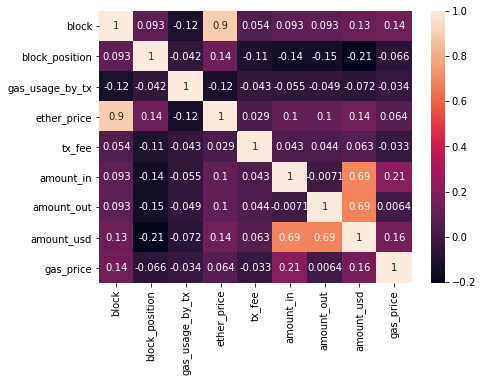

In [9]:
plt.figure(figsize=(7, 5))
sns.heatmap(classic_possible_mevs_df.corr(), annot=True)
plt.show()

In [10]:
classic_possible_mevs_df.sort_values(by=['timestamp', 'block_position'], inplace=True)

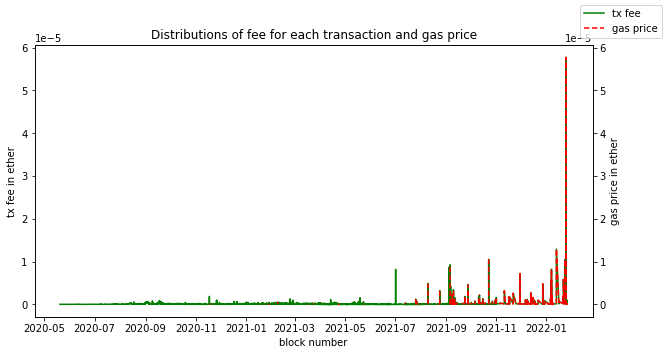

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(classic_possible_mevs_df[classic_possible_mevs_df['tx_fee'] < 1]['timestamp'], classic_possible_mevs_df[classic_possible_mevs_df['tx_fee'] < 1]['tx_fee'], color='g', label='tx fee')
ax2.plot(classic_possible_mevs_df['timestamp'], classic_possible_mevs_df['gas_price'], color='r', linestyle='--', label='gas price')
ax.set_xlabel('block number')
ax.set_ylabel('tx fee in ether')
ax2.set_ylabel('gas price in ether')
ax.set_title('Distributions of fee for each transaction and gas price')
fig.legend()
plt.show()

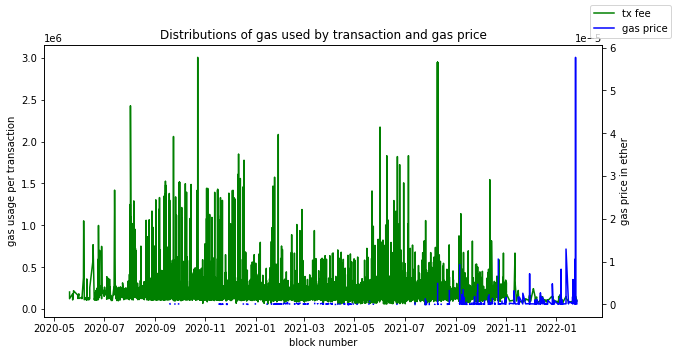

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(classic_possible_mevs_df[classic_possible_mevs_df['tx_fee'] < 1]['timestamp'], classic_possible_mevs_df[classic_possible_mevs_df['tx_fee'] < 1]['gas_usage_by_tx'], color='g', label='tx fee')
ax2.plot(classic_possible_mevs_df[classic_possible_mevs_df['tx_fee'] < 1]['timestamp'], classic_possible_mevs_df[classic_possible_mevs_df['tx_fee'] < 1]['gas_price'], color='b', label='gas price')
ax.set_xlabel('block number')
ax.set_ylabel('gas usage per transaction')
ax2.set_ylabel('gas price in ether')
ax.set_title('Distributions of gas used by transaction and gas price')
fig.legend()
plt.show()

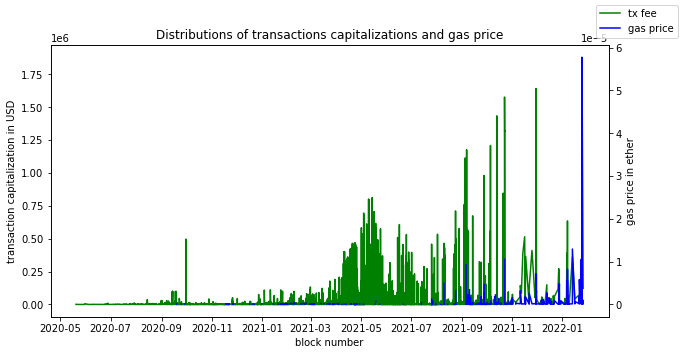

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(classic_possible_mevs_df[classic_possible_mevs_df['tx_fee'] < 1]['timestamp'], classic_possible_mevs_df[classic_possible_mevs_df['tx_fee'] < 1]['amount_usd'], color='g', label='tx fee')
ax2.plot(classic_possible_mevs_df[classic_possible_mevs_df['tx_fee'] < 1]['timestamp'], classic_possible_mevs_df[classic_possible_mevs_df['tx_fee'] < 1]['gas_price'], color='b', label='gas price')
ax.set_xlabel('block number')
ax.set_ylabel('transaction capitalization in USD')
ax2.set_ylabel('gas price in ether')
ax.set_title('Distributions of transactions capitalizations and gas price')
fig.legend()
plt.show()

# Connecting received possible MEV reports with data from original simulations

## General steps

Received MEV reports are connected with suspicious transactions out of the simulations with their profits estimations. First it is required to get price information about Ether due to its presence in all of the cases for either gas price or in pool itself. In case of classic tokens it is also required to take price of weighted Bitcoin, considering that there are some pools with him present

In [14]:
wbtc_price_df = wbtc_usdc_sim.get_daily_token_price(False, "WBTC")
weth_price_df = weth_usdc_sim.get_daily_token_price(True, 'WETH')

Collected MEV information contains some fields that do not give any useful information and can be removed

In [15]:
classic_possible_mevs_df = classic_possible_mevs_df[['txd', 'block', 'block_position', 'gas_usage_by_tx', 'ether_price', 'tx_fee']]

## WBTC/USDC

Considering that currently cases of possible MEVs are reviewed it is required to get them back from the original distribution and calculate profits in tokens

In [16]:
wbtc_usdc_filtered_swaps_df, wbtc_usdc_mevs_df = wbtc_usdc_sim.extract_filtered_and_mevs_dfs()

initial len = 69834, filtered len = 69652
txds = 182
out values = 91


In [17]:
wbtc_usdc_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used
4088,USDC,WBTC,3694.507910,0.209063,3684.217300,2020-11-18 02:55:12,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x8668f06dde23a8ccc0f2c2a594c3882e51bad15a1b7f...,122000000001,118777
4089,WBTC,USDC,0.207678,3694.507910,3692.331147,2020-11-18 02:55:12,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0xbffa11c58ec26affd6c477388d70114b287c5dc13381...,115500000001,125946
30365,WBTC,USDC,0.814765,30511.102171,30517.868246,2021-02-05 00:08:00,0x60f09b45dd707d0dda43f099bd87c0f49d483979,0x60f09b45dd707d0dda43f099bd87c0f49d483979,0x668f2a34df8542f7555ace6b11097659ca0f51449766...,243100000000,350000
30366,USDC,WBTC,30305.000000,0.814765,30311.720370,2021-02-05 00:08:00,0x60f09b45dd707d0dda43f099bd87c0f49d483979,0x60f09b45dd707d0dda43f099bd87c0f49d483979,0x9e7704076894c0322297eab36eb06dda5e3cc5302549...,301463842552,230000
31182,WBTC,USDC,0.288400,11703.050959,11693.344352,2021-02-06 16:53:21,0x102249e2954f88acc4e4b24395be71eafdb4c2a9,0x102249e2954f88acc4e4b24395be71eafdb4c2a9,0x68bd6b0b089f9be253a7b47a8bf79889a6b27f68f11b...,140400000001,290000
...,...,...,...,...,...,...,...,...,...,...,...
69516,WBTC,USDC,2.217007,66597.165318,66618.778349,2022-01-07 07:12:04,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x9bafde259884a8e6081a596162ac0df2ffe76a106d8f...,97745263744,264733
69538,USDC,WBTC,3542.772183,0.087565,3544.342088,2022-01-08 16:48:06,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x156466a69601ac3f7a111b4870359faaa72aed70dd15...,272463299446,198610
69539,WBTC,USDC,0.087565,3679.387499,3681.017943,2022-01-08 16:48:06,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0xa86ae972dffe4cbaed34680865621458d291ebe74c4a...,96958937586,209045
69702,USDC,WBTC,37711.479807,1.286411,37647.553852,2022-01-22 07:36:40,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x94fff3ef66ab898bb1afbb9128da1ce611cc45a592ab...,844654862110,164705


In [18]:
wbtc_usdc_suspicious_filtered_swaps_df, wbtc_usdc_possible_mevs_df = wbtc_usdc_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 69834, filtered len = 69430
txds = 404
out values = 202.0


In [19]:
wbtc_usdc_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used
4088,USDC,WBTC,3694.507910,0.209063,3684.217300,2020-11-18 02:55:12,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x8668f06dde23a8ccc0f2c2a594c3882e51bad15a1b7f...,122000000001,118777
4089,WBTC,USDC,0.207678,3694.507910,3692.331147,2020-11-18 02:55:12,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0xbffa11c58ec26affd6c477388d70114b287c5dc13381...,115500000001,125946
4152,USDC,WBTC,1471.977954,0.081447,1471.224901,2020-11-18 04:01:15,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x071341196d71b14f04b84463f9b9b56f3b5ed333,0x3ca91e8477aaf3d8137388b5ae6808e3a258dac8c25d...,70000000000,156710
4153,WBTC,USDC,0.100000,1796.395236,1795.463605,2020-11-18 04:01:15,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xa0493a8fdb5b0a4a844e3bb2279fffa0dfb565d5,0x7a23d0f652543428dbc52a1c57ae46061ad99b171ed7...,63800000000,125332
4689,USDC,WBTC,3598.341161,0.205909,3591.631733,2020-11-19 10:46:31,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x00000058baccda12cf345edc9d99613cf1312b91,0xa35996506bc46efa6d87cca53bc29cc13dfeb45820ef...,78000000000,182577
...,...,...,...,...,...,...,...,...,...,...,...
69703,WBTC,USDC,1.276562,37711.479807,37647.553852,2022-01-22 07:36:40,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xa140f3f688511238df8a9e564a97e480e0cec7868bfe...,306430468195,2000000
69756,WBTC,USDC,0.658752,26455.763997,26480.621301,2022-01-23 23:18:35,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x28c5eef58fb7bb1ffb9586212d7a4398532a62506583...,400611548287,198653
69758,USDC,WBTC,26296.871441,0.658752,26321.579453,2022-01-23 23:18:35,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0xffc9e53288c783c7b9b669739ca1a50a866388988811...,200642593308,209050
69791,USDC,WBTC,12616.751851,0.355336,12625.254040,2022-01-24 15:31:47,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x5e0e415cfe39f1eea61eee7deb13493e2df0d88e6d4a...,122054291714,203688


In [20]:
wbtc_usdc_possible_mevs_df = wbtc_usdc_sim.calculate_attack_profit(wbtc_usdc_possible_mevs_df)
wbtc_usdc_possible_mevs_df = wbtc_usdc_sim.calculate_attack_profit_by_token(wbtc_usdc_possible_mevs_df)

After collecting all the data is performed series of steps to calculate profits:
* Transformation of the ```date``` (or ```timestamp```) column into datetime format;
* Connecting WETH (all of the cases) and WBTC (current case) tokens price distributions to the possible MEVs data;
* Transform profits of the first token into stablecoin (price relative close to USD) or into Ether;
* Connect profit from first token with profit from the second token. If first and second are transformed into stablecoin - this means relatively close estimation to the USD. Otherwise, result must be multiplied by Ether current day price;
* Perform transformation of outliers in ```tx_fee``` column (possible error during extraction process);
* Find gas costs for the attacker in USD via multiplication of the transaction fee with Ether price and amount of used by transaction gas;
* Calculate netto profit via negation of found gas costs in USD from bruto total profit

In [21]:
wbtc_usdc_possible_mevs_df['date'] = wbtc_usdc_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
wbtc_price_df['date'] = wbtc_price_df['date'].dt.strftime("%Y-%m-%d")
weth_price_df['date'] = weth_price_df['date'].dt.strftime("%Y-%m-%d")

In [22]:
wbtc_usdc_possible_mevs_df = pd.merge(wbtc_usdc_possible_mevs_df, wbtc_price_df, on='date', how='left')
wbtc_usdc_possible_mevs_df = pd.merge(wbtc_usdc_possible_mevs_df, weth_price_df, on='date', how='left')
wbtc_usdc_possible_mevs_df = pd.merge(wbtc_usdc_possible_mevs_df, classic_possible_mevs_df, on='txd', how='left')

In [23]:
wbtc_usdc_possible_mevs_df['bruto_wbtc_to_usdc_profit'] = wbtc_usdc_possible_mevs_df['WBTC_profit'] * wbtc_usdc_possible_mevs_df['WBTC_price']
wbtc_usdc_possible_mevs_df['bruto_total_profit'] = wbtc_usdc_possible_mevs_df['bruto_wbtc_to_usdc_profit'] + wbtc_usdc_possible_mevs_df['USDC_profit']
wbtc_usdc_possible_mevs_df.loc[wbtc_usdc_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = wbtc_usdc_possible_mevs_df['tx_fee'].median()
wbtc_usdc_possible_mevs_df.loc[wbtc_usdc_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = wbtc_usdc_possible_mevs_df['tx_fee'].median()
wbtc_usdc_possible_mevs_df['gas_costs_usd'] = (wbtc_usdc_possible_mevs_df['tx_fee'] * wbtc_usdc_possible_mevs_df['WETH_price'] *
                                      wbtc_usdc_possible_mevs_df['gas_usage_by_tx'])
wbtc_usdc_possible_mevs_df['netto_profit'] = wbtc_usdc_possible_mevs_df['bruto_total_profit'] - wbtc_usdc_possible_mevs_df['gas_costs_usd']
wbtc_usdc_possible_mevs_df.dropna(inplace=True)

It is possible that dataset will contain data duplicates and to ensure correct work it is required to perform duplicate removal. This can be done via removal of records with the same values for ```timestamp``` in combination with the same ```txd```, ```block```, ```amount_in``` and ```block_position```. Removal of those elements ensures correct work of algorithm

Out of 541 records remained 504 records, requiring additional checks of profits to ensure correct result of work for the program

In [24]:
print(len(wbtc_usdc_possible_mevs_df))
wbtc_usdc_possible_mevs_df

408


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_wbtc_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,USDC,WBTC,3694.507910,0.209063,3684.217300,2020-11-18 02:55:12,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x8668f06dde23a8ccc0f2c2a594c3882e51bad15a1b7f...,122000000001,...,480.797681,11279366.0,54.0,107326.0,478.76,1.220000e-07,24.758508,24.758508,6.295455,18.463053
1,WBTC,USDC,0.207678,3694.507910,3692.331147,2020-11-18 02:55:12,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0xbffa11c58ec26affd6c477388d70114b287c5dc13381...,115500000001,...,480.797681,11279366.0,62.0,101057.0,478.76,1.155000e-07,24.758508,24.758508,5.611911,19.146597
2,USDC,WBTC,1471.977954,0.081447,1471.224901,2020-11-18 04:01:15,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x071341196d71b14f04b84463f9b9b56f3b5ed333,0x3ca91e8477aaf3d8137388b5ae6808e3a258dac8c25d...,70000000000,...,480.797681,11279654.0,110.0,121015.0,478.76,7.000000e-08,331.681982,656.099264,4.072861,652.026403
3,WBTC,USDC,0.100000,1796.395236,1795.463605,2020-11-18 04:01:15,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xa0493a8fdb5b0a4a844e3bb2279fffa0dfb565d5,0x7a23d0f652543428dbc52a1c57ae46061ad99b171ed7...,63800000000,...,480.797681,11279654.0,128.0,107855.0,478.76,6.380000e-08,331.681982,656.099264,3.308440,652.790823
4,USDC,WBTC,3598.341161,0.205909,3591.631733,2020-11-19 10:46:31,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x00000058baccda12cf345edc9d99613cf1312b91,0xa35996506bc46efa6d87cca53bc29cc13dfeb45820ef...,78000000000,...,470.613346,11287956.0,15.0,120999.0,471.82,7.800000e-08,105.061279,229.209950,4.441612,224.768338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,WBTC,USDC,1.276562,37711.479807,37647.553852,2022-01-22 07:36:40,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xa140f3f688511238df8a9e564a97e480e0cec7868bfe...,306430468195,...,2405.015219,14054109.0,1.0,104051.0,2412.23,3.064305e-07,345.926450,345.926450,76.682459,269.243991
420,WBTC,USDC,0.658752,26455.763997,26480.621301,2022-01-23 23:18:35,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x28c5eef58fb7bb1ffb9586212d7a4398532a62506583...,400611548287,...,2534.454632,14064819.0,10.0,95853.0,2541.60,4.006115e-07,0.000360,158.892916,97.322598,61.570318
421,USDC,WBTC,26296.871441,0.658752,26321.579453,2022-01-23 23:18:35,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0xffc9e53288c783c7b9b669739ca1a50a866388988811...,200642593308,...,2534.454632,14064819.0,8.0,106250.0,2541.60,2.006426e-07,0.000360,158.892916,54.030202,104.862714
422,USDC,WBTC,12616.751851,0.355336,12625.254040,2022-01-24 15:31:47,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x5e0e415cfe39f1eea61eee7deb13493e2df0d88e6d4a...,122054291714,...,2440.018156,14069140.0,13.0,103688.0,2442.27,1.220543e-07,0.000367,110.731970,30.879809,79.852161


In [25]:
wbtc_usdc_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [26]:
print(len(wbtc_usdc_possible_mevs_df))
wbtc_usdc_possible_mevs_df

388


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_wbtc_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,USDC,WBTC,3694.507910,0.209063,3684.217300,2020-11-18 02:55:12,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x8668f06dde23a8ccc0f2c2a594c3882e51bad15a1b7f...,122000000001,...,480.797681,11279366.0,54.0,107326.0,478.76,1.220000e-07,24.758508,24.758508,6.295455,18.463053
1,WBTC,USDC,0.207678,3694.507910,3692.331147,2020-11-18 02:55:12,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0xbffa11c58ec26affd6c477388d70114b287c5dc13381...,115500000001,...,480.797681,11279366.0,62.0,101057.0,478.76,1.155000e-07,24.758508,24.758508,5.611911,19.146597
2,USDC,WBTC,1471.977954,0.081447,1471.224901,2020-11-18 04:01:15,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x071341196d71b14f04b84463f9b9b56f3b5ed333,0x3ca91e8477aaf3d8137388b5ae6808e3a258dac8c25d...,70000000000,...,480.797681,11279654.0,110.0,121015.0,478.76,7.000000e-08,331.681982,656.099264,4.072861,652.026403
3,WBTC,USDC,0.100000,1796.395236,1795.463605,2020-11-18 04:01:15,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xa0493a8fdb5b0a4a844e3bb2279fffa0dfb565d5,0x7a23d0f652543428dbc52a1c57ae46061ad99b171ed7...,63800000000,...,480.797681,11279654.0,128.0,107855.0,478.76,6.380000e-08,331.681982,656.099264,3.308440,652.790823
4,USDC,WBTC,3598.341161,0.205909,3591.631733,2020-11-19 10:46:31,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x00000058baccda12cf345edc9d99613cf1312b91,0xa35996506bc46efa6d87cca53bc29cc13dfeb45820ef...,78000000000,...,470.613346,11287956.0,15.0,120999.0,471.82,7.800000e-08,105.061279,229.209950,4.441612,224.768338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,WBTC,USDC,1.276562,37711.479807,37647.553852,2022-01-22 07:36:40,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xa140f3f688511238df8a9e564a97e480e0cec7868bfe...,306430468195,...,2405.015219,14054109.0,1.0,104051.0,2412.23,3.064305e-07,345.926450,345.926450,76.682459,269.243991
420,WBTC,USDC,0.658752,26455.763997,26480.621301,2022-01-23 23:18:35,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x28c5eef58fb7bb1ffb9586212d7a4398532a62506583...,400611548287,...,2534.454632,14064819.0,10.0,95853.0,2541.60,4.006115e-07,0.000360,158.892916,97.322598,61.570318
421,USDC,WBTC,26296.871441,0.658752,26321.579453,2022-01-23 23:18:35,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0x46c4128981525aa446e02ffb2ff762f1d6a49170,0xffc9e53288c783c7b9b669739ca1a50a866388988811...,200642593308,...,2534.454632,14064819.0,8.0,106250.0,2541.60,2.006426e-07,0.000360,158.892916,54.030202,104.862714
422,USDC,WBTC,12616.751851,0.355336,12625.254040,2022-01-24 15:31:47,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x5e0e415cfe39f1eea61eee7deb13493e2df0d88e6d4a...,122054291714,...,2440.018156,14069140.0,13.0,103688.0,2442.27,1.220543e-07,0.000367,110.731970,30.879809,79.852161


In [27]:
wbtc_usdc_count_df = wbtc_usdc_possible_mevs_df.value_counts(subset=['timestamp'])
wbtc_usdc_count_df[wbtc_usdc_count_df.values > 2]

timestamp          
2021-02-17 09:41:36    4
2021-04-04 02:21:56    4
2021-02-17 09:40:22    4
2021-03-13 18:13:39    4
dtype: int64

In [28]:
wbtc_usdc_possible_mevs_df[wbtc_usdc_possible_mevs_df['timestamp'] == datetime.fromisoformat("2021-02-17 09:40:22")][["timestamp", "token_in", "amount_in", "token_out", "amount_out", "WBTC_profit", "USDC_profit", "bruto_total_profit", "netto_profit"]]

,timestamp,token_in,amount_in,token_out,amount_out,WBTC_profit,USDC_profit,bruto_total_profit,netto_profit
58,2021-02-17 09:40:22,USDC,3118.829030,WBTC,0.060407,0.000373,0.000000,19.454044,-3.207614
60,2021-02-17 09:40:22,WBTC,0.060780,USDC,3118.829030,0.000373,0.000000,19.454044,-5.119717
62,2021-02-17 09:40:22,WBTC,0.194122,USDC,9938.755201,0.000000,61.244799,61.244799,40.401519
64,2021-02-17 09:40:22,USDC,10000.000000,WBTC,0.194122,0.000000,61.244799,61.244799,30.907413


Analysis of the data can be performed via plotting two lines: red one representing bruto USD profit, which is based on amount of extracted tokens and no consideration of gas usage by transaction; blue one representing netto USD profit, which is based on amount of extracted tokens with consideration of payment for gas used by transaction.

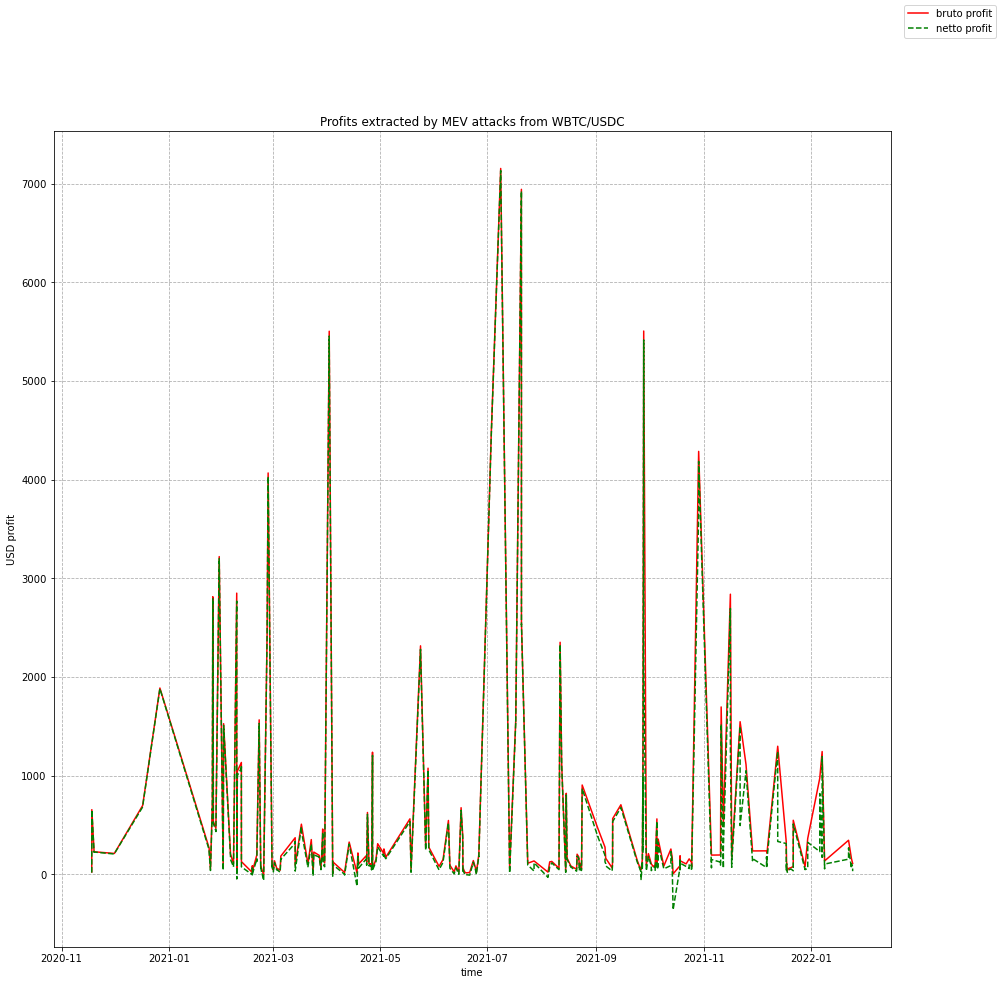

In [29]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(wbtc_usdc_possible_mevs_df.timestamp, wbtc_usdc_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(wbtc_usdc_possible_mevs_df.timestamp, wbtc_usdc_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from WBTC/USDC')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [30]:
print("max bruto profit in USD = " +
      str(wbtc_usdc_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 7153.688134529131


In [31]:
print("min bruto profit in USD = " +
      str(wbtc_usdc_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 0.3840810000001511


In [32]:
print("max netto profit in USD = " +
      str(wbtc_usdc_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 7132.161202665734


In [33]:
print("min netto profit in USD = " +
      str(wbtc_usdc_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -358.0265255417681


In [34]:
print("amount of zero bruto profit possible attacks = " +
      str(len(wbtc_usdc_possible_mevs_df[wbtc_usdc_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [35]:
print("amount of losses attacks = " +
      str(len(wbtc_usdc_possible_mevs_df[wbtc_usdc_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 24


In [36]:
wbtc_usdc_possible_mevs_df[wbtc_usdc_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_wbtc_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
46,WBTC,USDC,0.171050,7631.821025,7647.147659,2021-02-08 13:34:23,0xde2f28a62ffd5d4dfda6be5855e8aa92ec370764,0xde2f28a62ffd5d4dfda6be5855e8aa92ec370764,0xf8ddf7166cec91677a050150f9b4edf3d9fb8e6c8424...,471000000000,...,1746.628700,11816083.0,44.0,100725.0,1752.87,4.710000e-07,0.000000,41.995809,82.862642,-40.866833
47,USDC,WBTC,7589.825216,0.171050,7605.067511,2021-02-08 13:34:23,0xde2f28a62ffd5d4dfda6be5855e8aa92ec370764,0xde2f28a62ffd5d4dfda6be5855e8aa92ec370764,0xff86b2a71b4a5befe7815b23f0c0299f5ded88b12c01...,471000000001,...,1746.628700,11816083.0,40.0,107532.0,1752.87,4.710000e-07,0.000000,41.995809,88.462503,-46.466694
58,USDC,WBTC,3118.829030,0.060407,3119.316032,2021-02-17 09:40:22,0x00000000000064c443ef440577c26525a3c34a30,0x00000000000064c443ef440577c26525a3c34a30,0x05dc9c68375082c66ea9cf920641c491bb17210b401e...,126210200001,...,1844.672543,11873584.0,23.0,97337.0,1851.14,1.262102e-07,19.454044,19.454044,22.661659,-3.207614
60,WBTC,USDC,0.060780,3118.829030,3118.363266,2021-02-17 09:40:22,0x00000000000064c443ef440577c26525a3c34a30,0x00000000000064c443ef440577c26525a3c34a30,0x95116ddc1e5d36b603d6ff4c7482c9ce3c1ba608784e...,126000000000,...,1844.672543,11873584.0,35.0,105726.0,1851.14,1.260000e-07,19.454044,19.454044,24.573761,-5.119717
82,USDC,WBTC,10000.000000,0.216152,9981.829426,2021-02-23 20:13:26,0xe8024625ac740573a379b290175c33eb72a7c6e5,0x722a8de5fcbe9838d9f2cc52b4610a8edcbd36ba,0x962e280e06dbda1f2a97fb03049ef63cb9c6f8c44203...,287629109507,...,1572.732378,11915472.0,11.0,137956.0,1578.19,2.876291e-07,0.000000,0.384081,62.406275,-62.022194
83,WBTC,USDC,0.216152,10000.384081,10003.057248,2021-02-23 20:13:26,0xe8024625ac740573a379b290175c33eb72a7c6e5,0x722a8de5fcbe9838d9f2cc52b4610a8edcbd36ba,0xbd38a5fcb119cc57a9d318d2972008159ebf9cd85025...,267000000000,...,1572.732378,11915472.0,96.0,96687.0,1578.19,2.670000e-07,0.000000,0.384081,40.600761,-40.216680
118,WBTC,USDC,0.219233,11992.486975,11974.160910,2021-03-23 22:29:19,0x54cd18c5f9d68bee591541700a2042c6fc18e8f5,0x54cd18c5f9d68bee591541700a2042c6fc18e8f5,0x2e1831aeae13445d7959deb617b56692bd03aca54ff1...,168000000000,...,1665.879480,12097820.0,83.0,85096.0,1668.69,1.680000e-07,0.000000,20.828506,23.815626,-2.987120
119,USDC,WBTC,11971.658469,0.219233,11953.364232,2021-03-23 22:29:19,0x54cd18c5f9d68bee591541700a2042c6fc18e8f5,0x54cd18c5f9d68bee591541700a2042c6fc18e8f5,0xdfce9b423f24ff17ded732f6a28c22ca58e43e634c3a...,168000000001,...,1665.879480,12097820.0,72.0,130447.0,1668.69,1.680000e-07,0.000000,20.828506,36.507909,-15.679403
138,USDC,WBTC,623.083247,0.010849,623.352752,2021-04-04 02:21:56,0x54cd18c5f9d68bee591541700a2042c6fc18e8f5,0x54cd18c5f9d68bee591541700a2042c6fc18e8f5,0x33b1907c8010b0d57c50c0a14ae95c09c513805cc41b...,101200000001,...,2062.846796,12170399.0,124.0,118431.0,2076.62,1.012000e-07,0.000000,6.746071,24.723667,-17.977596
140,WBTC,USDC,0.010849,629.829318,630.101741,2021-04-04 02:21:56,0x54cd18c5f9d68bee591541700a2042c6fc18e8f5,0x54cd18c5f9d68bee591541700a2042c6fc18e8f5,0x541aec94e635e59fbde24c66a3b3f36eb4b179e33231...,101200000000,...,2062.846796,12170399.0,203.0,85096.0,2076.62,1.012000e-07,0.000000,6.746071,17.764649,-11.018578


In [37]:
wbtc_usdc_possible_mevs_df[wbtc_usdc_possible_mevs_df['timestamp'] == datetime.fromisoformat("2021-02-17 09:41:36")]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_wbtc_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
66,USDC,WBTC,3118.393506,0.060407,3117.234533,2021-02-17 09:41:36,0x00000000000064c443ef440577c26525a3c34a30,0x00000000000064c443ef440577c26525a3c34a30,0x7d2c2fe3e17ae75a4c876b04c53e05b76c56fd137d93...,130718281829,...,1844.672543,11873591.0,149.0,97347.0,1851.14,1.307183e-07,27.399776,27.399776,23.473518,3.926258
68,WBTC,USDC,0.194148,10087.641426,10083.768205,2021-02-17 09:41:36,0xc723162117de54569861df0066761f9854dc18c5,0xc723162117de54569861df0066761f9854dc18c5,0xb28a5acc0aaf52bfaf703660747c73120221820375f8...,127000000000,...,1844.672543,11873591.0,181.0,89676.0,1851.14,1.270000e-07,0.000000,87.641426,21.008703,66.632723
70,USDC,WBTC,10000.000000,0.194148,9996.283430,2021-02-17 09:41:36,0xc723162117de54569861df0066761f9854dc18c5,0xc723162117de54569861df0066761f9854dc18c5,0xb8b877f6f682d25cad587b9020b81c764cc260d02014...,130718284315,...,1844.672543,11873591.0,148.0,130318.0,1851.14,1.307183e-07,0.000000,87.641426,31.423896,56.217530
72,WBTC,USDC,0.059882,3118.393506,3117.196177,2021-02-17 09:41:36,0x00000000000064c443ef440577c26525a3c34a30,0x00000000000064c443ef440577c26525a3c34a30,0xf3bb65218973e4d508d01c8070bc31621ba619dd676b...,127000000000,...,1844.672543,11873591.0,179.0,105736.0,1851.14,1.270000e-07,27.399776,27.399776,24.771134,2.628642


## WETH/USDC

Considering that current pool does not contain Bitcoin related information (most of the cases do not) here will be performed transformation using only Ether price distribution and Ether values.

In [252]:
weth_usdc_suspicious_filtered_swaps_df, weth_usdc_possible_mevs_df = weth_usdc_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 2895926, filtered len = 2868679
txds = 27244
out values = 13622.0


In [253]:
weth_usdc_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd
1480,USDC,WETH,94.798666,0.455932,94.366560,2020-05-23 15:16:23,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x121b382b5f003c41fb49e7b88d079c8f513feaac,0x948bc08eeebb3abf97ca8753aa982f21ebc667f3ef61...
1481,WETH,USDC,0.500000,103.336814,103.189860,2020-05-23 15:16:23,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa64c7925e25c728d8105896c74d823b8bbb0f127,0xf56ba76b68f6471bbf618ad5bf4393a3db097f27f6f0...
3735,WETH,USDC,21.401958,5000.000000,5073.446905,2020-05-31 04:27:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x3def62395e446e7d96500ee09369184e020b13b4,0x0b1b520eb71e00c9513998723209aaa17a0a682e9be0...
3736,USDC,WETH,4821.780514,20.522731,4856.052565,2020-05-31 04:27:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x6a72aa8d845a241e612b6a99584c69512626d8fbe31f...
4240,WETH,USDC,4.496632,1076.805154,1076.200581,2020-06-01 15:03:18,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x7b1886e49ab5433bb46f7258548092dc8cdca28b,0x8150e17f730635ba500d70e129947a01e0094729f78f...
...,...,...,...,...,...,...,...,...,...
2894814,USDC,WETH,35660.639915,8.299282,35609.563359,2021-11-01 17:15:53,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x97e1fcb93ae7267dbafad23f7b9afaa08264cfd8,0xf76cab9524923fbf5e14b4158de4e68a355098d52201...
2894939,USDC,WETH,3500.000000,0.814388,3494.300116,2021-11-01 18:07:44,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x865e7f86e589b172e3305cf13361ca6c5d9b15d8,0x0e4602d2238d2622d9ea2cc58bc98cb4c571d559ecec...
2894940,WETH,USDC,0.703646,3005.959186,3010.773282,2021-11-01 18:07:44,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xca55a6e30802254669aee02e5becf8af026b0792,0x783c47a4357dc89e0270e4bbf33bce4c65f6bcc023cd...
2895461,WETH,USDC,1.162266,5000.000000,5007.732875,2021-11-01 22:34:26,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x44c0689241c96315860a29d49f307b21e5342acb,0x35ff24c113b48d129ac07ad9610f7b8b85a30b4a2d16...


In [39]:
weth_usdc_possible_mevs_df = weth_usdc_sim.calculate_attack_profit(weth_usdc_possible_mevs_df)
weth_usdc_possible_mevs_df = weth_usdc_sim.calculate_attack_profit_by_token(weth_usdc_possible_mevs_df)

In [40]:
weth_usdc_possible_mevs_df['date'] = weth_usdc_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")

In [41]:
weth_usdc_possible_mevs_df = pd.merge(weth_usdc_possible_mevs_df, weth_price_df, on='date', how='left')
weth_usdc_possible_mevs_df = pd.merge(weth_usdc_possible_mevs_df, classic_possible_mevs_df, on='txd', how='left')

In [42]:
weth_usdc_possible_mevs_df['bruto_weth_to_usdc_profit'] = weth_usdc_possible_mevs_df['WETH_profit'] * weth_usdc_possible_mevs_df['WETH_price']
weth_usdc_possible_mevs_df['bruto_total_profit'] = weth_usdc_possible_mevs_df['bruto_weth_to_usdc_profit'] + weth_usdc_possible_mevs_df['USDC_profit']
weth_usdc_possible_mevs_df.loc[weth_usdc_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = weth_usdc_possible_mevs_df['tx_fee'].median()
weth_usdc_possible_mevs_df.loc[weth_usdc_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = weth_usdc_possible_mevs_df['tx_fee'].median()
weth_usdc_possible_mevs_df['gas_costs_usd'] = (weth_usdc_possible_mevs_df['tx_fee'] * weth_usdc_possible_mevs_df['WETH_price'] *
                                      weth_usdc_possible_mevs_df['gas_usage_by_tx'])
weth_usdc_possible_mevs_df['netto_profit'] = weth_usdc_possible_mevs_df['bruto_total_profit'] - weth_usdc_possible_mevs_df['gas_costs_usd']
weth_usdc_possible_mevs_df.dropna(inplace=True)

In [43]:
weth_usdc_count_df = weth_usdc_possible_mevs_df.value_counts(subset=['timestamp'])
weth_usdc_count_df[weth_usdc_count_df.values > 2]

timestamp          
2021-05-19 02:08:28    10
2021-02-05 13:20:45     4
2020-11-15 23:24:28     4
2020-11-17 01:25:29     4
2021-06-22 14:25:29     4
                       ..
2021-07-04 12:06:39     3
2020-11-26 00:45:38     3
2021-05-07 20:08:02     3
2020-11-16 23:31:12     3
2020-12-30 16:22:37     3
Length: 168, dtype: int64

In [44]:
print(len(weth_usdc_possible_mevs_df))
weth_usdc_possible_mevs_df

13635


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_weth_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,USDC,WETH,94.798666,0.455932,94.366560,2020-05-23 15:16:23,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x121b382b5f003c41fb49e7b88d079c8f513feaac,0x948bc08eeebb3abf97ca8753aa982f21ebc667f3ef61...,8.823300,...,207.751110,10122876.0,67.0,180658.0,206.70,2.500000e-08,9.155272,17.693420,0.938297,16.755123
1,WETH,USDC,0.500000,103.336814,103.189860,2020-05-23 15:16:23,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa64c7925e25c728d8105896c74d823b8bbb0f127,0xf56ba76b68f6471bbf618ad5bf4393a3db097f27f6f0...,8.823300,...,207.751110,10122876.0,140.0,107226.0,206.70,1.500000e-08,9.155272,17.693420,0.334145,17.359275
2,WETH,USDC,21.401958,5000.000000,5073.446905,2020-05-31 04:27:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x3def62395e446e7d96500ee09369184e020b13b4,0x0b1b520eb71e00c9513998723209aaa17a0a682e9be0...,217.394340,...,231.629110,10171401.0,104.0,180743.0,231.73,2.900000e-08,203.654737,381.874223,1.214095,380.660128
3,USDC,WETH,4821.780514,20.522731,4856.052565,2020-05-31 04:27:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x6a72aa8d845a241e612b6a99584c69512626d8fbe31f...,217.394340,...,231.629110,10171401.0,105.0,125063.0,231.73,2.900000e-08,203.654737,381.874223,0.840079,381.034145
6,WETH,USDC,0.500000,120.906339,120.356058,2020-06-05 17:59:58,0xc3037b2a1a9e9268025ff6d45fe7095436446d52,0xc3037b2a1a9e9268025ff6d45fe7095436446d52,0x59f2f54593a333bf1e684a38aa0fdbc7d825c2a3806a...,0.373206,...,241.475054,10207198.0,100.0,372788.0,240.08,3.190000e-08,0.723212,0.723212,2.871606,-2.148394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27552,USDC,WETH,1044.450849,0.239097,1042.718924,2021-11-01 13:48:47,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x60bb204e54baed029e84750d60b91c0c8839bb47,0xe5adfa07ff78d356ffa203fd24c89be57e1cf515c882...,137.015055,...,4317.786653,13531524.0,503.0,236835.0,4322.79,2.462769e-07,132.957003,272.922539,251.843502,21.079037
27559,USDC,WETH,2800.000000,0.642709,2793.904932,2021-11-01 15:36:32,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x979a6e410760b83bdc6dcddd0e904998ea575197,0x7bee0770c019932b66924f071e36865b26c36ed2d08d...,144.177494,...,4317.786653,13531999.0,243.0,316125.0,4322.79,2.150351e-07,135.293945,287.755882,293.514357,-5.758475
27560,WETH,USDC,0.611375,2647.538063,2649.727438,2021-11-01 15:36:32,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x041257fd8fe397ac5d6a9e63fe835a3f8cafecd9,0xf2a279bd7ade05000998c62fa3f223f8b337725e2f51...,144.177494,...,4317.786653,13531999.0,277.0,180710.0,4322.79,2.150351e-07,135.293945,287.755882,167.784830,119.971051
27561,WETH,USDC,8.210811,35069.324031,35125.308050,2021-11-01 17:15:53,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x9ed5da724b2bcb1d29b1eb8f96547e03ae64e747,0x416bb6ac4faf333d8a558f7e58fccb3beea743b5c18e...,484.255309,...,4317.786653,13532431.0,277.0,177331.0,4322.79,2.112000e-07,382.001144,973.317028,161.711072,811.605955


In [45]:
weth_usdc_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [46]:
print(len(weth_usdc_possible_mevs_df))
weth_usdc_possible_mevs_df

13325


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_weth_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,USDC,WETH,94.798666,0.455932,94.366560,2020-05-23 15:16:23,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x121b382b5f003c41fb49e7b88d079c8f513feaac,0x948bc08eeebb3abf97ca8753aa982f21ebc667f3ef61...,8.823300,...,207.751110,10122876.0,67.0,180658.0,206.70,2.500000e-08,9.155272,17.693420,0.938297,16.755123
1,WETH,USDC,0.500000,103.336814,103.189860,2020-05-23 15:16:23,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa64c7925e25c728d8105896c74d823b8bbb0f127,0xf56ba76b68f6471bbf618ad5bf4393a3db097f27f6f0...,8.823300,...,207.751110,10122876.0,140.0,107226.0,206.70,1.500000e-08,9.155272,17.693420,0.334145,17.359275
2,WETH,USDC,21.401958,5000.000000,5073.446905,2020-05-31 04:27:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x3def62395e446e7d96500ee09369184e020b13b4,0x0b1b520eb71e00c9513998723209aaa17a0a682e9be0...,217.394340,...,231.629110,10171401.0,104.0,180743.0,231.73,2.900000e-08,203.654737,381.874223,1.214095,380.660128
3,USDC,WETH,4821.780514,20.522731,4856.052565,2020-05-31 04:27:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x6a72aa8d845a241e612b6a99584c69512626d8fbe31f...,217.394340,...,231.629110,10171401.0,105.0,125063.0,231.73,2.900000e-08,203.654737,381.874223,0.840079,381.034145
6,WETH,USDC,0.500000,120.906339,120.356058,2020-06-05 17:59:58,0xc3037b2a1a9e9268025ff6d45fe7095436446d52,0xc3037b2a1a9e9268025ff6d45fe7095436446d52,0x59f2f54593a333bf1e684a38aa0fdbc7d825c2a3806a...,0.373206,...,241.475054,10207198.0,100.0,372788.0,240.08,3.190000e-08,0.723212,0.723212,2.871606,-2.148394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27552,USDC,WETH,1044.450849,0.239097,1042.718924,2021-11-01 13:48:47,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x60bb204e54baed029e84750d60b91c0c8839bb47,0xe5adfa07ff78d356ffa203fd24c89be57e1cf515c882...,137.015055,...,4317.786653,13531524.0,503.0,236835.0,4322.79,2.462769e-07,132.957003,272.922539,251.843502,21.079037
27559,USDC,WETH,2800.000000,0.642709,2793.904932,2021-11-01 15:36:32,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x979a6e410760b83bdc6dcddd0e904998ea575197,0x7bee0770c019932b66924f071e36865b26c36ed2d08d...,144.177494,...,4317.786653,13531999.0,243.0,316125.0,4322.79,2.150351e-07,135.293945,287.755882,293.514357,-5.758475
27560,WETH,USDC,0.611375,2647.538063,2649.727438,2021-11-01 15:36:32,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x041257fd8fe397ac5d6a9e63fe835a3f8cafecd9,0xf2a279bd7ade05000998c62fa3f223f8b337725e2f51...,144.177494,...,4317.786653,13531999.0,277.0,180710.0,4322.79,2.150351e-07,135.293945,287.755882,167.784830,119.971051
27561,WETH,USDC,8.210811,35069.324031,35125.308050,2021-11-01 17:15:53,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x9ed5da724b2bcb1d29b1eb8f96547e03ae64e747,0x416bb6ac4faf333d8a558f7e58fccb3beea743b5c18e...,484.255309,...,4317.786653,13532431.0,277.0,177331.0,4322.79,2.112000e-07,382.001144,973.317028,161.711072,811.605955


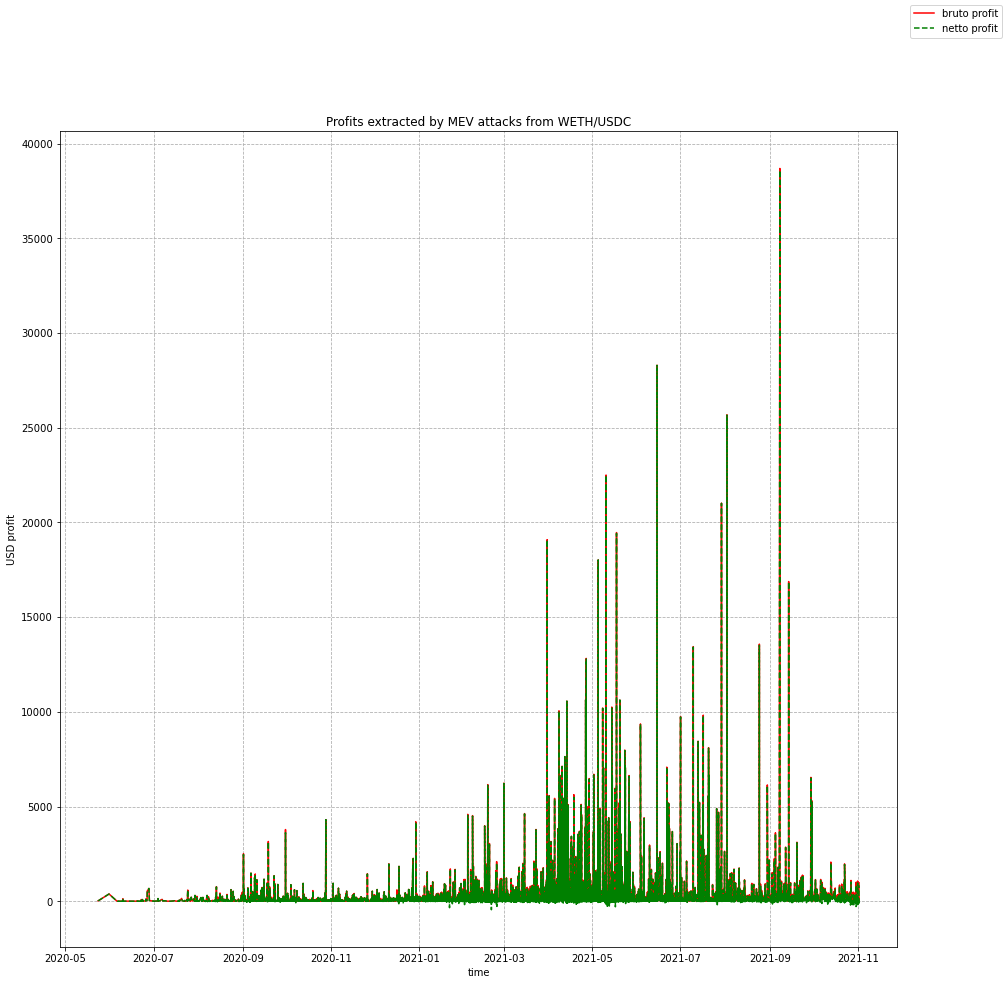

In [47]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(weth_usdc_possible_mevs_df.timestamp, weth_usdc_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(weth_usdc_possible_mevs_df.timestamp, weth_usdc_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from WETH/USDC')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [48]:
print("max bruto profit in USD = " +
      str(weth_usdc_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 38685.461107627285


In [49]:
print("min bruto profit in USD = " +
      str(weth_usdc_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 0.0


In [50]:
print("max netto profit in USD = " +
      str(weth_usdc_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 38579.82390161665


In [51]:
print("min netto profit in USD = " +
      str(weth_usdc_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -449.71619989299785


In [52]:
print("amount of zero bruto profit possible attacks = " +
      str(len(weth_usdc_possible_mevs_df[weth_usdc_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 1


In [53]:
print("amount of losses attacks = " +
      str(len(weth_usdc_possible_mevs_df[weth_usdc_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 1973


In [54]:
weth_usdc_possible_mevs_df[weth_usdc_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_weth_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
6,WETH,USDC,0.500000,120.906339,120.356058,2020-06-05 17:59:58,0xc3037b2a1a9e9268025ff6d45fe7095436446d52,0xc3037b2a1a9e9268025ff6d45fe7095436446d52,0x59f2f54593a333bf1e684a38aa0fdbc7d825c2a3806a...,0.373206,...,241.475054,10207198.0,100.0,372788.0,240.08,3.190000e-08,0.723212,0.723212,2.871606,-2.148394
8,USDC,WETH,120.906339,0.497005,119.982851,2020-06-05 17:59:58,0xc3037b2a1a9e9268025ff6d45fe7095436446d52,0xc3037b2a1a9e9268025ff6d45fe7095436446d52,0x59f2f54593a333bf1e684a38aa0fdbc7d825c2a3806a...,0.373206,...,241.475054,10207198.0,100.0,372788.0,240.08,3.190000e-08,0.723212,0.723212,2.871606,-2.148394
12,WETH,USDC,2.818702,674.588856,676.897972,2020-06-06 18:11:45,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x69c21c1508fc3c53c95ae8ab01849c169d5f20ce341d...,1.160815,...,242.832625,10213686.0,47.0,134242.0,242.08,5.000000e-08,0.219725,0.219725,1.629917,-1.410192
13,USDC,WETH,674.588856,2.817797,675.737157,2020-06-06 18:11:45,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa43936bc9337004ffe6f734bc841591cce119b491853...,1.160815,...,242.832625,10213686.0,116.0,110063.0,242.08,5.000000e-08,0.219725,0.219725,1.336344,-1.116619
38,WETH,USDC,3.000000,685.414729,683.101689,2020-06-19 11:32:35,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x1474cb1d40cbe0a27cff715febaeb76b36e31690063d...,1.663937,...,227.894952,10295933.0,32.0,134242.0,228.71,4.000000e-08,0.874262,0.874262,1.223723,-0.349461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,WETH,USDC,1.167676,4949.285300,4951.777968,2021-10-31 20:14:34,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x2280937c7fe68fedeab48608d27793cf19a17622,0x05ea3d4bef0e0e7ca5ff34ccd798e93a1bbe2097f850...,35.715705,...,4311.971823,13526842.0,141.0,345108.0,4290.10,1.732466e-07,21.121597,71.836297,257.807548,-185.971251
27542,USDC,WETH,5000.000000,1.172574,4987.493673,2021-10-31 20:14:34,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xa0c3645077b6ea895dbf83a2a6bcedce44f1322d,0x41593cb9e29f1901a8f6b595d0848c66144a2003e68d...,35.715705,...,4311.971823,13526842.0,92.0,321164.0,4290.10,1.742466e-07,21.121597,71.836297,241.305407,-169.469109
27549,USDC,WETH,4613.756596,1.056225,4606.149848,2021-11-01 13:48:13,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x21a7afa9f7e2d48bfa8e8f384d77f3b5c19a5add,0x0e871bf2911a55e6f51b2fe4c1c9f45810113aad43b4...,6.899396,...,4317.786653,13531523.0,350.0,212228.0,4322.79,2.274152e-07,6.855270,27.602292,208.393144,-180.790852
27550,WETH,USDC,1.057812,4593.009574,4599.250452,2021-11-01 13:48:13,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x29d0c5a2ba87f7e889df714274948b4a59878491,0x71cd4f3313a70f68e3a9c55b2e419d0da3dc29936df6...,6.899396,...,4317.786653,13531523.0,321.0,174986.0,4322.79,2.274152e-07,6.855270,27.602292,171.824088,-144.221797


In [55]:
weth_usdc_possible_mevs_df[weth_usdc_possible_mevs_df['timestamp'] == datetime.fromisoformat("2020-12-12 19:16:47")]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,profit,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_weth_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit


## WBTC/DAI

In [56]:
wbtc_dai_suspicious_filtered_swaps_df, wbtc_dai_possible_mevs_df = wbtc_dai_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 14588, filtered len = 14530
txds = 58
out values = 29.0


In [57]:
wbtc_dai_possible_mevs_df = wbtc_dai_sim.calculate_attack_profit(wbtc_dai_possible_mevs_df)
wbtc_dai_possible_mevs_df = wbtc_dai_sim.calculate_attack_profit_by_token(wbtc_dai_possible_mevs_df)

In [58]:
wbtc_dai_possible_mevs_df['date'] = wbtc_dai_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")

In [59]:
wbtc_dai_possible_mevs_df = pd.merge(wbtc_dai_possible_mevs_df, wbtc_price_df, on='date', how='left')
wbtc_dai_possible_mevs_df = pd.merge(wbtc_dai_possible_mevs_df, weth_price_df, on='date', how='left')
wbtc_dai_possible_mevs_df = pd.merge(wbtc_dai_possible_mevs_df, classic_possible_mevs_df, on='txd', how='left')

In [60]:
wbtc_dai_possible_mevs_df['bruto_wbtc_to_usdc_profit'] = wbtc_dai_possible_mevs_df['WBTC_profit'] * wbtc_dai_possible_mevs_df['WBTC_price']
wbtc_dai_possible_mevs_df['bruto_total_profit'] = wbtc_dai_possible_mevs_df['bruto_wbtc_to_usdc_profit'] + wbtc_dai_possible_mevs_df['DAI_profit']
wbtc_dai_possible_mevs_df.loc[wbtc_dai_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = wbtc_dai_possible_mevs_df['tx_fee'].median()
wbtc_dai_possible_mevs_df.loc[wbtc_dai_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = wbtc_dai_possible_mevs_df['tx_fee'].median()
wbtc_dai_possible_mevs_df['gas_costs_usd'] = (wbtc_dai_possible_mevs_df['tx_fee'] * wbtc_dai_possible_mevs_df['WETH_price'] *
                                      wbtc_dai_possible_mevs_df['gas_usage_by_tx'])
wbtc_dai_possible_mevs_df['netto_profit'] = wbtc_dai_possible_mevs_df['bruto_total_profit'] - wbtc_dai_possible_mevs_df['gas_costs_usd']
wbtc_dai_possible_mevs_df.dropna(inplace=True)

In [61]:
wbtc_dai_count_df = wbtc_dai_possible_mevs_df.value_counts(subset=['timestamp'])
wbtc_dai_count_df[wbtc_dai_count_df.values > 2]

Series([], dtype: int64)

In [62]:
print(len(wbtc_dai_possible_mevs_df))
wbtc_dai_possible_mevs_df

58


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_wbtc_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,DAI,WBTC,4811.280438,0.385417,4829.977522,2020-10-26 17:14:42,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ee8ab2a8d890c000acc87bf6e22e2ad383e23ce,0x21358d1711f78cae9297ccfe83f848c4c6251240fa5a...,86000000000,...,394.337638,11133320,147,340402,393.11,8.600000e-08,642.256511,1233.153983,11.544066,1221.609917
1,WBTC,DAI,0.434258,5402.177910,5422.951033,2020-10-26 17:14:42,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x79b6c6f8634ea477ed725ec23b7b6fcb41f00e58,0xa069d23c696bb6ea7ccb11f6788945fc11cbf1ba7769...,86000000000,...,394.337638,11133320,146,452140,393.11,8.600000e-08,642.256511,1233.153983,15.333440,1217.820542
2,DAI,WBTC,4523.279323,0.083151,4529.538329,2021-04-11 15:09:26,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0xceff51756c56ceffca006cd410b03ffc46dd3a58,0x1e2b83c165c15de97028b842f3a7d974eb119514e8fb...,0,...,2145.249496,12219352,2,122852,2150.54,1.195401e-07,304.377963,304.377963,31.504588,272.873375
3,WBTC,DAI,0.078077,4523.279323,4529.538329,2021-04-11 15:09:26,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0x4716e7c7121c0ae1637adecb2bfd1f7b56d9f9eac1cd...,0,...,2145.249496,12219352,0,169427,2150.54,1.195401e-07,304.377963,304.377963,43.448440,260.929523
4,DAI,WBTC,6505.228773,0.116225,6492.614774,2021-04-15 12:46:03,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0xceff51756c56ceffca006cd410b03ffc46dd3a58,0xaa2375d2002b37a380aeda8e617f5bc6e6f7e2d4cb43...,0,...,2515.278409,12244728,2,119076,2517.08,1.195401e-07,581.004850,581.004850,35.803383,545.201467
5,WBTC,DAI,0.107027,6505.228773,6492.614774,2021-04-15 12:46:03,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0xd63d25592b1e7997ba29c1087414c263a6401c198bca...,0,...,2515.278409,12244728,0,162639,2517.08,1.195401e-07,581.004850,581.004850,48.901763,532.103087
6,WBTC,DAI,0.187529,6981.668977,6996.521564,2021-06-07 02:04:26,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x915c1721e7c83eb0b1d819b8883d548621795c0e6a9c...,0,...,2585.913415,12584666,5,57874,2593.12,1.195401e-07,0.000336,52.764257,17.890037,34.874220
7,DAI,WBTC,6928.905056,0.187529,6943.645394,2021-06-07 02:04:26,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0xc927ab39f978dee7f90d30e43c2d2bb7f1adf22e06c4...,0,...,2585.913415,12584666,3,58904,2593.12,1.195401e-07,0.000336,52.764257,18.208431,34.555826
8,WBTC,DAI,1.591231,60577.072391,60722.038222,2021-06-09 05:18:18,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x2c19ca7b0244e0a3905947c168ec06f55d6e425e1bc1...,0,...,2607.266575,12598412,2,57874,2610.64,1.195401e-07,0.000373,488.211824,18.037764,470.174060
9,DAI,WBTC,60088.860940,1.591231,60232.658442,2021-06-09 05:18:18,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0xa3b26dbc559f4da252b7997d358e59591f13fe74ea6e...,0,...,2607.266575,12598412,0,58892,2610.64,1.195401e-07,0.000373,488.211824,18.355047,469.856777


In [63]:
wbtc_dai_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [64]:
print(len(wbtc_dai_possible_mevs_df))
wbtc_dai_possible_mevs_df

58


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_wbtc_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,DAI,WBTC,4811.280438,0.385417,4829.977522,2020-10-26 17:14:42,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ee8ab2a8d890c000acc87bf6e22e2ad383e23ce,0x21358d1711f78cae9297ccfe83f848c4c6251240fa5a...,86000000000,...,394.337638,11133320,147,340402,393.11,8.600000e-08,642.256511,1233.153983,11.544066,1221.609917
1,WBTC,DAI,0.434258,5402.177910,5422.951033,2020-10-26 17:14:42,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x79b6c6f8634ea477ed725ec23b7b6fcb41f00e58,0xa069d23c696bb6ea7ccb11f6788945fc11cbf1ba7769...,86000000000,...,394.337638,11133320,146,452140,393.11,8.600000e-08,642.256511,1233.153983,15.333440,1217.820542
2,DAI,WBTC,4523.279323,0.083151,4529.538329,2021-04-11 15:09:26,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0xceff51756c56ceffca006cd410b03ffc46dd3a58,0x1e2b83c165c15de97028b842f3a7d974eb119514e8fb...,0,...,2145.249496,12219352,2,122852,2150.54,1.195401e-07,304.377963,304.377963,31.504588,272.873375
3,WBTC,DAI,0.078077,4523.279323,4529.538329,2021-04-11 15:09:26,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0x4716e7c7121c0ae1637adecb2bfd1f7b56d9f9eac1cd...,0,...,2145.249496,12219352,0,169427,2150.54,1.195401e-07,304.377963,304.377963,43.448440,260.929523
4,DAI,WBTC,6505.228773,0.116225,6492.614774,2021-04-15 12:46:03,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0xceff51756c56ceffca006cd410b03ffc46dd3a58,0xaa2375d2002b37a380aeda8e617f5bc6e6f7e2d4cb43...,0,...,2515.278409,12244728,2,119076,2517.08,1.195401e-07,581.004850,581.004850,35.803383,545.201467
5,WBTC,DAI,0.107027,6505.228773,6492.614774,2021-04-15 12:46:03,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0xf73d5d4962e08c1d572f56e2f3e2728a77507e16,0xd63d25592b1e7997ba29c1087414c263a6401c198bca...,0,...,2515.278409,12244728,0,162639,2517.08,1.195401e-07,581.004850,581.004850,48.901763,532.103087
6,WBTC,DAI,0.187529,6981.668977,6996.521564,2021-06-07 02:04:26,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x915c1721e7c83eb0b1d819b8883d548621795c0e6a9c...,0,...,2585.913415,12584666,5,57874,2593.12,1.195401e-07,0.000336,52.764257,17.890037,34.874220
7,DAI,WBTC,6928.905056,0.187529,6943.645394,2021-06-07 02:04:26,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0xc927ab39f978dee7f90d30e43c2d2bb7f1adf22e06c4...,0,...,2585.913415,12584666,3,58904,2593.12,1.195401e-07,0.000336,52.764257,18.208431,34.555826
8,WBTC,DAI,1.591231,60577.072391,60722.038222,2021-06-09 05:18:18,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x2c19ca7b0244e0a3905947c168ec06f55d6e425e1bc1...,0,...,2607.266575,12598412,2,57874,2610.64,1.195401e-07,0.000373,488.211824,18.037764,470.174060
9,DAI,WBTC,60088.860940,1.591231,60232.658442,2021-06-09 05:18:18,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0xa3b26dbc559f4da252b7997d358e59591f13fe74ea6e...,0,...,2607.266575,12598412,0,58892,2610.64,1.195401e-07,0.000373,488.211824,18.355047,469.856777


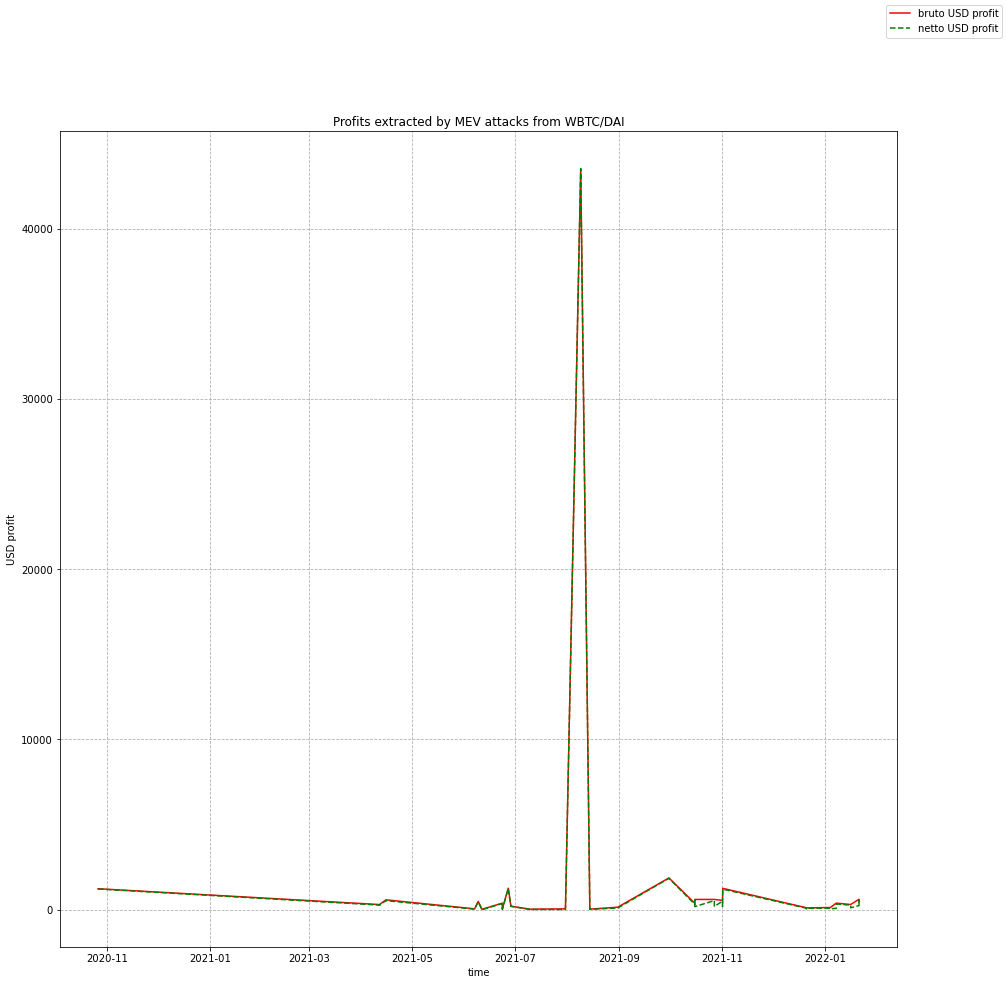

In [65]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(wbtc_dai_possible_mevs_df.timestamp, wbtc_dai_possible_mevs_df.bruto_total_profit, label='bruto USD profit', color='r')
ax.plot(wbtc_dai_possible_mevs_df.timestamp, wbtc_dai_possible_mevs_df.netto_profit, label='netto USD profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from WBTC/DAI')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [66]:
print("max bruto profit in USD = " +
      str(wbtc_dai_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 43538.69250716693


In [67]:
print("min bruto profit in USD = " +
      str(wbtc_dai_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 25.043049049944507


In [68]:
print("max netto profit in USD = " +
      str(wbtc_dai_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 43523.49166824859


In [69]:
print("min netto profit in USD = " +
      str(wbtc_dai_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -0.6300507559736452


In [70]:
print("amount of zero bruto profit possible attacks = " +
      str(len(wbtc_dai_possible_mevs_df[wbtc_dai_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [71]:
print("amount of losses attacks = " +
      str(len(wbtc_dai_possible_mevs_df[wbtc_dai_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 2


In [72]:
wbtc_dai_possible_mevs_df[wbtc_dai_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_wbtc_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
10,DAI,WBTC,11974.383133,0.313333,11967.773369,2021-06-11 10:39:46,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x7b8abf29797d3410fc67968939518c82a0a21ed4c51d...,0,...,2349.834959,12612777,5,91396,2355.09,1.195401e-07,0.000371,25.043049,25.673100,-0.630051
11,WBTC,DAI,0.313333,11999.425811,11992.802224,2021-06-11 10:39:46,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0x00000000b7ca7e12dcc72290d1fe47b2ef14c607,0xe7d74f1a3fa75f280589054d36ea921bafa70552166d...,0,...,2349.834959,12612777,7,90366,2355.09,1.195401e-07,0.000371,25.043049,25.383773,-0.340724


## FEI/WETH

In [73]:
fei_weth_suspicious_filtered_swaps_df, fei_weth_possible_mevs_df = fei_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 61369, filtered len = 61189
txds = 180
out values = 90.0


In [74]:
fei_weth_possible_mevs_df = fei_weth_sim.calculate_attack_profit(fei_weth_possible_mevs_df)
fei_weth_possible_mevs_df = fei_weth_sim.calculate_attack_profit_by_token(fei_weth_possible_mevs_df)

In [75]:
fei_weth_possible_mevs_df['date'] = fei_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")

In [76]:
fei_weth_possible_mevs_df = pd.merge(fei_weth_possible_mevs_df, weth_price_df, on='date', how='left')
fei_weth_possible_mevs_df = pd.merge(fei_weth_possible_mevs_df, classic_possible_mevs_df, on='txd', how='left')

In [77]:
fei_weth_possible_mevs_df['bruto_weth_to_usdc_profit'] = fei_weth_possible_mevs_df['WETH_profit'] * fei_weth_possible_mevs_df['WETH_price']
fei_weth_possible_mevs_df['bruto_total_profit'] = fei_weth_possible_mevs_df['bruto_weth_to_usdc_profit'] + fei_weth_possible_mevs_df['FEI_profit']
fei_weth_possible_mevs_df.loc[fei_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = fei_weth_possible_mevs_df['tx_fee'].median()
fei_weth_possible_mevs_df.loc[fei_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = fei_weth_possible_mevs_df['tx_fee'].median()
fei_weth_possible_mevs_df['gas_costs_usd'] = (fei_weth_possible_mevs_df['tx_fee'] * fei_weth_possible_mevs_df['WETH_price'] *
                                      fei_weth_possible_mevs_df['gas_usage_by_tx'])
fei_weth_possible_mevs_df['netto_profit'] = fei_weth_possible_mevs_df['bruto_total_profit'] - fei_weth_possible_mevs_df['gas_costs_usd']
fei_weth_possible_mevs_df.dropna(inplace=True)

In [78]:
fei_weth_count_df = fei_weth_possible_mevs_df.value_counts(subset=['timestamp'])
fei_weth_count_df[fei_weth_count_df.values > 2]

timestamp          
2021-05-24 18:59:30    4
2021-08-24 03:51:51    4
dtype: int64

In [79]:
print(len(fei_weth_possible_mevs_df))
fei_weth_possible_mevs_df

158


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_weth_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
4,WETH,FEI,4.300000e-01,9.225196e+02,8.944248e+02,2021-04-03 20:45:35,0x9271d303b57c204636c38df0ed339b18bf98f909,0x90a8bbf0795f6e511074059279248a90f43ccbfe,0x832dce760de959a344bf0706bac6f844114b99518148...,133000000000,...,2009.407210,12168848.0,46.0,252188.0,2009.19,1.330000e-07,27.365877,51.199704,67.397535,-16.197831
5,FEI,WETH,8.986857e+02,4.163811e-01,8.660891e+02,2021-04-03 20:45:35,0x9271d303b57c204636c38df0ed339b18bf98f909,0x9271d303b57c204636c38df0ed339b18bf98f909,0xed03c53dc20794463fe354b9222a870e313b4a8cf162...,133000000000,...,2009.407210,12168848.0,22.0,248090.0,2009.19,1.330000e-07,27.365877,51.199704,66.302340,-15.102636
6,FEI,WETH,1.060361e+04,4.917148e+00,1.012200e+04,2021-04-03 21:39:16,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ce01885a13c652241ae02ea7369ee8d466802eb,0x6fa69e616c2f142da1cd2563be964d9a69cb19d49adb...,121000000000,...,2009.407210,12169082.0,133.0,298582.0,2009.19,1.210000e-07,166.482776,280.553479,72.596712,207.956767
7,WETH,FEI,5.000000e+00,1.071768e+04,1.029255e+04,2021-04-03 21:39:16,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x6e1bdc2f76385dd59e1fe72cdbe3e6c9e3f40b7a,0xd008e89b09c9a1516ec99fe7f01b30114834b4a9b04a...,200000000000,...,2009.407210,12169082.0,4.0,256226.0,2009.19,2.000000e-07,166.482776,280.553479,102.972474,177.581005
8,WETH,FEI,1.000000e+02,2.020155e+05,2.005717e+05,2021-04-07 23:12:58,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf6da21e95d74767009accb145b96897ac3630bad,0x617833310ff234328c56967e6fa51ee516fde425b667...,1000000000,...,1966.292699,12195610.0,3.0,160555.0,1964.18,1.000000e-09,794.393099,794.393099,0.315698,794.077400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,WETH,FEI,8.994464e+01,2.155319e+05,2.176300e+05,2022-01-23 20:58:47,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x9e2336aef4157944f201becd90ccb24e298660cb,0xb8b4009b1866b5776541ee59f50844f76c3014e0fb7f...,133133403986,...,2534.454632,14064214.0,0.0,147537.0,2541.60,1.331334e-07,3577.252202,8298.111500,49.782019,8248.329481
180,FEI,WETH,5.811655e+05,2.564705e+02,5.899494e+05,2022-01-24 17:42:13,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x78fb5d7f529465666854f32e720081933c18dd8b8b61...,57744337638045,...,2440.018156,14069755.0,2.0,129939.0,2442.27,5.774434e-05,18737.825662,39775.906860,18308.045462,21467.861398
181,WETH,FEI,2.487911e+02,5.601274e+05,5.722848e+05,2022-01-24 17:42:13,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x9928e4046d7c6513326ccea028cd3e7a91c7590a,0x7eace08ecf81de308513b8694c3400963e58f4e8eed7...,154693304303,...,2440.018156,14069755.0,0.0,150015.0,2442.27,1.546933e-07,18737.825662,39775.906860,56.623832,39719.283028
182,WETH,FEI,7.760372e+02,1.735687e+06,1.839183e+06,2022-01-24 18:09:21,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x9928e4046d7c6513326ccea028cd3e7a91c7590a,0x946bbb97e3e46221a21de9e86a9772c12b92817b6eca...,162313489001,...,2440.018156,14069868.0,1.0,152849.0,2442.27,1.623135e-07,41351.777221,91789.981199,60.535519,91729.445680


In [80]:
fei_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [81]:
print(len(fei_weth_possible_mevs_df))
fei_weth_possible_mevs_df

154


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_weth_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
4,WETH,FEI,4.300000e-01,9.225196e+02,8.944248e+02,2021-04-03 20:45:35,0x9271d303b57c204636c38df0ed339b18bf98f909,0x90a8bbf0795f6e511074059279248a90f43ccbfe,0x832dce760de959a344bf0706bac6f844114b99518148...,133000000000,...,2009.407210,12168848.0,46.0,252188.0,2009.19,1.330000e-07,27.365877,51.199704,67.397535,-16.197831
5,FEI,WETH,8.986857e+02,4.163811e-01,8.660891e+02,2021-04-03 20:45:35,0x9271d303b57c204636c38df0ed339b18bf98f909,0x9271d303b57c204636c38df0ed339b18bf98f909,0xed03c53dc20794463fe354b9222a870e313b4a8cf162...,133000000000,...,2009.407210,12168848.0,22.0,248090.0,2009.19,1.330000e-07,27.365877,51.199704,66.302340,-15.102636
6,FEI,WETH,1.060361e+04,4.917148e+00,1.012200e+04,2021-04-03 21:39:16,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7ce01885a13c652241ae02ea7369ee8d466802eb,0x6fa69e616c2f142da1cd2563be964d9a69cb19d49adb...,121000000000,...,2009.407210,12169082.0,133.0,298582.0,2009.19,1.210000e-07,166.482776,280.553479,72.596712,207.956767
7,WETH,FEI,5.000000e+00,1.071768e+04,1.029255e+04,2021-04-03 21:39:16,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x6e1bdc2f76385dd59e1fe72cdbe3e6c9e3f40b7a,0xd008e89b09c9a1516ec99fe7f01b30114834b4a9b04a...,200000000000,...,2009.407210,12169082.0,4.0,256226.0,2009.19,2.000000e-07,166.482776,280.553479,102.972474,177.581005
8,WETH,FEI,1.000000e+02,2.020155e+05,2.005717e+05,2021-04-07 23:12:58,0xd78a3280085ee846196cb5fab7d510b279486d44,0xf6da21e95d74767009accb145b96897ac3630bad,0x617833310ff234328c56967e6fa51ee516fde425b667...,1000000000,...,1966.292699,12195610.0,3.0,160555.0,1964.18,1.000000e-09,794.393099,794.393099,0.315698,794.077400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,WETH,FEI,8.994464e+01,2.155319e+05,2.176300e+05,2022-01-23 20:58:47,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x9e2336aef4157944f201becd90ccb24e298660cb,0xb8b4009b1866b5776541ee59f50844f76c3014e0fb7f...,133133403986,...,2534.454632,14064214.0,0.0,147537.0,2541.60,1.331334e-07,3577.252202,8298.111500,49.782019,8248.329481
180,FEI,WETH,5.811655e+05,2.564705e+02,5.899494e+05,2022-01-24 17:42:13,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x78fb5d7f529465666854f32e720081933c18dd8b8b61...,57744337638045,...,2440.018156,14069755.0,2.0,129939.0,2442.27,5.774434e-05,18737.825662,39775.906860,18308.045462,21467.861398
181,WETH,FEI,2.487911e+02,5.601274e+05,5.722848e+05,2022-01-24 17:42:13,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x9928e4046d7c6513326ccea028cd3e7a91c7590a,0x7eace08ecf81de308513b8694c3400963e58f4e8eed7...,154693304303,...,2440.018156,14069755.0,0.0,150015.0,2442.27,1.546933e-07,18737.825662,39775.906860,56.623832,39719.283028
182,WETH,FEI,7.760372e+02,1.735687e+06,1.839183e+06,2022-01-24 18:09:21,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x9928e4046d7c6513326ccea028cd3e7a91c7590a,0x946bbb97e3e46221a21de9e86a9772c12b92817b6eca...,162313489001,...,2440.018156,14069868.0,1.0,152849.0,2442.27,1.623135e-07,41351.777221,91789.981199,60.535519,91729.445680


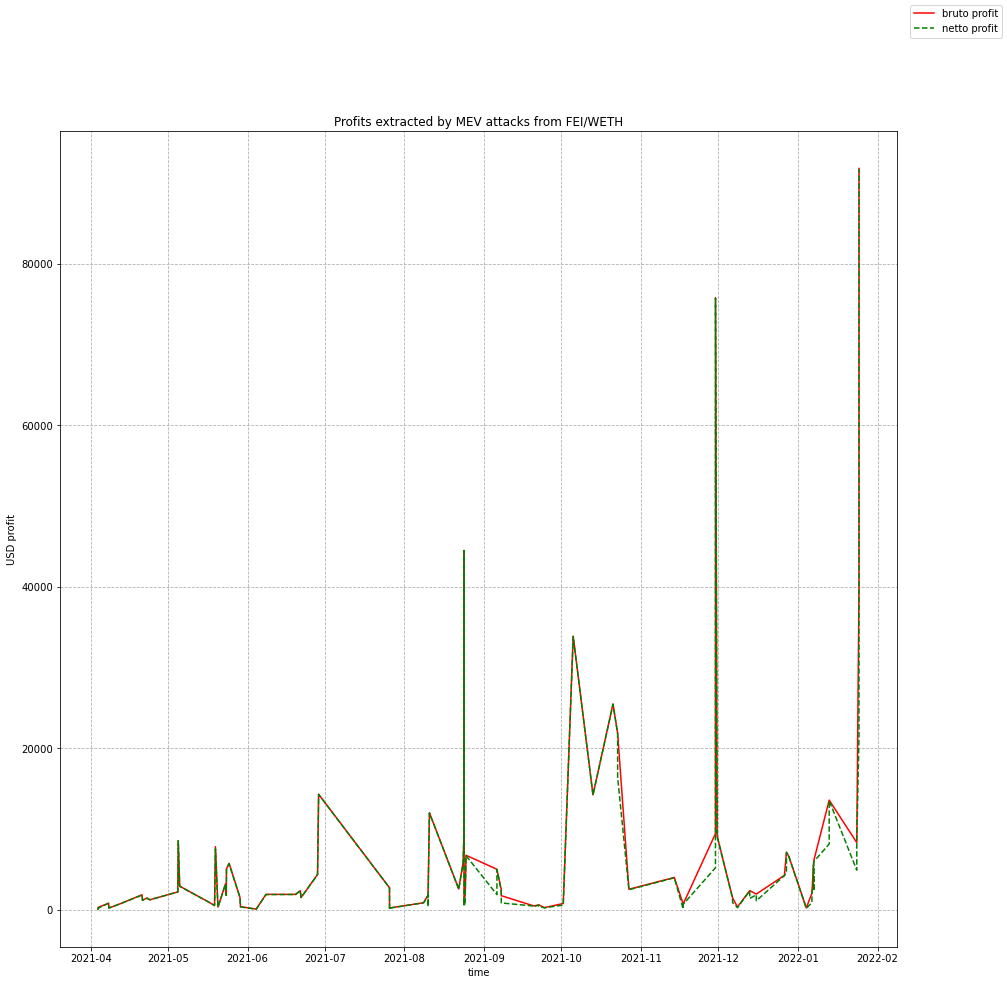

In [82]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(fei_weth_possible_mevs_df.timestamp, fei_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(fei_weth_possible_mevs_df.timestamp, fei_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from FEI/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [83]:
print("max bruto profit in USD = " +
      str(fei_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 91789.9811991562


In [84]:
print("min bruto profit in USD = " +
      str(fei_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 51.199704328856015


In [85]:
print("max netto profit in USD = " +
      str(fei_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 91740.8557691488


In [86]:
print("min netto profit in USD = " +
      str(fei_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -16.197830923164105


In [87]:
print("amount of zero bruto profit possible attacks = " +
      str(len(fei_weth_possible_mevs_df[fei_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [88]:
print("amount of losses attacks = " +
      str(len(fei_weth_possible_mevs_df[fei_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 2


In [89]:
fei_weth_possible_mevs_df[fei_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_weth_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
4,WETH,FEI,0.43000,922.519567,894.424799,2021-04-03 20:45:35,0x9271d303b57c204636c38df0ed339b18bf98f909,0x90a8bbf0795f6e511074059279248a90f43ccbfe,0x832dce760de959a344bf0706bac6f844114b99518148...,133000000000,...,2009.40721,12168848.0,46.0,252188.0,2009.19,1.330000e-07,27.365877,51.199704,67.397535,-16.197831
5,FEI,WETH,898.68574,0.416381,866.089060,2021-04-03 20:45:35,0x9271d303b57c204636c38df0ed339b18bf98f909,0x9271d303b57c204636c38df0ed339b18bf98f909,0xed03c53dc20794463fe354b9222a870e313b4a8cf162...,133000000000,...,2009.40721,12168848.0,22.0,248090.0,2009.19,1.330000e-07,27.365877,51.199704,66.302340,-15.102636


## HKMT/USDT

In [90]:
hkmt_usdt_suspicious_filtered_swaps_df, hkmt_usdt_possible_mevs_df = hkmt_usdt_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 429, filtered len = 425
txds = 4
out values = 2.0


In [91]:
hkmt_usdt_possible_mevs_df = hkmt_usdt_sim.calculate_attack_profit(hkmt_usdt_possible_mevs_df)
hkmt_usdt_possible_mevs_df = hkmt_usdt_sim.calculate_attack_profit_by_token(hkmt_usdt_possible_mevs_df)

In [92]:
hkmt_price_df = hkmt_usdt_sim.get_daily_token_price(first_to_second=False, token_name='HKMT')

In [93]:
hkmt_usdt_possible_mevs_df['date'] = hkmt_usdt_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
hkmt_price_df['date'] = hkmt_price_df['date'].dt.strftime("%Y-%m-%d")

In [94]:
hkmt_usdt_possible_mevs_df = pd.merge(hkmt_usdt_possible_mevs_df, hkmt_price_df, on='date', how='left')
hkmt_usdt_possible_mevs_df = pd.merge(hkmt_usdt_possible_mevs_df, weth_price_df, on='date', how='left')
hkmt_usdt_possible_mevs_df = pd.merge(hkmt_usdt_possible_mevs_df, classic_possible_mevs_df, on='txd', how='left')

In [95]:
hkmt_usdt_possible_mevs_df['bruto_hkmt_to_usdt_profit'] = hkmt_usdt_possible_mevs_df['HKMT_profit'] * hkmt_usdt_possible_mevs_df['HKMT_price']
hkmt_usdt_possible_mevs_df['bruto_total_profit'] = hkmt_usdt_possible_mevs_df['bruto_hkmt_to_usdt_profit'] + hkmt_usdt_possible_mevs_df['USDT_profit']
hkmt_usdt_possible_mevs_df.loc[hkmt_usdt_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = hkmt_usdt_possible_mevs_df['tx_fee'].median()
hkmt_usdt_possible_mevs_df.loc[hkmt_usdt_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = hkmt_usdt_possible_mevs_df['tx_fee'].median()
hkmt_usdt_possible_mevs_df['gas_costs_usd'] = (hkmt_usdt_possible_mevs_df['tx_fee'] * hkmt_usdt_possible_mevs_df['WETH_price'] *
                                      hkmt_usdt_possible_mevs_df['gas_usage_by_tx'])
hkmt_usdt_possible_mevs_df['netto_profit'] = hkmt_usdt_possible_mevs_df['bruto_total_profit'] - hkmt_usdt_possible_mevs_df['gas_costs_usd']
hkmt_usdt_possible_mevs_df.dropna(inplace=True)

In [96]:
hkmt_usdt_count_df = hkmt_usdt_possible_mevs_df.value_counts(subset=['timestamp'])
hkmt_usdt_count_df[hkmt_usdt_count_df.values > 2]

Series([], dtype: int64)

In [97]:
print(len(hkmt_usdt_possible_mevs_df))
hkmt_usdt_possible_mevs_df

4


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_hkmt_to_usdt_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,HKMT,USDT,986371.884933,122952.169728,123061.745264,2022-01-24 07:03:06,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x98122983817cbe0954385246db41b84401a27d77b4e4...,961625684152,...,2440.018156,14066859,2,92944,2442.27,9.616257e-07,2.486719e-07,259.843072,218.082326,41.760746
1,USDT,HKMT,122692.326656,986371.884935,122801.670618,2022-01-24 07:03:06,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xe33dbf0b99ceb9405e2d8d16222e68fcddecc469b4b6...,78424540633,...,2440.018156,14066859,0,120074,2442.27,7.842454e-08,2.486719e-07,259.843072,22.977037,236.866035
2,USDT,HKMT,122981.406976,983689.039976,122823.392267,2022-01-26 07:12:08,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x6eb7c947848fa63ebfe5ffa539a166afdb4d8043600a...,86561223573,...,2465.400061,14079833,0,102974,2464.13,8.656122e-08,0.000000e+00,257.910784,21.975480,235.935304
3,HKMT,USDT,983689.039976,123239.317760,123080.971670,2022-01-26 07:12:08,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xcd6b5cc70a049e39ffa37fa65428a09cfeae85be144e...,943775881669,...,2465.400061,14079833,2,92944,2464.13,9.437759e-07,0.000000e+00,257.910784,216.260716,41.650068


In [98]:
hkmt_usdt_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [99]:
print(len(hkmt_usdt_possible_mevs_df))
hkmt_usdt_possible_mevs_df

4


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_hkmt_to_usdt_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,HKMT,USDT,986371.884933,122952.169728,123061.745264,2022-01-24 07:03:06,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x98122983817cbe0954385246db41b84401a27d77b4e4...,961625684152,...,2440.018156,14066859,2,92944,2442.27,9.616257e-07,2.486719e-07,259.843072,218.082326,41.760746
1,USDT,HKMT,122692.326656,986371.884935,122801.670618,2022-01-24 07:03:06,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xe33dbf0b99ceb9405e2d8d16222e68fcddecc469b4b6...,78424540633,...,2440.018156,14066859,0,120074,2442.27,7.842454e-08,2.486719e-07,259.843072,22.977037,236.866035
2,USDT,HKMT,122981.406976,983689.039976,122823.392267,2022-01-26 07:12:08,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x6eb7c947848fa63ebfe5ffa539a166afdb4d8043600a...,86561223573,...,2465.400061,14079833,0,102974,2464.13,8.656122e-08,0.000000e+00,257.910784,21.975480,235.935304
3,HKMT,USDT,983689.039976,123239.317760,123080.971670,2022-01-26 07:12:08,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xcd6b5cc70a049e39ffa37fa65428a09cfeae85be144e...,943775881669,...,2465.400061,14079833,2,92944,2464.13,9.437759e-07,0.000000e+00,257.910784,216.260716,41.650068


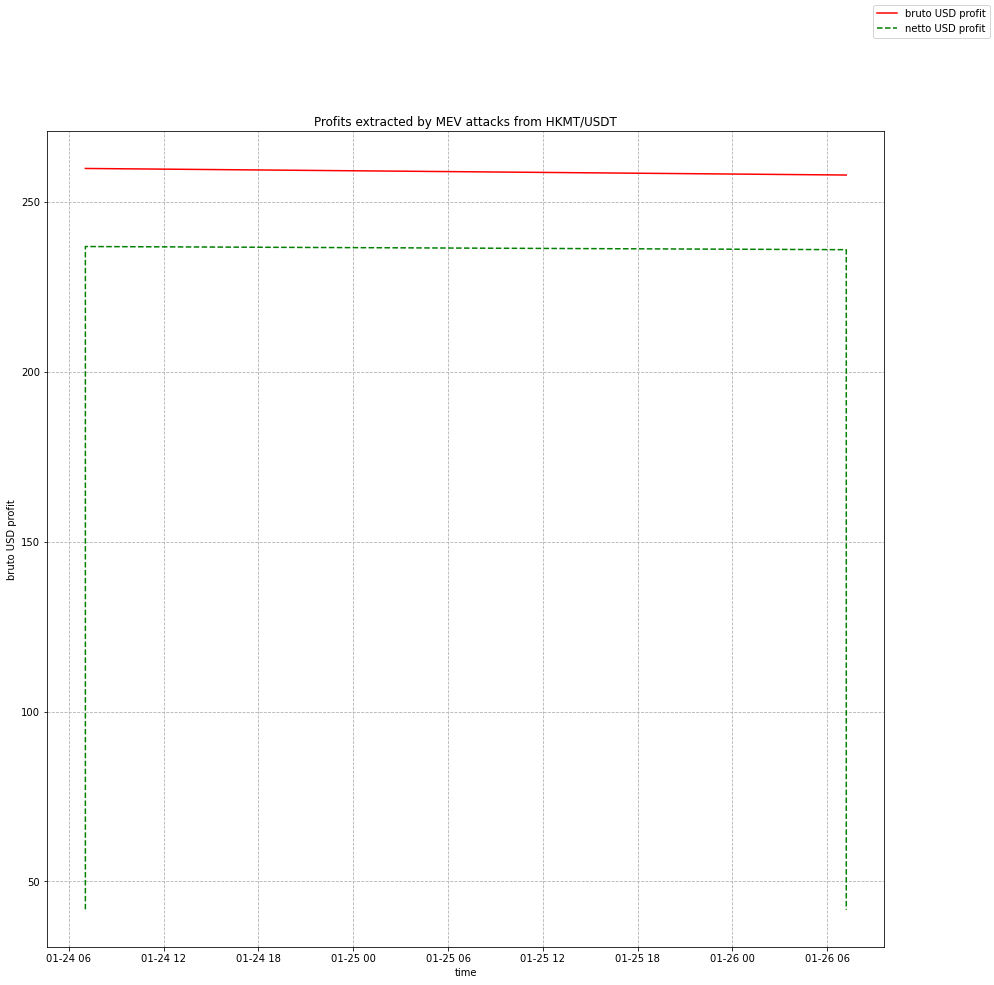

In [100]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(hkmt_usdt_possible_mevs_df.timestamp, hkmt_usdt_possible_mevs_df.bruto_total_profit, label='bruto USD profit', color='r')
ax.plot(hkmt_usdt_possible_mevs_df.timestamp, hkmt_usdt_possible_mevs_df.netto_profit, label='netto USD profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('bruto USD profit')
ax.set_title('Profits extracted by MEV attacks from HKMT/USDT')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [101]:
print("max bruto profit in USD = " +
      str(hkmt_usdt_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 259.8430722486607


In [102]:
print("min bruto profit in USD = " +
      str(hkmt_usdt_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 257.91078400000697


In [103]:
print("max netto profit in USD = " +
      str(hkmt_usdt_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 236.86603545288298


In [104]:
print("min netto profit in USD = " +
      str(hkmt_usdt_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = 41.65006819495031


In [105]:
print("amount of zero bruto profit possible attacks = " +
      str(len(hkmt_usdt_possible_mevs_df[hkmt_usdt_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [106]:
print("amount of losses attacks = " +
      str(len(hkmt_usdt_possible_mevs_df[hkmt_usdt_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 0


In [107]:
hkmt_usdt_possible_mevs_df[hkmt_usdt_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_hkmt_to_usdt_profit,bruto_total_profit,gas_costs_usd,netto_profit


## IXS/WETH

In [108]:
ixs_weth_suspicious_filtered_swaps_df, ixs_weth_possible_mevs_df = ixs_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

initial len = 2474, filtered len = 2324
txds = 150
out values = 75.0


In [109]:
ixs_weth_possible_mevs_df = ixs_weth_sim.calculate_attack_profit(ixs_weth_possible_mevs_df)
ixs_weth_possible_mevs_df = ixs_weth_sim.calculate_attack_profit_by_token(ixs_weth_possible_mevs_df)

In [110]:
ixs_price_df = ixs_weth_sim.get_daily_token_price(first_to_second=False, token_name='IXS')

In [111]:
ixs_weth_possible_mevs_df['date'] = ixs_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
ixs_price_df['date'] = ixs_price_df['date'].dt.strftime("%Y-%m-%d")

In [112]:
ixs_weth_possible_mevs_df = pd.merge(ixs_weth_possible_mevs_df, ixs_price_df, on='date', how='left')
ixs_weth_possible_mevs_df = pd.merge(ixs_weth_possible_mevs_df, weth_price_df, on='date', how='left')
ixs_weth_possible_mevs_df = pd.merge(ixs_weth_possible_mevs_df, classic_possible_mevs_df, on='txd', how='left')

In [113]:
ixs_weth_possible_mevs_df['bruto_ixs_to_weth_profit'] = ixs_weth_possible_mevs_df['IXS_profit'] * ixs_weth_possible_mevs_df['IXS_price']
ixs_weth_possible_mevs_df['bruto_total_profit'] = ((ixs_weth_possible_mevs_df['bruto_ixs_to_weth_profit'] * ixs_weth_possible_mevs_df["WETH_price"]) +
                                                   (ixs_weth_possible_mevs_df['WETH_profit'] * ixs_weth_possible_mevs_df['WETH_price']))
ixs_weth_possible_mevs_df.loc[ixs_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = ixs_weth_possible_mevs_df['tx_fee'].median()
ixs_weth_possible_mevs_df.loc[ixs_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = ixs_weth_possible_mevs_df['tx_fee'].median()
ixs_weth_possible_mevs_df['gas_costs_usd'] = (ixs_weth_possible_mevs_df['tx_fee'] * ixs_weth_possible_mevs_df['WETH_price'] *
                                      ixs_weth_possible_mevs_df['gas_usage_by_tx'])
ixs_weth_possible_mevs_df['netto_profit'] = ixs_weth_possible_mevs_df['bruto_total_profit'] - ixs_weth_possible_mevs_df['gas_costs_usd']
ixs_weth_possible_mevs_df.dropna(inplace=True)

In [114]:
ixs_weth_count_df = ixs_weth_possible_mevs_df.value_counts(subset=['timestamp'])
ixs_weth_count_df[ixs_weth_count_df.values > 2]

timestamp          
2021-09-08 13:07:38    8
dtype: int64

In [115]:
print(len(ixs_weth_possible_mevs_df))
ixs_weth_possible_mevs_df

154


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_ixs_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,IXS,WETH,10781.086133,1.010521,3412.553806,2021-09-08 12:59:42,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x05314a2d9bb717a8b4d3b4349d698e9e8c5fd08a6421...,1401228981326,...,3492.304847,13185242,2,78263,3499.69,1.401229e-06,0.0,434.515342,382.981459,51.533883
1,WETH,IXS,0.886100,10781.086133,3050.396683,2021-09-08 12:59:42,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1383c605487ded022ad75231fcb5383841b0c4ef2241...,76362622163,...,3492.304847,13185242,0,139473,3499.69,7.636262e-08,0.0,434.515342,37.194877,397.320465
2,WETH,IXS,0.773200,7766.986865,2655.852184,2021-09-08 13:00:36,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x25d8279ad0999da08ee30d50204ad5b606d1d956a699...,91317423228,...,3492.304847,13185246,4,88351,3499.69,9.131742e-08,0.0,156.397460,28.175865,128.221594
3,IXS,WETH,7766.986865,0.817983,2769.999554,2021-09-08 13:00:36,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x526e0c4e2ee3418dd8e6686d40917b0a67792fe1bf77...,450303637056,...,3492.304847,13185246,6,78253,3499.69,4.503036e-07,0.0,156.397460,123.060478,33.336982
4,IXS,WETH,18797.405327,2.438961,8138.300442,2021-09-08 13:02:58,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x99a8bf002c0989007f93a87150544209f017049f0883...,125484591456,...,3492.304847,13185257,4,89823,3499.69,1.254846e-07,0.0,133.319598,39.363173,93.956424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,WETH,IXS,3.258591,64615.874809,10215.913104,2022-01-09 05:32:54,0x499dd900f800fd0a2ed300006000a57f00fa009b,0x499dd900f800fd0a2ed300006000a57f00fa009b,0x6359588d8b7bf8851d6da7de3f092d6f88f30a54893d...,96534076405,...,3138.028260,13969479,1,87023,3150.83,9.653408e-08,0.0,390.953635,26.361587,364.592048
150,WETH,IXS,0.204570,4417.639844,641.339915,2022-01-09 05:33:21,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x0da0019eabf40846f0a0fc8c7a2f53312984111754c2...,109600853456,...,3138.028260,13969481,2,88383,3150.83,1.096009e-07,0.0,59.980496,30.397616,29.582880
151,IXS,WETH,4417.639844,0.223684,701.263874,2022-01-09 05:33:21,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x8d86190d1027eba21b077940f1c414e3ca06ace37839...,117286586847,...,3138.028260,13969481,4,78261,3150.83,1.172866e-07,0.0,59.980496,28.803853,31.176643
152,WETH,IXS,9.850424,153715.045388,27919.796295,2022-01-21 15:38:15,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0da2303947534ae2992d7306e4856859020137e50186...,135879365521,...,2569.459817,14049774,0,88481,2569.59,1.358794e-07,0.0,1211.381392,30.891953,1180.489439


In [116]:
ixs_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [117]:
print(len(ixs_weth_possible_mevs_df))
ixs_weth_possible_mevs_df

150


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_ixs_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,IXS,WETH,10781.086133,1.010521,3412.553806,2021-09-08 12:59:42,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x05314a2d9bb717a8b4d3b4349d698e9e8c5fd08a6421...,1401228981326,...,3492.304847,13185242,2,78263,3499.69,1.401229e-06,0.0,434.515342,382.981459,51.533883
1,WETH,IXS,0.886100,10781.086133,3050.396683,2021-09-08 12:59:42,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1383c605487ded022ad75231fcb5383841b0c4ef2241...,76362622163,...,3492.304847,13185242,0,139473,3499.69,7.636262e-08,0.0,434.515342,37.194877,397.320465
2,WETH,IXS,0.773200,7766.986865,2655.852184,2021-09-08 13:00:36,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x25d8279ad0999da08ee30d50204ad5b606d1d956a699...,91317423228,...,3492.304847,13185246,4,88351,3499.69,9.131742e-08,0.0,156.397460,28.175865,128.221594
3,IXS,WETH,7766.986865,0.817983,2769.999554,2021-09-08 13:00:36,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x526e0c4e2ee3418dd8e6686d40917b0a67792fe1bf77...,450303637056,...,3492.304847,13185246,6,78253,3499.69,4.503036e-07,0.0,156.397460,123.060478,33.336982
4,IXS,WETH,18797.405327,2.438961,8138.300442,2021-09-08 13:02:58,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x99a8bf002c0989007f93a87150544209f017049f0883...,125484591456,...,3492.304847,13185257,4,89823,3499.69,1.254846e-07,0.0,133.319598,39.363173,93.956424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,WETH,IXS,3.258591,64615.874809,10215.913104,2022-01-09 05:32:54,0x499dd900f800fd0a2ed300006000a57f00fa009b,0x499dd900f800fd0a2ed300006000a57f00fa009b,0x6359588d8b7bf8851d6da7de3f092d6f88f30a54893d...,96534076405,...,3138.028260,13969479,1,87023,3150.83,9.653408e-08,0.0,390.953635,26.361587,364.592048
150,WETH,IXS,0.204570,4417.639844,641.339915,2022-01-09 05:33:21,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x0da0019eabf40846f0a0fc8c7a2f53312984111754c2...,109600853456,...,3138.028260,13969481,2,88383,3150.83,1.096009e-07,0.0,59.980496,30.397616,29.582880
151,IXS,WETH,4417.639844,0.223684,701.263874,2022-01-09 05:33:21,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x1d6e8bac6ea3730825bde4b005ed7b2b39a2932d,0x8d86190d1027eba21b077940f1c414e3ca06ace37839...,117286586847,...,3138.028260,13969481,4,78261,3150.83,1.172866e-07,0.0,59.980496,28.803853,31.176643
152,WETH,IXS,9.850424,153715.045388,27919.796295,2022-01-21 15:38:15,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0000000000d41c96294ccdac8612bdfe29c641af,0x0da2303947534ae2992d7306e4856859020137e50186...,135879365521,...,2569.459817,14049774,0,88481,2569.59,1.358794e-07,0.0,1211.381392,30.891953,1180.489439


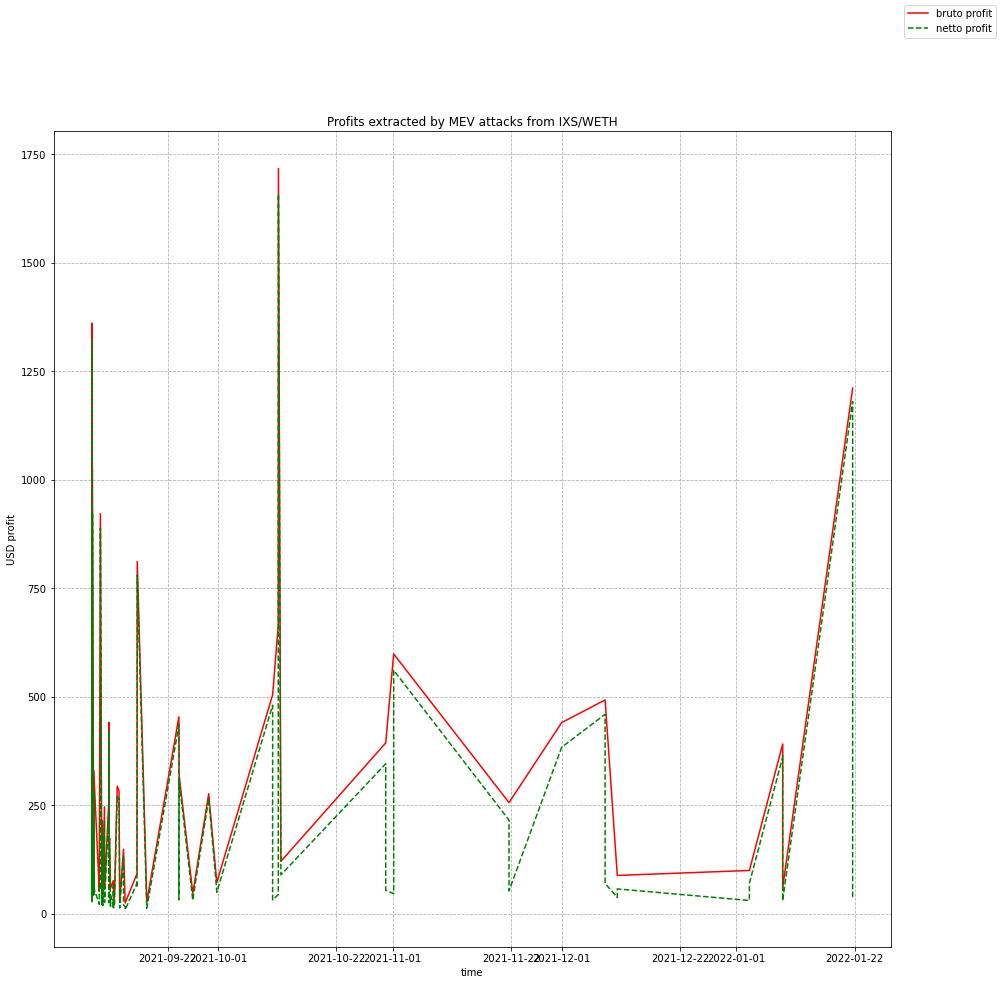

In [118]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(ixs_weth_possible_mevs_df.timestamp, ixs_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(ixs_weth_possible_mevs_df.timestamp, ixs_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from IXS/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [119]:
print("max bruto profit in USD = " +
      str(ixs_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 1717.660110974782


In [120]:
print("min bruto profit in USD = " +
      str(ixs_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 24.24542348122092


In [121]:
print("max netto profit in USD = " +
      str(ixs_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 1658.7370095655995


In [122]:
print("min netto profit in USD = " +
      str(ixs_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = 8.859887099049343


In [123]:
print("amount of zero bruto profit possible attacks = " +
      str(len(ixs_weth_possible_mevs_df[ixs_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [124]:
print("amount of losses attacks = " +
      str(len(ixs_weth_possible_mevs_df[ixs_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 0


In [125]:
ixs_weth_possible_mevs_df[ixs_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,WETH_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_ixs_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit


# STO pools analysis (XAUt/WETH, UMA/FEI, PERL/WETH, BPT/WETH, uSTONKS_APR_21/USDC)

## General steps

In [126]:
# STO token pools
xaut_weth_sim = Simulation(experiment_id = 31, x_name = 'XAUt', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
uma_fei_sim = Simulation(experiment_id = 32, x_name = 'UMA', y_name = 'FEI', window_size = 24,
                         base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
perl_weth_sim = Simulation(experiment_id = 33, x_name = 'PERL', y_name = 'WETH', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
bpt_weth_sim = Simulation(experiment_id = 34, x_name = 'BPT', y_name = 'WETH', window_size = 24,
                          base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
ustonks_usdc_sim = Simulation(experiment_id = 35, x_name = 'uSTONKS_APR_21', y_name = 'USDC', window_size = 24,
                              base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

In [127]:
print("XAUt/WETH results of searching small difference attacks:")
xaut_weth_suspicious_filtered_swaps_df, xaut_weth_possible_mevs_df = xaut_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

print("UMA/FEI results of searching small difference attacks:")
uma_fei_suspicious_filtered_swaps_df, uma_fei_possible_mevs_df = uma_fei_sim.extract_suspicious_and_filtered_swaps_dfs()

print("PERL/WETH results of searching small difference attacks:")
perl_weth_suspicious_filtered_swaps_df, perl_weth_possible_mevs_df = perl_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

print("BPT/WETH results of searching small difference attacks:")
bpt_weth_suspicious_filtered_swaps_df, bpt_weth_possible_mevs_df = bpt_weth_sim.extract_suspicious_and_filtered_swaps_dfs()

print("uSTONKS_APR_21/USDC results of searching small difference attacks:")
ustonks_usdc_suspicious_filtered_swaps_df, ustonks_usdc_possible_mevs_df = ustonks_usdc_sim.extract_suspicious_and_filtered_swaps_dfs()

XAUt/WETH results of searching small difference attacks:
initial len = 31, filtered len = 31
txds = 0
out values = 0.0
UMA/FEI results of searching small difference attacks:
initial len = 1405, filtered len = 1387
txds = 18
out values = 9.0
PERL/WETH results of searching small difference attacks:
initial len = 1908, filtered len = 1850
txds = 58
out values = 29.0
BPT/WETH results of searching small difference attacks:
initial len = 3156, filtered len = 3110
txds = 46
out values = 23.0
uSTONKS_APR_21/USDC results of searching small difference attacks:
initial len = 175, filtered len = 171
txds = 4
out values = 2.0


In [128]:
uma_fei_swaps_df = uma_fei_sim.get_original_swaps_df()
perl_weth_swaps_df = perl_weth_sim.get_original_swaps_df()
bpt_weth_swaps_df = bpt_weth_sim.get_original_swaps_df()
ustonks_usdc_swaps_df = ustonks_usdc_sim.get_original_swaps_df()

In [129]:
sto_pools_list = [uma_fei_swaps_df, perl_weth_swaps_df,
                  bpt_weth_swaps_df, ustonks_usdc_swaps_df]
sto_pools_swaps_df = pd.concat(sto_pools_list)

In [130]:
sto_possible_mevs_df = pd.read_pickle('sto_pools_possible_mevs_with_gas_df.pkl')
sto_possible_mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee
0,0x59d069b69d005f3969744d938187f59bddf8d2a54f52...,13696609,0,"243,161","4,100.30",0.000000103937172786
1,0x9b8a7dae739b6d98dfb54bd5d4e6fc8e3f77df39fa7d...,13696609,2,"152,244","4,100.30",0.000000205007997099
2,0x03b0a9db011593c5bb2df916fbd84d744706ee41d3fa...,13762028,2,"213,971","4,439.98",0.000000053209292896
3,0x1923615091ec7c5c233ec86bfd5eb91faa4f88740c48...,13762028,4,"152,176","4,439.98",0.000000154360551061
4,0x48b7209d8d2edd8f92938a61790bf6313a0f9fbf7257...,13888598,5,"214,175","4,037.87",0.000000098266011875
...,...,...,...,...,...,...
165,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,13067645,4,"123,126","3,226.59",0.00000003476130489
166,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,13086996,2,"133,773","3,172.57",0.000000047930125437
167,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,13086996,0,"159,961","3,172.57",0.000000047930125437
168,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,13250059,3,"180,198","3,435.76",0.00000004160346301


In [131]:
sto_possible_mevs_df = pd.merge(sto_possible_mevs_df, sto_pools_swaps_df, on='txd', how='left')

In [132]:
sto_possible_mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,gas_price,gas_used
0,0x59d069b69d005f3969744d938187f59bddf8d2a54f52...,13696609,0,"243,161","4,100.30",0.000000103937172786,FEI,UMA,38888.161748,2876.894389,38737.358102,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,103937172786,2000000
1,0x9b8a7dae739b6d98dfb54bd5d4e6fc8e3f77df39fa7d...,13696609,2,"152,244","4,100.30",0.000000205007997099,UMA,FEI,2876.894389,39182.321402,38884.496147,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,205007997099,266434
2,0x03b0a9db011593c5bb2df916fbd84d744706ee41d3fa...,13762028,2,"213,971","4,439.98",0.000000053209292896,FEI,UMA,37592.699912,3610.318913,37430.578419,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,53209292896,2000000
3,0x1923615091ec7c5c233ec86bfd5eb91faa4f88740c48...,13762028,4,"152,176","4,439.98",0.000000154360551061,UMA,FEI,3610.318913,37808.608983,37538.511592,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,154360551061,266315
4,0x48b7209d8d2edd8f92938a61790bf6313a0f9fbf7257...,13888598,5,"214,175","4,037.87",0.000000098266011875,FEI,UMA,34626.519619,3261.773446,34265.690450,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,98266011875,2000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,13067645,4,"123,126","3,226.59",0.00000003476130489,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
166,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,13086996,2,"133,773","3,172.57",0.000000047930125437,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
167,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,13086996,0,"159,961","3,172.57",0.000000047930125437,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
168,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,13250059,3,"180,198","3,435.76",0.00000004160346301,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [133]:
sto_possible_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              170 non-null    object        
 1   block            170 non-null    object        
 2   block_position   170 non-null    object        
 3   gas_usage_by_tx  170 non-null    object        
 4   ether_price      170 non-null    object        
 5   tx_fee           170 non-null    object        
 6   token_in         130 non-null    object        
 7   token_out        130 non-null    object        
 8   amount_in        130 non-null    float64       
 9   amount_out       130 non-null    float64       
 10  amount_usd       130 non-null    float64       
 11  timestamp        130 non-null    datetime64[ns]
 12  sender           130 non-null    object        
 13  to               130 non-null    object        
 14  gas_price        130 non-null    object   

In [134]:
sto_possible_mevs_df['block'] = pd.to_numeric(sto_possible_mevs_df['block'])
sto_possible_mevs_df['block_position'] = pd.to_numeric(sto_possible_mevs_df['block_position'])
sto_possible_mevs_df['gas_usage_by_tx'] = pd.to_numeric(sto_possible_mevs_df['gas_usage_by_tx'].str.replace(',', ''))
sto_possible_mevs_df['ether_price'] = sto_possible_mevs_df['ether_price'].str.replace('$', '')
sto_possible_mevs_df['ether_price'] = pd.to_numeric(sto_possible_mevs_df['ether_price'].str.replace(',', ''))
sto_possible_mevs_df['tx_fee'] = pd.to_numeric(sto_possible_mevs_df['tx_fee'].str.replace('wei', ''))
sto_possible_mevs_df['gas_price'] = pd.to_numeric(sto_possible_mevs_df['gas_price']) / 1000000000000000000
sto_possible_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              170 non-null    object        
 1   block            170 non-null    int64         
 2   block_position   170 non-null    int64         
 3   gas_usage_by_tx  170 non-null    int64         
 4   ether_price      170 non-null    float64       
 5   tx_fee           170 non-null    float64       
 6   token_in         130 non-null    object        
 7   token_out        130 non-null    object        
 8   amount_in        130 non-null    float64       
 9   amount_out       130 non-null    float64       
 10  amount_usd       130 non-null    float64       
 11  timestamp        130 non-null    datetime64[ns]
 12  sender           130 non-null    object        
 13  to               130 non-null    object        
 14  gas_price        130 non-null    float64  

<ipython-input-134-1d1c99206639>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sto_possible_mevs_df['ether_price'] = sto_possible_mevs_df['ether_price'].str.replace('$', '')


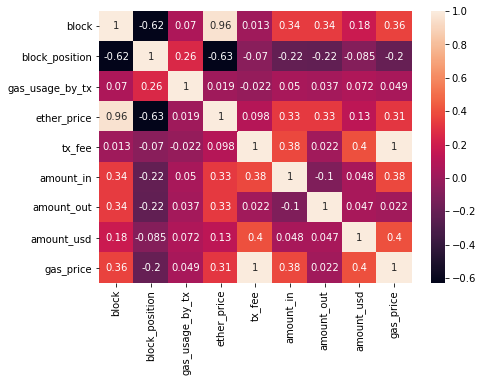

In [135]:
plt.figure(figsize=(7, 5))
sns.heatmap(sto_possible_mevs_df.corr(), annot=True)
plt.show()

In [136]:
sto_possible_mevs_df.sort_values(by=['timestamp', 'block_position'], inplace=True)

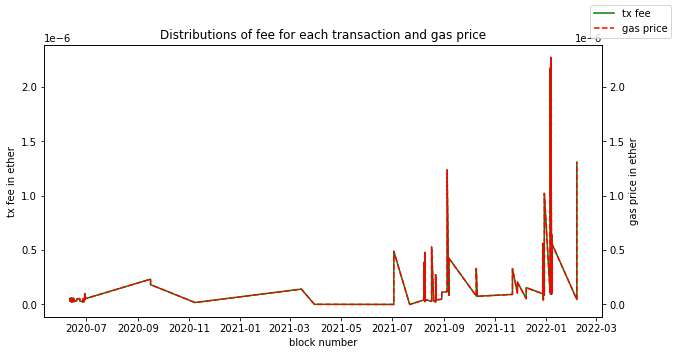

In [137]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['timestamp'], sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['tx_fee'], color='g', label='tx fee')
ax2.plot(sto_possible_mevs_df['timestamp'], sto_possible_mevs_df['gas_price'], color='r', linestyle='--', label='gas price')
ax.set_xlabel('block number')
ax.set_ylabel('tx fee in ether')
ax2.set_ylabel('gas price in ether')
ax.set_title('Distributions of fee for each transaction and gas price')
fig.legend()
plt.show()

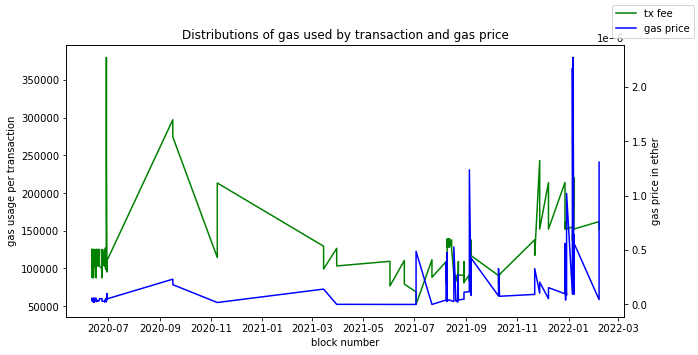

In [138]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['timestamp'], sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['gas_usage_by_tx'], color='g', label='tx fee')
ax2.plot(sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['timestamp'], sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['gas_price'], color='b', label='gas price')
ax.set_xlabel('block number')
ax.set_ylabel('gas usage per transaction')
ax2.set_ylabel('gas price in ether')
ax.set_title('Distributions of gas used by transaction and gas price')
fig.legend()
plt.show()

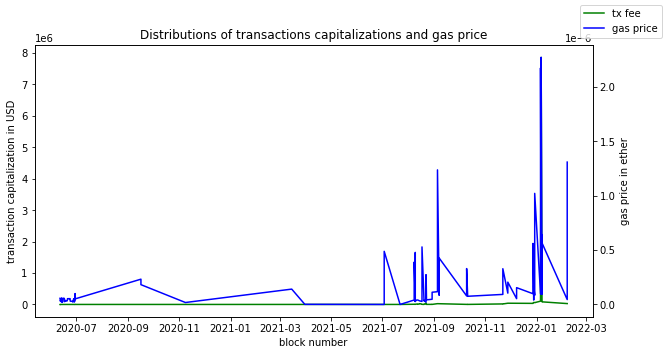

In [139]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['timestamp'], sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['amount_usd'], color='g', label='tx fee')
ax2.plot(sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['timestamp'], sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['gas_price'], color='b', label='gas price')
ax.set_xlabel('block number')
ax.set_ylabel('transaction capitalization in USD')
ax2.set_ylabel('gas price in ether')
ax.set_title('Distributions of transactions capitalizations and gas price')
fig.legend()
plt.show()

In [140]:
sto_possible_mevs_df = sto_possible_mevs_df[['txd', 'block', 'block_position', 'gas_usage_by_tx', 'ether_price', 'tx_fee']]

Presented results show that there were no attacks detected for case of XAUt/WETH pool, meaning that there are only 4 pools remaining for analysis, each of them will be reviewed separately. Still, there is a case of uSTONKS_APR_21/USDC that has only one possible attack and review if this attack will be performed via simpler approach than previous cases.

## UMA/FEI

Contains small amount of attacks performed on the pool, demonstrating low interest of attackers.

In [141]:
uma_fei_possible_mevs_df = uma_fei_sim.calculate_attack_profit_by_token(uma_fei_possible_mevs_df)
uma_fei_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,FEI_profit,UMA_profit
0,FEI,UMA,38888.161748,2876.894389,3.873736e+04,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x59d069b69d005f3969744d938187f59bddf8d2a54f52...,103937172786,2000000,38888.161748,2876.894389,294.159654,0.000000
1,UMA,FEI,2876.894389,39182.321402,3.888450e+04,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x9b8a7dae739b6d98dfb54bd5d4e6fc8e3f77df39fa7d...,205007997099,266434,39182.321402,2876.894389,294.159654,0.000000
2,FEI,UMA,37592.699912,3610.318913,3.743058e+04,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x03b0a9db011593c5bb2df916fbd84d744706ee41d3fa...,53209292896,2000000,37592.699912,3610.318913,215.909071,0.000000
3,UMA,FEI,3610.318913,37808.608983,3.753851e+04,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x1923615091ec7c5c233ec86bfd5eb91faa4f88740c48...,154360551061,266315,37808.608983,3610.318913,215.909071,0.000000
4,FEI,UMA,34626.519619,3261.773446,3.426569e+04,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x48b7209d8d2edd8f92938a61790bf6313a0f9fbf7257...,98266011875,2000000,34626.519619,3261.773446,582.042362,0.000000
5,UMA,FEI,3261.773446,35208.561980,3.455622e+04,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x8fda711e4029a9c5b3470e425a1a7ef2ec66edcf5544...,560838208474,266546,35208.561980,3261.773446,582.042362,0.000000
6,UMA,FEI,6200.876731,64684.371257,6.369420e+04,2021-12-28 11:33:32,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x3a8c8494454dd28217b0c6cef91bf2b66f7f0ce347aa...,172546206640,266497,64684.371257,6200.876731,223.040605,0.000000
7,FEI,UMA,64461.330652,6200.876731,6.358290e+04,2021-12-28 11:33:32,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xa10181622b54f7a1a9af86fe823208acaa373bc7a25e...,40289435267,2000000,64461.330652,6200.876731,223.040605,0.000000
8,UMA,FEI,5931.385586,57924.458652,5.752230e+04,2021-12-29 15:54:00,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x77bcdd0bd07ebcc401b7acae11d66795f85217c41374...,1020914273737,266504,57924.458652,5931.385586,911.210098,0.000000
9,FEI,UMA,57013.248554,5931.385586,5.706675e+04,2021-12-29 15:54:00,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xfd854aa3b9ba9212ea8a7c534ff8bae4ee0d59b07725...,84604829679,2000000,57013.248554,5931.385586,911.210098,0.000000


In [142]:
uma_price_df = uma_fei_sim.get_daily_token_price(first_to_second=False, token_name='UMA')
uma_price_df

,date,UMA_price
0,2021-11-23,14.738456
1,2021-11-24,13.679640
2,2021-11-25,14.650759
3,2021-11-26,12.982204
4,2021-11-27,14.766351
...,...,...
72,2022-02-03,5.599228
73,2022-02-04,6.081955
74,2022-02-05,6.378911
75,2022-02-06,6.424042


In [143]:
uma_fei_possible_mevs_df['date'] = uma_fei_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
uma_price_df['date'] = uma_price_df['date'].dt.strftime("%Y-%m-%d")

uma_fei_possible_mevs_df = pd.merge(uma_fei_possible_mevs_df, weth_price_df, on='date', how='left')
uma_fei_possible_mevs_df = pd.merge(uma_fei_possible_mevs_df, uma_price_df, on='date', how='left')
uma_fei_possible_mevs_df = pd.merge(uma_fei_possible_mevs_df, sto_possible_mevs_df, on='txd', how='left')

uma_fei_possible_mevs_df['bruto_uma_to_fei_profit'] = uma_fei_possible_mevs_df['UMA_profit'] * uma_fei_possible_mevs_df['UMA_price']
uma_fei_possible_mevs_df['bruto_total_profit'] = uma_fei_possible_mevs_df['bruto_uma_to_fei_profit'] + uma_fei_possible_mevs_df['FEI_profit']
uma_fei_possible_mevs_df.loc[uma_fei_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = uma_fei_possible_mevs_df['tx_fee'].median()
uma_fei_possible_mevs_df.loc[uma_fei_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = uma_fei_possible_mevs_df['tx_fee'].median()
uma_fei_possible_mevs_df['gas_costs_usd'] = (uma_fei_possible_mevs_df['tx_fee'] * uma_fei_possible_mevs_df['WETH_price'] *
                                      uma_fei_possible_mevs_df['gas_usage_by_tx'])
uma_fei_possible_mevs_df['netto_profit'] = uma_fei_possible_mevs_df['bruto_total_profit'] - uma_fei_possible_mevs_df['gas_costs_usd']
uma_fei_possible_mevs_df.dropna(inplace=True)
uma_fei_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,UMA_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_uma_to_fei_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,FEI,UMA,38888.161748,2876.894389,3.873736e+04,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x59d069b69d005f3969744d938187f59bddf8d2a54f52...,103937172786,...,14.766351,13696609,0,243161,4100.30,1.039372e-07,0.000000,294.159654,103.276626,190.883028
1,UMA,FEI,2876.894389,39182.321402,3.888450e+04,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x9b8a7dae739b6d98dfb54bd5d4e6fc8e3f77df39fa7d...,205007997099,...,14.766351,13696609,2,152244,4100.30,2.050080e-07,0.000000,294.159654,127.540528,166.619126
2,FEI,UMA,37592.699912,3610.318913,3.743058e+04,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x03b0a9db011593c5bb2df916fbd84d744706ee41d3fa...,53209292896,...,11.023605,13762028,2,213971,4439.98,5.320929e-08,0.000000,215.909071,50.398800,165.510271
3,UMA,FEI,3610.318913,37808.608983,3.753851e+04,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x1923615091ec7c5c233ec86bfd5eb91faa4f88740c48...,154360551061,...,11.023605,13762028,4,152176,4439.98,1.543606e-07,0.000000,215.909071,103.982505,111.926566
4,FEI,UMA,34626.519619,3261.773446,3.426569e+04,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x48b7209d8d2edd8f92938a61790bf6313a0f9fbf7257...,98266011875,...,10.923190,13888598,5,214175,4037.87,9.826601e-08,0.000000,582.042362,85.035902,497.006459
5,UMA,FEI,3261.773446,35208.561980,3.455622e+04,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x8fda711e4029a9c5b3470e425a1a7ef2ec66edcf5544...,560838208474,...,10.923190,13888598,7,152308,4037.87,5.608382e-07,0.000000,582.042362,345.136211,236.906150
6,UMA,FEI,6200.876731,64684.371257,6.369420e+04,2021-12-28 11:33:32,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x3a8c8494454dd28217b0c6cef91bf2b66f7f0ce347aa...,172546206640,...,9.702274,13893503,5,152280,3793.54,1.725462e-07,0.000000,223.040605,99.993358,123.047247
7,FEI,UMA,64461.330652,6200.876731,6.358290e+04,2021-12-28 11:33:32,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xa10181622b54f7a1a9af86fe823208acaa373bc7a25e...,40289435267,...,9.702274,13893503,3,162161,3793.54,4.028944e-08,0.000000,223.040605,24.863397,198.177208
8,UMA,FEI,5931.385586,57924.458652,5.752230e+04,2021-12-29 15:54:00,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x77bcdd0bd07ebcc401b7acae11d66795f85217c41374...,1020914273737,...,9.416560,13901159,6,152284,3629.31,1.020914e-06,0.000000,911.210098,562.781356,348.428742
9,FEI,UMA,57013.248554,5931.385586,5.706675e+04,2021-12-29 15:54:00,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xfd854aa3b9ba9212ea8a7c534ff8bae4ee0d59b07725...,84604829679,...,9.416560,13901159,4,162177,3629.31,8.460483e-08,0.000000,911.210098,49.668445,861.541652


In [144]:
print(len(uma_fei_possible_mevs_df))
uma_fei_possible_mevs_df

18


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,UMA_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_uma_to_fei_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,FEI,UMA,38888.161748,2876.894389,3.873736e+04,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x59d069b69d005f3969744d938187f59bddf8d2a54f52...,103937172786,...,14.766351,13696609,0,243161,4100.30,1.039372e-07,0.000000,294.159654,103.276626,190.883028
1,UMA,FEI,2876.894389,39182.321402,3.888450e+04,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x9b8a7dae739b6d98dfb54bd5d4e6fc8e3f77df39fa7d...,205007997099,...,14.766351,13696609,2,152244,4100.30,2.050080e-07,0.000000,294.159654,127.540528,166.619126
2,FEI,UMA,37592.699912,3610.318913,3.743058e+04,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x03b0a9db011593c5bb2df916fbd84d744706ee41d3fa...,53209292896,...,11.023605,13762028,2,213971,4439.98,5.320929e-08,0.000000,215.909071,50.398800,165.510271
3,UMA,FEI,3610.318913,37808.608983,3.753851e+04,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x1923615091ec7c5c233ec86bfd5eb91faa4f88740c48...,154360551061,...,11.023605,13762028,4,152176,4439.98,1.543606e-07,0.000000,215.909071,103.982505,111.926566
4,FEI,UMA,34626.519619,3261.773446,3.426569e+04,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x48b7209d8d2edd8f92938a61790bf6313a0f9fbf7257...,98266011875,...,10.923190,13888598,5,214175,4037.87,9.826601e-08,0.000000,582.042362,85.035902,497.006459
5,UMA,FEI,3261.773446,35208.561980,3.455622e+04,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x8fda711e4029a9c5b3470e425a1a7ef2ec66edcf5544...,560838208474,...,10.923190,13888598,7,152308,4037.87,5.608382e-07,0.000000,582.042362,345.136211,236.906150
6,UMA,FEI,6200.876731,64684.371257,6.369420e+04,2021-12-28 11:33:32,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x3a8c8494454dd28217b0c6cef91bf2b66f7f0ce347aa...,172546206640,...,9.702274,13893503,5,152280,3793.54,1.725462e-07,0.000000,223.040605,99.993358,123.047247
7,FEI,UMA,64461.330652,6200.876731,6.358290e+04,2021-12-28 11:33:32,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xa10181622b54f7a1a9af86fe823208acaa373bc7a25e...,40289435267,...,9.702274,13893503,3,162161,3793.54,4.028944e-08,0.000000,223.040605,24.863397,198.177208
8,UMA,FEI,5931.385586,57924.458652,5.752230e+04,2021-12-29 15:54:00,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x77bcdd0bd07ebcc401b7acae11d66795f85217c41374...,1020914273737,...,9.416560,13901159,6,152284,3629.31,1.020914e-06,0.000000,911.210098,562.781356,348.428742
9,FEI,UMA,57013.248554,5931.385586,5.706675e+04,2021-12-29 15:54:00,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xfd854aa3b9ba9212ea8a7c534ff8bae4ee0d59b07725...,84604829679,...,9.416560,13901159,4,162177,3629.31,8.460483e-08,0.000000,911.210098,49.668445,861.541652


In [145]:
uma_fei_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [146]:
print(len(uma_fei_possible_mevs_df))
uma_fei_possible_mevs_df

18


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,UMA_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_uma_to_fei_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,FEI,UMA,38888.161748,2876.894389,3.873736e+04,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x59d069b69d005f3969744d938187f59bddf8d2a54f52...,103937172786,...,14.766351,13696609,0,243161,4100.30,1.039372e-07,0.000000,294.159654,103.276626,190.883028
1,UMA,FEI,2876.894389,39182.321402,3.888450e+04,2021-11-27 14:38:35,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x9b8a7dae739b6d98dfb54bd5d4e6fc8e3f77df39fa7d...,205007997099,...,14.766351,13696609,2,152244,4100.30,2.050080e-07,0.000000,294.159654,127.540528,166.619126
2,FEI,UMA,37592.699912,3610.318913,3.743058e+04,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x03b0a9db011593c5bb2df916fbd84d744706ee41d3fa...,53209292896,...,11.023605,13762028,2,213971,4439.98,5.320929e-08,0.000000,215.909071,50.398800,165.510271
3,UMA,FEI,3610.318913,37808.608983,3.753851e+04,2021-12-08 01:48:12,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x1923615091ec7c5c233ec86bfd5eb91faa4f88740c48...,154360551061,...,11.023605,13762028,4,152176,4439.98,1.543606e-07,0.000000,215.909071,103.982505,111.926566
4,FEI,UMA,34626.519619,3261.773446,3.426569e+04,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x48b7209d8d2edd8f92938a61790bf6313a0f9fbf7257...,98266011875,...,10.923190,13888598,5,214175,4037.87,9.826601e-08,0.000000,582.042362,85.035902,497.006459
5,UMA,FEI,3261.773446,35208.561980,3.455622e+04,2021-12-27 17:27:41,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x8fda711e4029a9c5b3470e425a1a7ef2ec66edcf5544...,560838208474,...,10.923190,13888598,7,152308,4037.87,5.608382e-07,0.000000,582.042362,345.136211,236.906150
6,UMA,FEI,6200.876731,64684.371257,6.369420e+04,2021-12-28 11:33:32,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x3a8c8494454dd28217b0c6cef91bf2b66f7f0ce347aa...,172546206640,...,9.702274,13893503,5,152280,3793.54,1.725462e-07,0.000000,223.040605,99.993358,123.047247
7,FEI,UMA,64461.330652,6200.876731,6.358290e+04,2021-12-28 11:33:32,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xa10181622b54f7a1a9af86fe823208acaa373bc7a25e...,40289435267,...,9.702274,13893503,3,162161,3793.54,4.028944e-08,0.000000,223.040605,24.863397,198.177208
8,UMA,FEI,5931.385586,57924.458652,5.752230e+04,2021-12-29 15:54:00,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xbb2e5c2ff298fd96e166f90c8abacaf714df14f8,0x77bcdd0bd07ebcc401b7acae11d66795f85217c41374...,1020914273737,...,9.416560,13901159,6,152284,3629.31,1.020914e-06,0.000000,911.210098,562.781356,348.428742
9,FEI,UMA,57013.248554,5931.385586,5.706675e+04,2021-12-29 15:54:00,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xfd854aa3b9ba9212ea8a7c534ff8bae4ee0d59b07725...,84604829679,...,9.416560,13901159,4,162177,3629.31,8.460483e-08,0.000000,911.210098,49.668445,861.541652


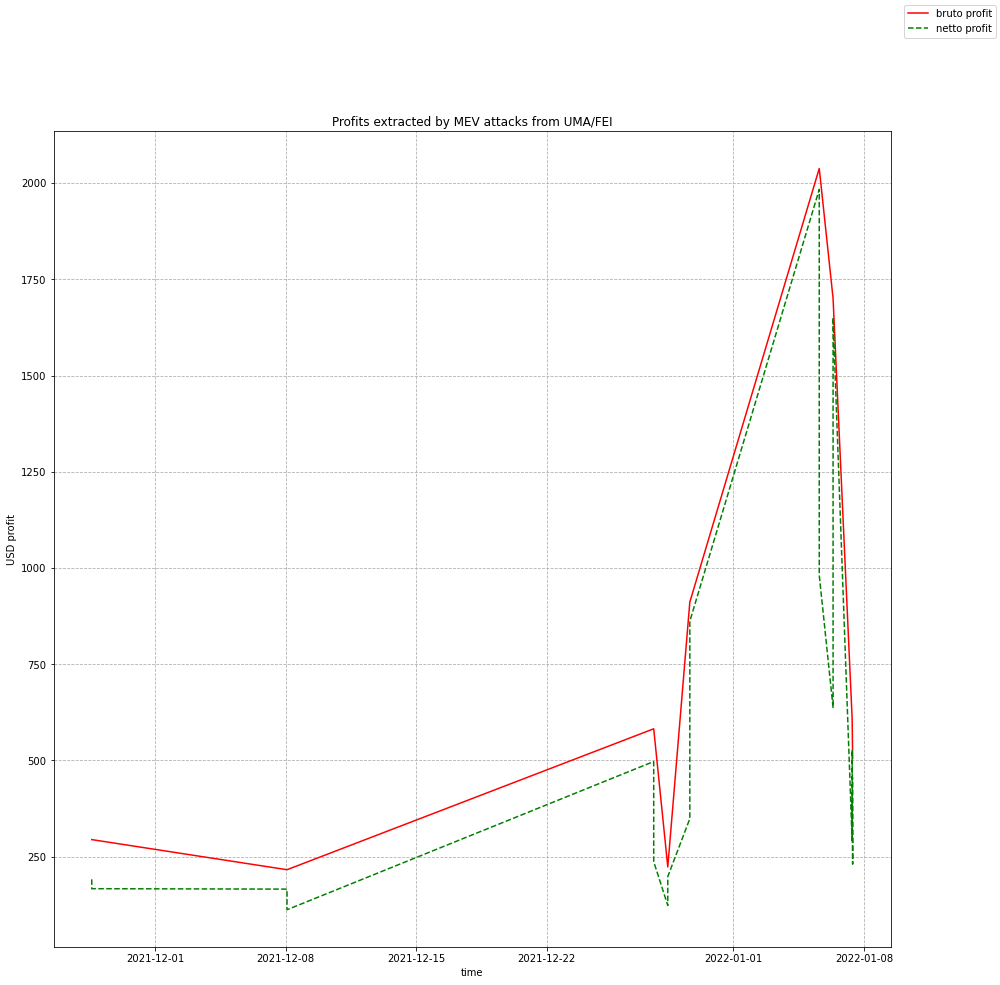

In [147]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(uma_fei_possible_mevs_df.timestamp, uma_fei_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(uma_fei_possible_mevs_df.timestamp, uma_fei_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from UMA/FEI')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [148]:
print("max bruto profit in USD = " +
      str(uma_fei_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 2037.96717704223


In [149]:
print("min bruto profit in USD = " +
      str(uma_fei_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 215.90907113527646


In [150]:
print("max netto profit in USD = " +
      str(uma_fei_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 1983.5180911235682


In [151]:
print("min netto profit in USD = " +
      str(uma_fei_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = 111.92656578912346


In [152]:
print("amount of zero bruto profit possible attacks = " +
      str(len(uma_fei_possible_mevs_df[uma_fei_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [153]:
print("amount of losses attacks = " +
      str(len(uma_fei_possible_mevs_df[uma_fei_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 0


In [154]:
uma_fei_possible_mevs_df[uma_fei_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,UMA_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_uma_to_fei_profit,bruto_total_profit,gas_costs_usd,netto_profit


## PERL/WETH

In [155]:
perl_weth_possible_mevs_df = uma_fei_sim.calculate_attack_profit_by_token(perl_weth_possible_mevs_df)
perl_weth_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,PERL_profit,WETH_profit
0,PERL,WETH,1320.000000,0.027346,5.980426,2020-11-08 05:51:41,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x65b27ba836e03ee4be0c375abc8d607b9a6f8f86742c...,17800000000,187394,1320.000000,0.027346,189.789465,0.007346
1,WETH,PERL,0.020000,1130.210535,4.373965,2020-11-08 05:51:41,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xd1c300000000b961df238700ef00600097000049,0xf907e4417060e1356f4a5ee5a640b74ef255a26bea08...,17799999999,599000,1130.210535,0.020000,189.789465,0.007346
2,PERL,WETH,2387.311015,0.298847,547.509240,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,1000000000,200000,2387.311015,0.298847,0.000000,0.070037
3,WETH,PERL,0.228810,2387.311015,419.196402,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,1000000000,200000,2387.311015,0.228810,0.000000,0.070037
4,PERL,WETH,5532.606634,0.148980,388.215979,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,0,2000000,5532.606634,0.148980,0.000000,0.024571
5,WETH,PERL,0.124409,5532.606634,324.187423,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,0,2000000,5532.606634,0.124409,0.000000,0.024571
6,WETH,PERL,0.039189,772.410414,86.271375,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,0,1000000,772.410414,0.039189,0.000000,0.002006
7,PERL,WETH,772.410414,0.041195,90.687639,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xdab19dfaaee0d0e9f99ca8e2cb589a4b8977a287fcc8...,0,1000000,772.410414,0.041195,0.000000,0.002006
8,PERL,WETH,2488.671428,0.113791,242.957584,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x49182bb311de766685588c176fa0f2efeeaea128a644...,488257417573,129534,2488.671428,0.113791,0.000000,0.027318
9,WETH,PERL,0.086473,2488.671428,184.630120,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x9c233b055dcd6322a65c8895bcc772df1c6e36d08865...,0,500000,2488.671428,0.086473,0.000000,0.027318


In [156]:
perl_price_df = perl_weth_sim.get_daily_token_price(first_to_second=True, token_name='PERL')
perl_price_df

,date,PERL_price
0,2020-08-20,0.000519
1,2020-08-21,0.000146
2,2020-09-13,0.000184
3,2020-09-26,0.000065
4,2020-09-29,0.000051
...,...,...
307,2022-02-02,0.000018
308,2022-02-03,0.000018
309,2022-02-04,0.000019
310,2022-02-06,0.000018


In [157]:
perl_weth_possible_mevs_df['date'] = perl_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
perl_price_df['date'] = perl_price_df['date'].dt.strftime("%Y-%m-%d")

perl_weth_possible_mevs_df = pd.merge(perl_weth_possible_mevs_df, weth_price_df, on='date', how='left')
perl_weth_possible_mevs_df = pd.merge(perl_weth_possible_mevs_df, perl_price_df, on='date', how='left')
perl_weth_possible_mevs_df = pd.merge(perl_weth_possible_mevs_df, sto_possible_mevs_df, on='txd', how='left')

perl_weth_possible_mevs_df['bruto_perl_to_weth_profit'] = perl_weth_possible_mevs_df['PERL_profit'] * perl_weth_possible_mevs_df['PERL_price']
perl_weth_possible_mevs_df['bruto_total_profit'] = ((perl_weth_possible_mevs_df['bruto_perl_to_weth_profit'] * perl_weth_possible_mevs_df['WETH_price']) +
                                                    (perl_weth_possible_mevs_df['WETH_profit'] * perl_weth_possible_mevs_df['WETH_price']))
perl_weth_possible_mevs_df.loc[perl_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = perl_weth_possible_mevs_df['tx_fee'].median()
perl_weth_possible_mevs_df.loc[perl_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = perl_weth_possible_mevs_df['tx_fee'].median()
perl_weth_possible_mevs_df['gas_costs_usd'] = (perl_weth_possible_mevs_df['tx_fee'] * perl_weth_possible_mevs_df['WETH_price'] *
                                      perl_weth_possible_mevs_df['gas_usage_by_tx'])
perl_weth_possible_mevs_df['netto_profit'] = perl_weth_possible_mevs_df['bruto_total_profit'] - perl_weth_possible_mevs_df['gas_costs_usd']
perl_weth_possible_mevs_df.dropna(inplace=True)
perl_weth_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,PERL_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_perl_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,PERL,WETH,1320.000000,0.027346,5.980426,2020-11-08 05:51:41,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x65b27ba836e03ee4be0c375abc8d607b9a6f8f86742c...,17800000000,...,0.000034,11214983.0,77.0,114590.0,454.74,1.780000e-08,0.006367,6.253974,0.930272,5.323702
1,WETH,PERL,0.020000,1130.210535,4.373965,2020-11-08 05:51:41,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xd1c300000000b961df238700ef00600097000049,0xf907e4417060e1356f4a5ee5a640b74ef255a26bea08...,17799999999,...,0.000034,11214983.0,80.0,213434.0,454.74,1.780000e-08,0.006367,6.253974,1.732714,4.521261
2,PERL,WETH,2387.311015,0.298847,547.509240,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,1000000000,...,0.000097,12141124.0,3.0,103352.0,1841.40,1.000000e-09,0.000000,128.531868,0.189671,128.342197
3,WETH,PERL,0.228810,2387.311015,419.196402,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,1000000000,...,0.000097,12141124.0,0.0,126727.0,1841.40,1.000000e-09,0.000000,128.531868,0.232569,128.299299
4,PERL,WETH,5532.606634,0.148980,388.215979,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,0,...,0.000023,12552368.0,2.0,76866.0,2706.52,4.210046e-08,0.000000,66.618935,8.773832,57.845102
5,WETH,PERL,0.124409,5532.606634,324.187423,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,0,...,0.000023,12552368.0,0.0,109491.0,2706.52,4.210046e-08,0.000000,66.618935,12.497797,54.121137
6,WETH,PERL,0.039189,772.410414,86.271375,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,0,...,0.000044,12662859.0,3.0,110550.0,2166.61,4.210046e-08,0.000000,4.358010,10.110811,-5.752801
7,PERL,WETH,772.410414,0.041195,90.687639,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xdab19dfaaee0d0e9f99ca8e2cb589a4b8977a287fcc8...,0,...,0.000044,12662859.0,5.0,79211.0,2166.61,4.210046e-08,0.000000,4.358010,7.244572,-2.886562
8,PERL,WETH,2488.671428,0.113791,242.957584,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x49182bb311de766685588c176fa0f2efeeaea128a644...,488257417573,...,0.000030,12752772.0,2.0,52267.0,2227.18,4.882574e-07,0.000000,60.803993,56.801157,4.002836
9,WETH,PERL,0.086473,2488.671428,184.630120,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x9c233b055dcd6322a65c8895bcc772df1c6e36d08865...,0,...,0.000030,12752772.0,0.0,68874.0,2227.18,4.210046e-08,0.000000,60.803993,6.453910,54.350083


In [158]:
print(len(perl_weth_possible_mevs_df))
perl_weth_possible_mevs_df

54


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,PERL_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_perl_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,PERL,WETH,1320.000000,0.027346,5.980426,2020-11-08 05:51:41,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x65b27ba836e03ee4be0c375abc8d607b9a6f8f86742c...,17800000000,...,0.000034,11214983.0,77.0,114590.0,454.74,1.780000e-08,0.006367,6.253974,0.930272,5.323702
1,WETH,PERL,0.020000,1130.210535,4.373965,2020-11-08 05:51:41,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xd1c300000000b961df238700ef00600097000049,0xf907e4417060e1356f4a5ee5a640b74ef255a26bea08...,17799999999,...,0.000034,11214983.0,80.0,213434.0,454.74,1.780000e-08,0.006367,6.253974,1.732714,4.521261
2,PERL,WETH,2387.311015,0.298847,547.509240,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,1000000000,...,0.000097,12141124.0,3.0,103352.0,1841.40,1.000000e-09,0.000000,128.531868,0.189671,128.342197
3,WETH,PERL,0.228810,2387.311015,419.196402,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,1000000000,...,0.000097,12141124.0,0.0,126727.0,1841.40,1.000000e-09,0.000000,128.531868,0.232569,128.299299
4,PERL,WETH,5532.606634,0.148980,388.215979,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,0,...,0.000023,12552368.0,2.0,76866.0,2706.52,4.210046e-08,0.000000,66.618935,8.773832,57.845102
5,WETH,PERL,0.124409,5532.606634,324.187423,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,0,...,0.000023,12552368.0,0.0,109491.0,2706.52,4.210046e-08,0.000000,66.618935,12.497797,54.121137
6,WETH,PERL,0.039189,772.410414,86.271375,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,0,...,0.000044,12662859.0,3.0,110550.0,2166.61,4.210046e-08,0.000000,4.358010,10.110811,-5.752801
7,PERL,WETH,772.410414,0.041195,90.687639,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xdab19dfaaee0d0e9f99ca8e2cb589a4b8977a287fcc8...,0,...,0.000044,12662859.0,5.0,79211.0,2166.61,4.210046e-08,0.000000,4.358010,7.244572,-2.886562
8,PERL,WETH,2488.671428,0.113791,242.957584,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x49182bb311de766685588c176fa0f2efeeaea128a644...,488257417573,...,0.000030,12752772.0,2.0,52267.0,2227.18,4.882574e-07,0.000000,60.803993,56.801157,4.002836
9,WETH,PERL,0.086473,2488.671428,184.630120,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x9c233b055dcd6322a65c8895bcc772df1c6e36d08865...,0,...,0.000030,12752772.0,0.0,68874.0,2227.18,4.210046e-08,0.000000,60.803993,6.453910,54.350083


In [159]:
perl_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [160]:
print(len(perl_weth_possible_mevs_df))
perl_weth_possible_mevs_df

54


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,PERL_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_perl_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,PERL,WETH,1320.000000,0.027346,5.980426,2020-11-08 05:51:41,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x65b27ba836e03ee4be0c375abc8d607b9a6f8f86742c...,17800000000,...,0.000034,11214983.0,77.0,114590.0,454.74,1.780000e-08,0.006367,6.253974,0.930272,5.323702
1,WETH,PERL,0.020000,1130.210535,4.373965,2020-11-08 05:51:41,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xd1c300000000b961df238700ef00600097000049,0xf907e4417060e1356f4a5ee5a640b74ef255a26bea08...,17799999999,...,0.000034,11214983.0,80.0,213434.0,454.74,1.780000e-08,0.006367,6.253974,1.732714,4.521261
2,PERL,WETH,2387.311015,0.298847,547.509240,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0x23c2723eeb5a6186ec39c9f34b279919e941f9fb53f4...,1000000000,...,0.000097,12141124.0,3.0,103352.0,1841.40,1.000000e-09,0.000000,128.531868,0.189671,128.342197
3,WETH,PERL,0.228810,2387.311015,419.196402,2021-03-30 14:20:15,0x6201b699d16cc005427d66599767e9d7e7fc12d9,0xf6da21e95d74767009accb145b96897ac3630bad,0x52613b563e64f3b6dd4f57f8a9b541e383717ca68e50...,1000000000,...,0.000097,12141124.0,0.0,126727.0,1841.40,1.000000e-09,0.000000,128.531868,0.232569,128.299299
4,PERL,WETH,5532.606634,0.148980,388.215979,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x230718cd1083dc56ab1a18c344c672d60de018c943db...,0,...,0.000023,12552368.0,2.0,76866.0,2706.52,4.210046e-08,0.000000,66.618935,8.773832,57.845102
5,WETH,PERL,0.124409,5532.606634,324.187423,2021-06-02 02:36:45,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0x0000000099cb7fc48a935bceb9f05bbae54e8987,0xad4e7af1f274bb163f8a1b0f6855acbde840ec1c96b3...,0,...,0.000023,12552368.0,0.0,109491.0,2706.52,4.210046e-08,0.000000,66.618935,12.497797,54.121137
6,WETH,PERL,0.039189,772.410414,86.271375,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,0,...,0.000044,12662859.0,3.0,110550.0,2166.61,4.210046e-08,0.000000,4.358010,10.110811,-5.752801
7,PERL,WETH,772.410414,0.041195,90.687639,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xdab19dfaaee0d0e9f99ca8e2cb589a4b8977a287fcc8...,0,...,0.000044,12662859.0,5.0,79211.0,2166.61,4.210046e-08,0.000000,4.358010,7.244572,-2.886562
8,PERL,WETH,2488.671428,0.113791,242.957584,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x49182bb311de766685588c176fa0f2efeeaea128a644...,488257417573,...,0.000030,12752772.0,2.0,52267.0,2227.18,4.882574e-07,0.000000,60.803993,56.801157,4.002836
9,WETH,PERL,0.086473,2488.671428,184.630120,2021-07-03 05:30:04,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x0000000000d1d773661e4b2102bbe07d4dcde777,0x9c233b055dcd6322a65c8895bcc772df1c6e36d08865...,0,...,0.000030,12752772.0,0.0,68874.0,2227.18,4.210046e-08,0.000000,60.803993,6.453910,54.350083


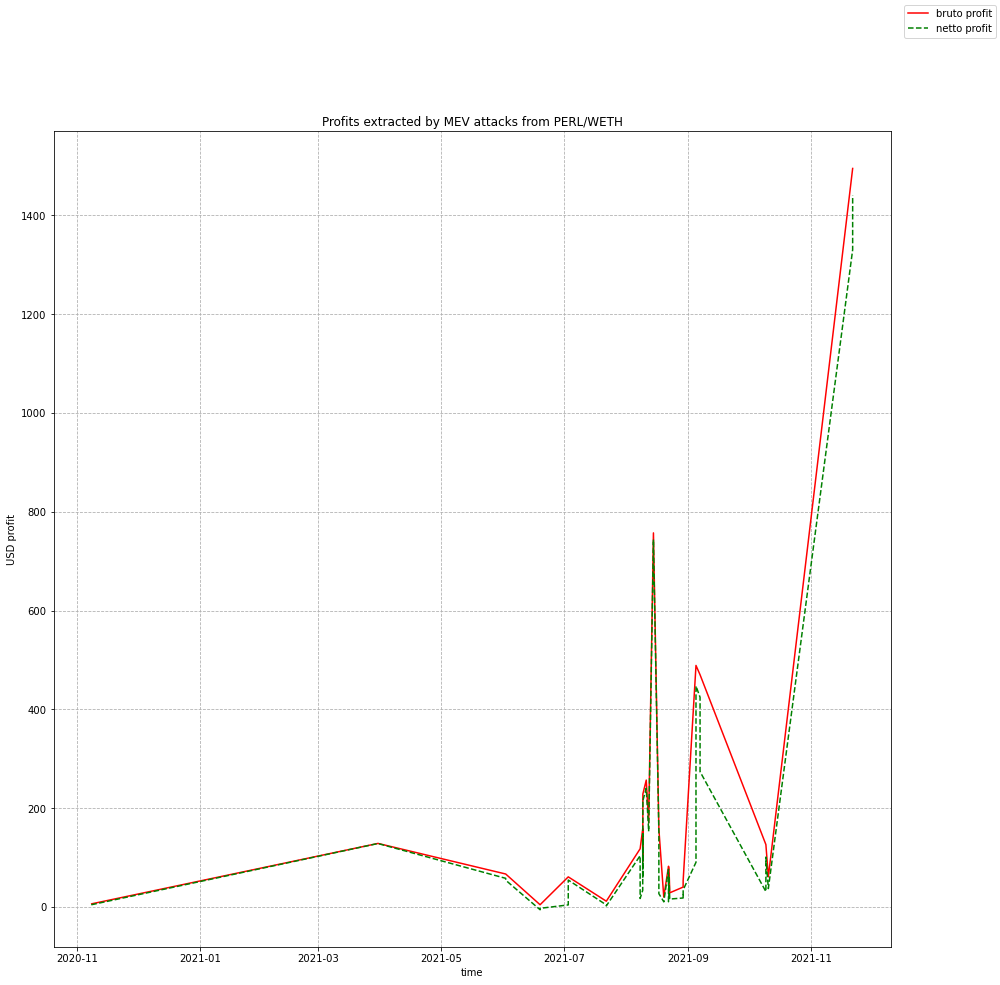

In [161]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(perl_weth_possible_mevs_df.timestamp, perl_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(perl_weth_possible_mevs_df.timestamp, perl_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from PERL/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [162]:
print("max bruto profit in USD = " +
      str(perl_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 1495.2025435119717


In [163]:
print("min bruto profit in USD = " +
      str(perl_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 4.358009665834503


In [164]:
print("max netto profit in USD = " +
      str(perl_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 1440.7580054627128


In [165]:
print("min netto profit in USD = " +
      str(perl_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -5.752801346132712


In [166]:
print("amount of zero bruto profit possible attacks = " +
      str(len(perl_weth_possible_mevs_df[perl_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [167]:
print("amount of losses attacks = " +
      str(len(perl_weth_possible_mevs_df[perl_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 2


In [168]:
perl_weth_possible_mevs_df[perl_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,PERL_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_perl_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
6,WETH,PERL,0.039189,772.410414,86.271375,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xab522b2083fc2dd28262d2410642d527fb0986076f2f...,0,...,0.000044,12662859.0,3.0,110550.0,2166.61,4.210046e-08,0.0,4.35801,10.110811,-5.752801
7,PERL,WETH,772.410414,0.041195,90.687639,2021-06-19 05:12:49,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0x36c1c59dcca0fd4a8c28551f7b2fe6421d53ce32,0xdab19dfaaee0d0e9f99ca8e2cb589a4b8977a287fcc8...,0,...,0.000044,12662859.0,5.0,79211.0,2166.61,4.210046e-08,0.0,4.35801,7.244572,-2.886562


## BPT/WETH

In [169]:
bpt_weth_possible_mevs_df = uma_fei_sim.calculate_attack_profit_by_token(bpt_weth_possible_mevs_df)
bpt_weth_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,BPT_profit,WETH_profit
0,BPT,WETH,0.030858,0.186596,44.610802,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x750590fe09e035cc69c7984c5e73991c02e9ce6ca1e1...,55999999999,250000,0.030858,0.186596,0.0,0.018596
1,WETH,BPT,0.168000,0.030858,40.142597,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xad014aceba2b508f418e0e141a901003ce64afce4733...,56000000001,250000,0.030858,0.168000,0.0,0.018596
2,WETH,BPT,0.343390,0.070682,80.114740,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x51f6b05a2cb282d3318704ddf643faf8319ad257fd67...,47500000000,600000,0.070682,0.343390,0.0,0.028744
3,BPT,WETH,0.070682,0.372134,86.626010,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x935e8a7687e01df393f1b720515c5652ce16a26a89dd...,30000000000,800000,0.070682,0.372134,0.0,0.028744
4,WETH,BPT,0.398000,0.083366,94.380749,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x2d217beb5d17290413a3c14d414239fea126a6bc1503...,48000000001,250000,0.083366,0.398000,0.0,0.027406
5,BPT,WETH,0.083366,0.425406,100.687267,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf5d30ce51ab0ff39023d250aa9e3342598e7349973dc...,47999999999,250000,0.083366,0.425406,0.0,0.027406
6,BPT,WETH,0.052618,0.277581,65.510129,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa1878919db8aba225183b2b1416186366c16262d29f5...,23999999999,250000,0.052618,0.277581,0.0,0.017581
7,WETH,BPT,0.260000,0.052618,61.360946,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xb5cdf9c2864302d3c2c1993a09c8f3fde295dd005cba...,24000000001,250000,0.052618,0.260000,0.0,0.017581
8,WETH,BPT,2.699892,0.531946,639.902909,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x1979f37b0ee226ecdb9acff2c5b7d1250fcf74421191...,60000000000,600000,0.531946,2.699892,0.0,0.215932
9,BPT,WETH,0.531946,2.915824,691.081073,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x52ea6767bd3216a75cae8c355f20a579d1d5ecd78333...,51000000000,800000,0.531946,2.915824,0.0,0.215932


In [170]:
bpt_price_df = bpt_weth_sim.get_daily_token_price(first_to_second=False, token_name='BPT')
bpt_price_df

,date,BPT_price
0,2020-05-31,1.365233e+02
1,2020-06-06,2.897691e+00
2,2020-06-07,4.357457e+00
3,2020-06-08,6.044606e+00
4,2020-06-09,5.002687e+00
...,...,...
142,2021-06-23,3.191873e-08
143,2021-08-20,2.985365e-08
144,2021-08-24,2.648970e-08
145,2021-09-20,3.173420e-08


In [171]:
bpt_weth_possible_mevs_df['date'] = bpt_weth_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
bpt_price_df['date'] = bpt_price_df['date'].dt.strftime("%Y-%m-%d")

bpt_weth_possible_mevs_df = pd.merge(bpt_weth_possible_mevs_df, weth_price_df, on='date', how='left')
bpt_weth_possible_mevs_df = pd.merge(bpt_weth_possible_mevs_df, bpt_price_df, on='date', how='left')
bpt_weth_possible_mevs_df = pd.merge(bpt_weth_possible_mevs_df, sto_possible_mevs_df, on='txd', how='left')

bpt_weth_possible_mevs_df['bruto_bpt_to_weth_profit'] = bpt_weth_possible_mevs_df['BPT_profit'] * bpt_weth_possible_mevs_df['BPT_price']
bpt_weth_possible_mevs_df['bruto_total_profit'] = ((bpt_weth_possible_mevs_df['bruto_bpt_to_weth_profit'] * bpt_weth_possible_mevs_df['WETH_price']) +
                                                    (bpt_weth_possible_mevs_df['WETH_profit'] * bpt_weth_possible_mevs_df['WETH_price']))
bpt_weth_possible_mevs_df.loc[bpt_weth_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = bpt_weth_possible_mevs_df['tx_fee'].median()
bpt_weth_possible_mevs_df.loc[bpt_weth_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = bpt_weth_possible_mevs_df['tx_fee'].median()
bpt_weth_possible_mevs_df['gas_costs_usd'] = (bpt_weth_possible_mevs_df['tx_fee'] * bpt_weth_possible_mevs_df['WETH_price'] *
                                      bpt_weth_possible_mevs_df['gas_usage_by_tx'])
bpt_weth_possible_mevs_df['netto_profit'] = bpt_weth_possible_mevs_df['bruto_total_profit'] - bpt_weth_possible_mevs_df['gas_costs_usd']
bpt_weth_possible_mevs_df.dropna(inplace=True)
bpt_weth_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,BPT_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_bpt_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,BPT,WETH,0.030858,0.186596,44.610802,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x750590fe09e035cc69c7984c5e73991c02e9ce6ca1e1...,55999999999,...,4.690119,10245241,120,103374,230.21,5.600000e-08,0.0,4.291813,1.336052,2.955761
1,WETH,BPT,0.168000,0.030858,40.142597,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xad014aceba2b508f418e0e141a901003ce64afce4733...,56000000001,...,4.690119,10245241,65,125262,230.21,5.600000e-08,0.0,4.291813,1.618942,2.672871
2,WETH,BPT,0.343390,0.070682,80.114740,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x51f6b05a2cb282d3318704ddf643faf8319ad257fd67...,47500000000,...,4.821698,10248437,8,99024,237.54,4.750000e-08,0.0,6.837202,1.118820,5.718383
3,BPT,WETH,0.070682,0.372134,86.626010,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x935e8a7687e01df393f1b720515c5652ce16a26a89dd...,30000000000,...,4.821698,10248437,296,87540,237.54,3.000000e-08,0.0,6.837202,0.624675,6.212528
4,WETH,BPT,0.398000,0.083366,94.380749,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x2d217beb5d17290413a3c14d414239fea126a6bc1503...,48000000001,...,4.821698,10251014,38,125274,237.54,4.800000e-08,0.0,6.518840,1.430303,5.088536
5,BPT,WETH,0.083366,0.425406,100.687267,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf5d30ce51ab0ff39023d250aa9e3342598e7349973dc...,47999999999,...,4.821698,10251014,61,103398,237.54,4.800000e-08,0.0,6.518840,1.180536,5.338303
6,BPT,WETH,0.052618,0.277581,65.510129,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa1878919db8aba225183b2b1416186366c16262d29f5...,23999999999,...,4.756590,10256065,108,103386,238.21,2.400000e-08,0.0,4.193796,0.591884,3.601913
7,WETH,BPT,0.260000,0.052618,61.360946,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xb5cdf9c2864302d3c2c1993a09c8f3fde295dd005cba...,24000000001,...,4.756590,10256065,93,125262,238.21,2.400000e-08,0.0,4.193796,0.717124,3.476673
8,WETH,BPT,2.699892,0.531946,639.902909,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x1979f37b0ee226ecdb9acff2c5b7d1250fcf74421191...,60000000000,...,4.756590,10257857,8,99030,238.21,6.000000e-08,0.0,51.508680,1.417364,50.091316
9,BPT,WETH,0.531946,2.915824,691.081073,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x52ea6767bd3216a75cae8c355f20a579d1d5ecd78333...,51000000000,...,4.756590,10257857,17,87540,238.21,5.100000e-08,0.0,51.508680,1.064977,50.443703


In [172]:
print(len(bpt_weth_possible_mevs_df))
bpt_weth_possible_mevs_df

46


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,BPT_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_bpt_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,BPT,WETH,0.030858,0.186596,44.610802,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x750590fe09e035cc69c7984c5e73991c02e9ce6ca1e1...,55999999999,...,4.690119,10245241,120,103374,230.21,5.600000e-08,0.0,4.291813,1.336052,2.955761
1,WETH,BPT,0.168000,0.030858,40.142597,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xad014aceba2b508f418e0e141a901003ce64afce4733...,56000000001,...,4.690119,10245241,65,125262,230.21,5.600000e-08,0.0,4.291813,1.618942,2.672871
2,WETH,BPT,0.343390,0.070682,80.114740,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x51f6b05a2cb282d3318704ddf643faf8319ad257fd67...,47500000000,...,4.821698,10248437,8,99024,237.54,4.750000e-08,0.0,6.837202,1.118820,5.718383
3,BPT,WETH,0.070682,0.372134,86.626010,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x935e8a7687e01df393f1b720515c5652ce16a26a89dd...,30000000000,...,4.821698,10248437,296,87540,237.54,3.000000e-08,0.0,6.837202,0.624675,6.212528
4,WETH,BPT,0.398000,0.083366,94.380749,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x2d217beb5d17290413a3c14d414239fea126a6bc1503...,48000000001,...,4.821698,10251014,38,125274,237.54,4.800000e-08,0.0,6.518840,1.430303,5.088536
5,BPT,WETH,0.083366,0.425406,100.687267,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf5d30ce51ab0ff39023d250aa9e3342598e7349973dc...,47999999999,...,4.821698,10251014,61,103398,237.54,4.800000e-08,0.0,6.518840,1.180536,5.338303
6,BPT,WETH,0.052618,0.277581,65.510129,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa1878919db8aba225183b2b1416186366c16262d29f5...,23999999999,...,4.756590,10256065,108,103386,238.21,2.400000e-08,0.0,4.193796,0.591884,3.601913
7,WETH,BPT,0.260000,0.052618,61.360946,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xb5cdf9c2864302d3c2c1993a09c8f3fde295dd005cba...,24000000001,...,4.756590,10256065,93,125262,238.21,2.400000e-08,0.0,4.193796,0.717124,3.476673
8,WETH,BPT,2.699892,0.531946,639.902909,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x1979f37b0ee226ecdb9acff2c5b7d1250fcf74421191...,60000000000,...,4.756590,10257857,8,99030,238.21,6.000000e-08,0.0,51.508680,1.417364,50.091316
9,BPT,WETH,0.531946,2.915824,691.081073,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x52ea6767bd3216a75cae8c355f20a579d1d5ecd78333...,51000000000,...,4.756590,10257857,17,87540,238.21,5.100000e-08,0.0,51.508680,1.064977,50.443703


In [173]:
bpt_weth_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [174]:
print(len(bpt_weth_possible_mevs_df))
bpt_weth_possible_mevs_df

46


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,BPT_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_bpt_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,BPT,WETH,0.030858,0.186596,44.610802,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x750590fe09e035cc69c7984c5e73991c02e9ce6ca1e1...,55999999999,...,4.690119,10245241,120,103374,230.21,5.600000e-08,0.0,4.291813,1.336052,2.955761
1,WETH,BPT,0.168000,0.030858,40.142597,2020-06-11 15:41:28,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xad014aceba2b508f418e0e141a901003ce64afce4733...,56000000001,...,4.690119,10245241,65,125262,230.21,5.600000e-08,0.0,4.291813,1.618942,2.672871
2,WETH,BPT,0.343390,0.070682,80.114740,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x51f6b05a2cb282d3318704ddf643faf8319ad257fd67...,47500000000,...,4.821698,10248437,8,99024,237.54,4.750000e-08,0.0,6.837202,1.118820,5.718383
3,BPT,WETH,0.070682,0.372134,86.626010,2020-06-12 03:27:40,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x935e8a7687e01df393f1b720515c5652ce16a26a89dd...,30000000000,...,4.821698,10248437,296,87540,237.54,3.000000e-08,0.0,6.837202,0.624675,6.212528
4,WETH,BPT,0.398000,0.083366,94.380749,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x2d217beb5d17290413a3c14d414239fea126a6bc1503...,48000000001,...,4.821698,10251014,38,125274,237.54,4.800000e-08,0.0,6.518840,1.430303,5.088536
5,BPT,WETH,0.083366,0.425406,100.687267,2020-06-12 13:00:42,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf5d30ce51ab0ff39023d250aa9e3342598e7349973dc...,47999999999,...,4.821698,10251014,61,103398,237.54,4.800000e-08,0.0,6.518840,1.180536,5.338303
6,BPT,WETH,0.052618,0.277581,65.510129,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa1878919db8aba225183b2b1416186366c16262d29f5...,23999999999,...,4.756590,10256065,108,103386,238.21,2.400000e-08,0.0,4.193796,0.591884,3.601913
7,WETH,BPT,0.260000,0.052618,61.360946,2020-06-13 07:47:30,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xb5cdf9c2864302d3c2c1993a09c8f3fde295dd005cba...,24000000001,...,4.756590,10256065,93,125262,238.21,2.400000e-08,0.0,4.193796,0.717124,3.476673
8,WETH,BPT,2.699892,0.531946,639.902909,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x1979f37b0ee226ecdb9acff2c5b7d1250fcf74421191...,60000000000,...,4.756590,10257857,8,99030,238.21,6.000000e-08,0.0,51.508680,1.417364,50.091316
9,BPT,WETH,0.531946,2.915824,691.081073,2020-06-13 14:23:54,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x6297ec22c56ce2432275b3c83567f2dfb42efa6a,0x52ea6767bd3216a75cae8c355f20a579d1d5ecd78333...,51000000000,...,4.756590,10257857,17,87540,238.21,5.100000e-08,0.0,51.508680,1.064977,50.443703


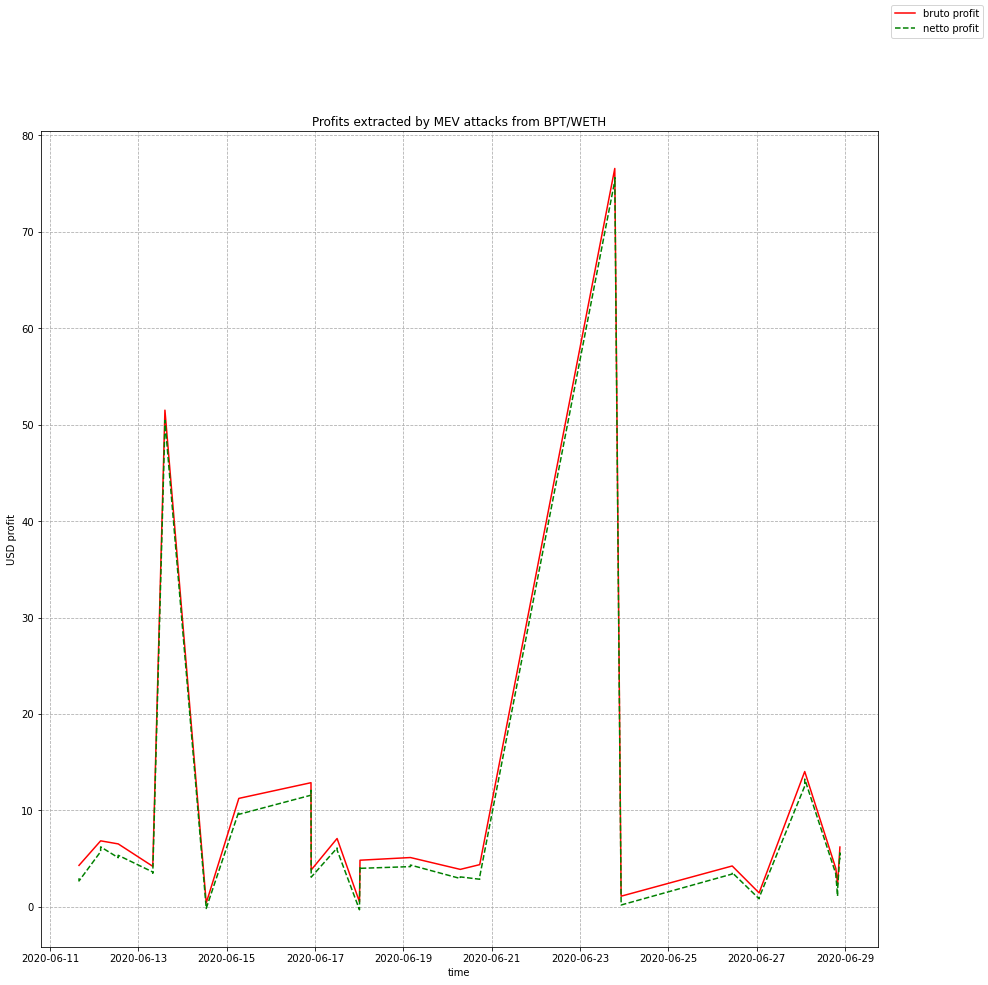

In [175]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(bpt_weth_possible_mevs_df.timestamp, bpt_weth_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(bpt_weth_possible_mevs_df.timestamp, bpt_weth_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from BPT/WETH')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [176]:
print("max bruto profit in USD = " +
      str(bpt_weth_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 76.57980402125123


In [177]:
print("min bruto profit in USD = " +
      str(bpt_weth_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 0.3960460151005452


In [178]:
print("max netto profit in USD = " +
      str(bpt_weth_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 75.6437933478047


In [179]:
print("min netto profit in USD = " +
      str(bpt_weth_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -0.30938285962553125


In [180]:
print("amount of zero bruto profit possible attacks = " +
      str(len(bpt_weth_possible_mevs_df[bpt_weth_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [181]:
print("amount of losses attacks = " +
      str(len(bpt_weth_possible_mevs_df[bpt_weth_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 4


In [182]:
bpt_weth_possible_mevs_df[bpt_weth_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,BPT_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_bpt_to_weth_profit,bruto_total_profit,gas_costs_usd,netto_profit
10,BPT,WETH,0.059850,0.284291,66.959084,2020-06-14 12:51:17,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x94f759b26b4e00bd242da7de7b42a8893c7ac1bfcc11...,24100001235,...,4.653294,10263960,115,103386,231.61,2.410000e-08,0.0,0.396046,0.577366,-0.181320
11,WETH,BPT,0.286000,0.059850,67.361634,2020-06-14 12:51:17,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0xccec846ef43f036c21d06124d11a299470c189967f7e...,19000001236,...,4.653294,10263960,114,125262,231.61,1.900000e-08,0.0,0.396046,0.551500,-0.155454
20,WETH,BPT,0.364000,0.070196,84.111115,2020-06-18 00:08:17,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xaaa2e80ab7d7b3c216af30fc8165e7823e74cc62,0x7ed57af5427b333edb134884537d6e144625763368a3...,28000000001,...,5.166740,10286357,29,125262,231.24,2.800000e-08,0.0,0.505198,0.814581,-0.309383
21,BPT,WETH,0.070196,0.361825,83.608475,2020-06-18 00:08:17,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xdbb3c09852fe3c9cdc44f6eedbaa92ab2bdb67df2819...,27999999999,...,5.166740,10286357,34,103374,231.24,2.800000e-08,0.0,0.505198,0.672243,-0.167045


## uSTONKS_APR_21/USDC

In [183]:
ustonks_usdc_possible_mevs_df = uma_fei_sim.calculate_attack_profit_by_token(ustonks_usdc_possible_mevs_df)
ustonks_usdc_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,USDC_profit,uSTONKS_APR21_profit
0,uSTONKS_APR21,USDC,12.418602,3238.609900,3239.153055,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0x0138244ca43c16383778eb8d3ed287bd7f7981b2630d...,141000000000,200000,3238.609900,12.418602,19.470100,1.000000e-06
1,USDC,uSTONKS_APR21,3258.080000,12.418603,3258.626421,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xb8ca8b208255acb474ce1efeaf91112f19fa99dc6ebc...,141000000001,200000,3258.080000,12.418603,19.470100,1.000000e-06
2,USDC,uSTONKS_APR21,11250.279557,41.163949,11254.760469,2021-03-19 18:00:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xbc9fff1fcc7972a9b0089b7542f1a5b34e26b35d,0x0626f61fa80782d1ac91b3f175390b191ea3092a41d1...,161000000000,137196,11250.279557,41.163949,708.707898,2.836051e+00
3,uSTONKS_APR21,USDC,44.000000,11958.987455,11963.750640,2021-03-19 18:00:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xbc9fff1fcc7972a9b0089b7542f1a5b34e26b35d,0xda675fb35a4aefb0db165f54a92f7d65e6baa83a156b...,159843750000,137501,11958.987455,44.000000,708.707898,2.836051e+00


In [184]:
ustonks_price_df = ustonks_usdc_sim.get_daily_token_price(first_to_second=False, token_name='uSTONKS_APR_21')
ustonks_price_df

,date,uSTONKS_APR_21_price
0,2021-03-03,0.004673
1,2021-03-04,0.004673
2,2021-03-08,0.004673
3,2021-03-09,0.004027
4,2021-03-10,0.003747
...,...,...
63,2021-06-05,0.004262
64,2021-06-06,0.004265
65,2021-06-09,0.004265
66,2021-06-16,0.006481


In [185]:
ustonks_usdc_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,USDC_profit,uSTONKS_APR21_profit
0,uSTONKS_APR21,USDC,12.418602,3238.609900,3239.153055,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0x0138244ca43c16383778eb8d3ed287bd7f7981b2630d...,141000000000,200000,3238.609900,12.418602,19.470100,1.000000e-06
1,USDC,uSTONKS_APR21,3258.080000,12.418603,3258.626421,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xb8ca8b208255acb474ce1efeaf91112f19fa99dc6ebc...,141000000001,200000,3258.080000,12.418603,19.470100,1.000000e-06
2,USDC,uSTONKS_APR21,11250.279557,41.163949,11254.760469,2021-03-19 18:00:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xbc9fff1fcc7972a9b0089b7542f1a5b34e26b35d,0x0626f61fa80782d1ac91b3f175390b191ea3092a41d1...,161000000000,137196,11250.279557,41.163949,708.707898,2.836051e+00
3,uSTONKS_APR21,USDC,44.000000,11958.987455,11963.750640,2021-03-19 18:00:02,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xbc9fff1fcc7972a9b0089b7542f1a5b34e26b35d,0xda675fb35a4aefb0db165f54a92f7d65e6baa83a156b...,159843750000,137501,11958.987455,44.000000,708.707898,2.836051e+00


In [186]:
ustonks_usdc_possible_mevs_df['date'] = ustonks_usdc_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
ustonks_price_df['date'] = ustonks_price_df['date'].dt.strftime("%Y-%m-%d")

ustonks_usdc_possible_mevs_df = pd.merge(ustonks_usdc_possible_mevs_df, weth_price_df, on='date', how='left')
ustonks_usdc_possible_mevs_df = pd.merge(ustonks_usdc_possible_mevs_df, ustonks_price_df, on='date', how='left')
ustonks_usdc_possible_mevs_df = pd.merge(ustonks_usdc_possible_mevs_df, sto_possible_mevs_df, on='txd', how='left')

ustonks_usdc_possible_mevs_df['bruto_ustonks_to_usdc_profit'] = ustonks_usdc_possible_mevs_df['uSTONKS_APR21_profit'] * ustonks_usdc_possible_mevs_df['uSTONKS_APR_21_price']
ustonks_usdc_possible_mevs_df['bruto_total_profit'] = ustonks_usdc_possible_mevs_df['bruto_ustonks_to_usdc_profit'] + ustonks_usdc_possible_mevs_df['USDC_profit']
ustonks_usdc_possible_mevs_df.loc[ustonks_usdc_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = ustonks_usdc_possible_mevs_df['tx_fee'].median()
ustonks_usdc_possible_mevs_df.loc[ustonks_usdc_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = ustonks_usdc_possible_mevs_df['tx_fee'].median()
ustonks_usdc_possible_mevs_df['gas_costs_usd'] = (ustonks_usdc_possible_mevs_df['tx_fee'] * ustonks_usdc_possible_mevs_df['WETH_price'] *
                                      ustonks_usdc_possible_mevs_df['gas_usage_by_tx'])
ustonks_usdc_possible_mevs_df['netto_profit'] = ustonks_usdc_possible_mevs_df['bruto_total_profit'] - ustonks_usdc_possible_mevs_df['gas_costs_usd']
ustonks_usdc_possible_mevs_df.dropna(inplace=True)
ustonks_usdc_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,uSTONKS_APR_21_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_ustonks_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,uSTONKS_APR21,USDC,12.418602,3238.609900,3239.153055,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0x0138244ca43c16383778eb8d3ed287bd7f7981b2630d...,141000000000,...,0.00355,12039755.0,73.0,99251.0,1848.69,1.410000e-07,3.550071e-09,19.4701,25.909627,-6.439527
1,USDC,uSTONKS_APR21,3258.080000,12.418603,3258.626421,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xb8ca8b208255acb474ce1efeaf91112f19fa99dc6ebc...,141000000001,...,0.00355,12039755.0,72.0,129540.0,1848.69,1.410000e-07,3.550071e-09,19.4701,33.816618,-14.346518


In [187]:
print(len(ustonks_usdc_possible_mevs_df))
ustonks_usdc_possible_mevs_df

2


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,uSTONKS_APR_21_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_ustonks_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,uSTONKS_APR21,USDC,12.418602,3238.609900,3239.153055,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0x0138244ca43c16383778eb8d3ed287bd7f7981b2630d...,141000000000,...,0.00355,12039755.0,73.0,99251.0,1848.69,1.410000e-07,3.550071e-09,19.4701,25.909627,-6.439527
1,USDC,uSTONKS_APR21,3258.080000,12.418603,3258.626421,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xb8ca8b208255acb474ce1efeaf91112f19fa99dc6ebc...,141000000001,...,0.00355,12039755.0,72.0,129540.0,1848.69,1.410000e-07,3.550071e-09,19.4701,33.816618,-14.346518


In [188]:
ustonks_usdc_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [189]:
print(len(ustonks_usdc_possible_mevs_df))
ustonks_usdc_possible_mevs_df

2


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,uSTONKS_APR_21_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_ustonks_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,uSTONKS_APR21,USDC,12.418602,3238.609900,3239.153055,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0x0138244ca43c16383778eb8d3ed287bd7f7981b2630d...,141000000000,...,0.00355,12039755.0,73.0,99251.0,1848.69,1.410000e-07,3.550071e-09,19.4701,25.909627,-6.439527
1,USDC,uSTONKS_APR21,3258.080000,12.418603,3258.626421,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xb8ca8b208255acb474ce1efeaf91112f19fa99dc6ebc...,141000000001,...,0.00355,12039755.0,72.0,129540.0,1848.69,1.410000e-07,3.550071e-09,19.4701,33.816618,-14.346518


In [190]:
print("max bruto profit in USD = " +
      str(ustonks_usdc_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 19.470100003550073


In [191]:
print("min bruto profit in USD = " +
      str(ustonks_usdc_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 19.470100003550073


In [192]:
print("max netto profit in USD = " +
      str(ustonks_usdc_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = -6.439527494335248


In [193]:
print("min netto profit in USD = " +
      str(ustonks_usdc_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -14.34651792549915


In [194]:
print("amount of zero bruto profit possible attacks = " +
      str(len(ustonks_usdc_possible_mevs_df[ustonks_usdc_possible_mevs_df['bruto_total_profit'] == 0])))

amount of zero bruto profit possible attacks = 0


In [195]:
print("amount of losses attacks = " +
      str(len(ustonks_usdc_possible_mevs_df[ustonks_usdc_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 2


In [196]:
ustonks_usdc_possible_mevs_df[ustonks_usdc_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,uSTONKS_APR_21_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_ustonks_to_usdc_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,uSTONKS_APR21,USDC,12.418602,3238.609900,3239.153055,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0x0138244ca43c16383778eb8d3ed287bd7f7981b2630d...,141000000000,...,0.00355,12039755.0,73.0,99251.0,1848.69,1.410000e-07,3.550071e-09,19.4701,25.909627,-6.439527
1,USDC,uSTONKS_APR21,3258.080000,12.418603,3258.626421,2021-03-14 23:36:36,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xbfd54d7fb7059d2505069dec2222a81ead7f831a,0xb8ca8b208255acb474ce1efeaf91112f19fa99dc6ebc...,141000000001,...,0.00355,12039755.0,72.0,129540.0,1848.69,1.410000e-07,3.550071e-09,19.4701,33.816618,-14.346518


# STO pools with companies shares connections (mAAPL/UST, mAMZN/UST, mBABA/UST)

## General steps

In [197]:
# Mirrored shares tokens
mamzn_ust_sim = Simulation(experiment_id = 41, x_name = 'mAMZN', y_name = 'UST', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
mbaba_ust_sim = Simulation(experiment_id = 42, x_name = 'mBABA', y_name = 'UST', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")
maapl_ust_sim = Simulation(experiment_id = 43, x_name = 'mAAPL', y_name = 'UST', window_size = 24,
                           base_dir = fr"{os.getcwd()}\data\real_transactions\experiment_")

In [198]:
print("mAMZN/UST results of searching small difference attacks:")
mamzn_ust_suspicious_filtered_swaps_df, mamzn_ust_possible_mevs_df = mamzn_ust_sim.extract_suspicious_and_filtered_swaps_dfs()

print("mBABA/UST results of searching small difference attacks:")
mbaba_ust_suspicious_filtered_swaps_df, mbaba_ust_possible_mevs_df = mbaba_ust_sim.extract_suspicious_and_filtered_swaps_dfs()

print("mAAPL/UST results of searching small difference attacks:")
maapl_ust_suspicious_filtered_swaps_df, maapl_ust_possible_mevs_df = maapl_ust_sim.extract_suspicious_and_filtered_swaps_dfs()

mAMZN/UST results of searching small difference attacks:
initial len = 1802, filtered len = 1784
txds = 18
out values = 9.0
mBABA/UST results of searching small difference attacks:
initial len = 2035, filtered len = 2029
txds = 6
out values = 3.0
mAAPL/UST results of searching small difference attacks:
initial len = 2397, filtered len = 2377
txds = 20
out values = 10.0


In [199]:
mamzn_ust_swaps_df = mamzn_ust_sim.get_original_swaps_df()
mbaba_ust_swaps_df = mbaba_ust_sim.get_original_swaps_df()
maapl_ust_swaps_df = maapl_ust_sim.get_original_swaps_df()

In [200]:
sto_companies_pools_list = [mamzn_ust_swaps_df, mbaba_ust_swaps_df, maapl_ust_swaps_df]
sto_companies_pools_swaps_df = pd.concat(sto_companies_pools_list)

In [201]:
sto_possible_mevs_df = pd.read_pickle('sto_pools_possible_mevs_with_gas_df.pkl')
sto_possible_mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee
0,0x59d069b69d005f3969744d938187f59bddf8d2a54f52...,13696609,0,"243,161","4,100.30",0.000000103937172786
1,0x9b8a7dae739b6d98dfb54bd5d4e6fc8e3f77df39fa7d...,13696609,2,"152,244","4,100.30",0.000000205007997099
2,0x03b0a9db011593c5bb2df916fbd84d744706ee41d3fa...,13762028,2,"213,971","4,439.98",0.000000053209292896
3,0x1923615091ec7c5c233ec86bfd5eb91faa4f88740c48...,13762028,4,"152,176","4,439.98",0.000000154360551061
4,0x48b7209d8d2edd8f92938a61790bf6313a0f9fbf7257...,13888598,5,"214,175","4,037.87",0.000000098266011875
...,...,...,...,...,...,...
165,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,13067645,4,"123,126","3,226.59",0.00000003476130489
166,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,13086996,2,"133,773","3,172.57",0.000000047930125437
167,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,13086996,0,"159,961","3,172.57",0.000000047930125437
168,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,13250059,3,"180,198","3,435.76",0.00000004160346301


In [202]:
sto_possible_mevs_df = pd.merge(sto_possible_mevs_df, sto_companies_pools_swaps_df, on='txd', how='left')

In [203]:
sto_possible_mevs_df

,txd,block,block_position,gas_usage_by_tx,ether_price,tx_fee,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,gas_price,gas_used
0,0x59d069b69d005f3969744d938187f59bddf8d2a54f52...,13696609,0,"243,161","4,100.30",0.000000103937172786,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,0x9b8a7dae739b6d98dfb54bd5d4e6fc8e3f77df39fa7d...,13696609,2,"152,244","4,100.30",0.000000205007997099,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,0x03b0a9db011593c5bb2df916fbd84d744706ee41d3fa...,13762028,2,"213,971","4,439.98",0.000000053209292896,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,0x1923615091ec7c5c233ec86bfd5eb91faa4f88740c48...,13762028,4,"152,176","4,439.98",0.000000154360551061,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,0x48b7209d8d2edd8f92938a61790bf6313a0f9fbf7257...,13888598,5,"214,175","4,037.87",0.000000098266011875,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,13067645,4,"123,126","3,226.59",0.00000003476130489,mBABA,UST,173.356194,28453.022476,14359.231227,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,34761304890,2000000
172,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,13086996,2,"133,773","3,172.57",0.000000047930125437,mBABA,UST,172.461373,29687.488516,14887.187169,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,47930125437,400000
173,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,13086996,0,"159,961","3,172.57",0.000000047930125437,UST,mBABA,29396.347291,172.461373,14741.190518,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,47930125437,400000
174,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,13250059,3,"180,198","3,435.76",0.00000004160346301,UST,mBABA,26173.926024,161.265070,13079.090073,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,41603463010,270297


In [204]:
sto_possible_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              176 non-null    object        
 1   block            176 non-null    object        
 2   block_position   176 non-null    object        
 3   gas_usage_by_tx  176 non-null    object        
 4   ether_price      176 non-null    object        
 5   tx_fee           176 non-null    object        
 6   token_in         46 non-null     object        
 7   token_out        46 non-null     object        
 8   amount_in        46 non-null     float64       
 9   amount_out       46 non-null     float64       
 10  amount_usd       46 non-null     float64       
 11  timestamp        46 non-null     datetime64[ns]
 12  sender           46 non-null     object        
 13  to               46 non-null     object        
 14  gas_price        46 non-null     object   

In [205]:
sto_possible_mevs_df['block'] = pd.to_numeric(sto_possible_mevs_df['block'])
sto_possible_mevs_df['block_position'] = pd.to_numeric(sto_possible_mevs_df['block_position'])
sto_possible_mevs_df['gas_usage_by_tx'] = pd.to_numeric(sto_possible_mevs_df['gas_usage_by_tx'].str.replace(',', ''))
sto_possible_mevs_df['ether_price'] = sto_possible_mevs_df['ether_price'].str.replace('$', '')
sto_possible_mevs_df['ether_price'] = pd.to_numeric(sto_possible_mevs_df['ether_price'].str.replace(',', ''))
sto_possible_mevs_df['tx_fee'] = pd.to_numeric(sto_possible_mevs_df['tx_fee'].str.replace('wei', ''))
sto_possible_mevs_df['gas_price'] = pd.to_numeric(sto_possible_mevs_df['gas_price']) / 1000000000000000000
sto_possible_mevs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 175
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   txd              176 non-null    object        
 1   block            176 non-null    int64         
 2   block_position   176 non-null    int64         
 3   gas_usage_by_tx  176 non-null    int64         
 4   ether_price      176 non-null    float64       
 5   tx_fee           176 non-null    float64       
 6   token_in         46 non-null     object        
 7   token_out        46 non-null     object        
 8   amount_in        46 non-null     float64       
 9   amount_out       46 non-null     float64       
 10  amount_usd       46 non-null     float64       
 11  timestamp        46 non-null     datetime64[ns]
 12  sender           46 non-null     object        
 13  to               46 non-null     object        
 14  gas_price        46 non-null     float64  

<ipython-input-205-1d1c99206639>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sto_possible_mevs_df['ether_price'] = sto_possible_mevs_df['ether_price'].str.replace('$', '')


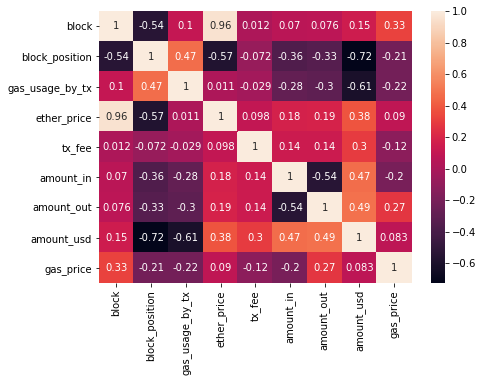

In [206]:
plt.figure(figsize=(7, 5))
sns.heatmap(sto_possible_mevs_df.corr(), annot=True)
plt.show()

In [207]:
sto_possible_mevs_df.sort_values(by=['timestamp', 'block_position'], inplace=True)

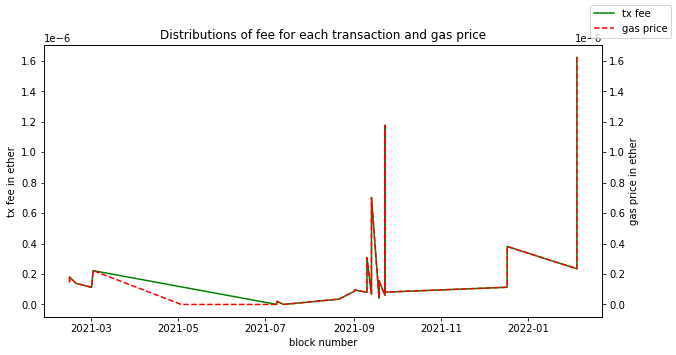

In [208]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['timestamp'], sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['tx_fee'], color='g', label='tx fee')
ax2.plot(sto_possible_mevs_df['timestamp'], sto_possible_mevs_df['gas_price'], color='r', linestyle='--', label='gas price')
ax.set_xlabel('block number')
ax.set_ylabel('tx fee in ether')
ax2.set_ylabel('gas price in ether')
ax.set_title('Distributions of fee for each transaction and gas price')
fig.legend()
plt.show()

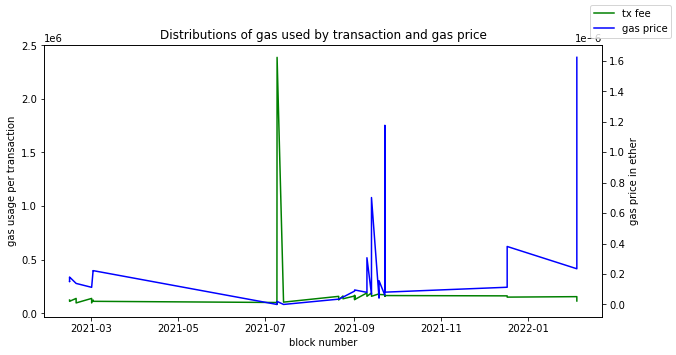

In [209]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['timestamp'], sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['gas_usage_by_tx'], color='g', label='tx fee')
ax2.plot(sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['timestamp'], sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['gas_price'], color='b', label='gas price')
ax.set_xlabel('block number')
ax.set_ylabel('gas usage per transaction')
ax2.set_ylabel('gas price in ether')
ax.set_title('Distributions of gas used by transaction and gas price')
fig.legend()
plt.show()

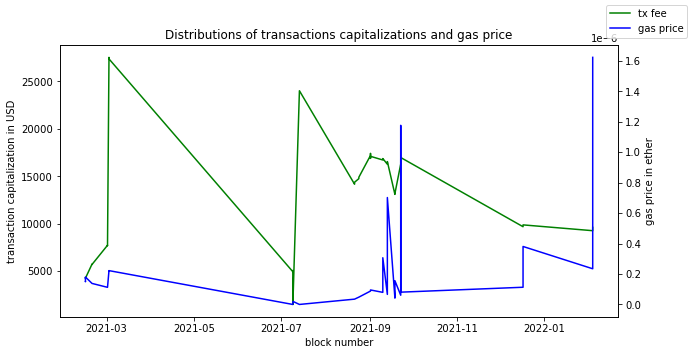

In [210]:
fig, ax = plt.subplots(figsize=(10, 5))
ax2 = ax.twinx()
ax.plot(sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['timestamp'], sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['amount_usd'], color='g', label='tx fee')
ax2.plot(sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['timestamp'], sto_possible_mevs_df[sto_possible_mevs_df['tx_fee'] < 1]['gas_price'], color='b', label='gas price')
ax.set_xlabel('block number')
ax.set_ylabel('transaction capitalization in USD')
ax2.set_ylabel('gas price in ether')
ax.set_title('Distributions of transactions capitalizations and gas price')
fig.legend()
plt.show()

In [211]:
sto_possible_mevs_df = sto_possible_mevs_df[['txd', 'block', 'block_position', 'gas_usage_by_tx', 'ether_price', 'tx_fee']]

## mAAPL/UST

In [212]:
maapl_ust_possible_mevs_df = uma_fei_sim.calculate_attack_profit_by_token(maapl_ust_possible_mevs_df)
maapl_ust_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,UST_profit,mAAPL_profit
0,mAAPL,UST,85.655721,11305.197774,5686.127782,2021-02-18 18:52:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x93e10afc3016faa25aa908a43053030cc88e8a9c5977...,137999999999,500000,11305.197774,85.655721,67.968070,0.000000
1,UST,mAAPL,11373.165844,85.655721,5720.313397,2021-02-18 18:52:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xd57a6430296b72dd57b0d8fdf2a073dafd6b7515a1cf...,138000000001,500000,11373.165844,85.655721,67.968070,0.000000
2,UST,mAAPL,15329.309246,122.665374,7712.146998,2021-03-01 15:07:51,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x8a42504bbb99491962bc7a00b64c602cb812027cfbae...,112360000000,500000,15329.309246,122.665374,91.610049,0.000000
3,mAAPL,UST,122.665374,15237.699198,7666.058152,2021-03-01 15:07:51,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x9e84e09c76272a6831c8c370737031f6b05c28a0427b...,112349990000,500000,15237.699198,122.665374,91.610049,0.000000
4,mAAPL,UST,317.740680,43951.751824,22297.415453,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x41f41ff7f1a99ee0c00035cc6c00ec4830d536eb68fc...,1,6000000,43951.751824,317.740680,742.297572,0.000000
5,UST,mAAPL,43209.454253,317.740680,21920.836212,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x74f7cea83af95572f0cf7cd5474d1901078ba3e718e5...,1,500000,43209.454253,317.740680,742.297572,0.000000
6,UST,mAAPL,9851.773372,68.335406,4929.917309,2021-07-09 04:15:21,0x00000000032962b51589768828ad878876299e14,0x00000000032962b51589768828ad878876299e14,0x6faf1e7d5a1eeca653252e0888a387beffdaada0bf4c...,0,2000000,9851.773372,68.335406,254.133009,0.000000
7,mAAPL,UST,68.335406,10105.906380,5057.087785,2021-07-09 04:15:21,0x00000000032962b51589768828ad878876299e14,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xaa1a07f5b28654286236f7e0f46671362386618f7e14...,0,2000000,10105.906380,68.335406,254.133009,0.000000
8,mAAPL,UST,24.599683,3519.377300,1761.872510,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,3875081,3519.377300,24.599683,7.938301,0.092205
9,UST,mAAPL,3527.315601,24.507479,1765.846586,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x50b9b72bfd352327f76ae59f8878653545376e59,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,3875081,3527.315601,24.507479,7.938301,0.092205


In [213]:
maapl_price_df = maapl_ust_sim.get_daily_token_price(first_to_second=True, token_name='mAAPL')
maapl_price_df

,date,mAAPL_price
0,2020-12-03,124.443578
1,2020-12-04,124.527912
2,2020-12-05,126.515202
3,2020-12-06,133.484036
4,2020-12-07,123.211560
...,...,...
392,2022-01-30,168.396062
393,2022-01-31,171.342292
394,2022-02-01,172.909964
395,2022-02-03,172.475637


In [214]:
maapl_ust_possible_mevs_df['date'] = maapl_ust_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
maapl_price_df['date'] = maapl_price_df['date'].dt.strftime("%Y-%m-%d")

maapl_ust_possible_mevs_df = pd.merge(maapl_ust_possible_mevs_df, weth_price_df, on='date', how='left')
maapl_ust_possible_mevs_df = pd.merge(maapl_ust_possible_mevs_df, maapl_price_df, on='date', how='left')
maapl_ust_possible_mevs_df = pd.merge(maapl_ust_possible_mevs_df, sto_possible_mevs_df, on='txd', how='left')

maapl_ust_possible_mevs_df['bruto_maapl_to_ust_profit'] = maapl_ust_possible_mevs_df['mAAPL_profit'] * maapl_ust_possible_mevs_df['mAAPL_price']
maapl_ust_possible_mevs_df['bruto_total_profit'] = maapl_ust_possible_mevs_df['bruto_maapl_to_ust_profit'] + maapl_ust_possible_mevs_df['UST_profit']
maapl_ust_possible_mevs_df.loc[maapl_ust_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = maapl_ust_possible_mevs_df['tx_fee'].median()
maapl_ust_possible_mevs_df.loc[maapl_ust_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = maapl_ust_possible_mevs_df['tx_fee'].median()
maapl_ust_possible_mevs_df['gas_costs_usd'] = (maapl_ust_possible_mevs_df['tx_fee'] * maapl_ust_possible_mevs_df['WETH_price'] *
                                      maapl_ust_possible_mevs_df['gas_usage_by_tx'])
maapl_ust_possible_mevs_df['netto_profit'] = maapl_ust_possible_mevs_df['bruto_total_profit'] - maapl_ust_possible_mevs_df['gas_costs_usd']
maapl_ust_possible_mevs_df.dropna(inplace=True)
maapl_ust_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,mAAPL_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_maapl_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,mAAPL,UST,85.655721,11305.197774,5686.127782,2021-02-18 18:52:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x93e10afc3016faa25aa908a43053030cc88e8a9c5977...,137999999999,...,130.365932,11882553,172,95304,1939.61,1.380000e-07,0.000000,67.968070,25.415599,42.552471
1,UST,mAAPL,11373.165844,85.655721,5720.313397,2021-02-18 18:52:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xd57a6430296b72dd57b0d8fdf2a073dafd6b7515a1cf...,138000000001,...,130.365932,11882553,156,137250,1939.61,1.380000e-07,0.000000,67.968070,36.601727,31.366343
2,UST,mAAPL,15329.309246,122.665374,7712.146998,2021-03-01 15:07:51,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x8a42504bbb99491962bc7a00b64c602cb812027cfbae...,112360000000,...,129.481520,11953058,100,137238,1571.49,1.123600e-07,0.000000,91.610049,24.165819,67.444230
3,mAAPL,UST,122.665374,15237.699198,7666.058152,2021-03-01 15:07:51,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x9e84e09c76272a6831c8c370737031f6b05c28a0427b...,112349990000,...,129.481520,11953058,104,95304,1571.49,1.123500e-07,0.000000,91.610049,16.780294,74.829755
4,mAAPL,UST,317.740680,43951.751824,22297.415453,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x41f41ff7f1a99ee0c00035cc6c00ec4830d536eb68fc...,1,...,134.733120,12359575,2,89876,3432.21,2.000000e-08,0.000000,742.297572,6.155653,736.141918
5,UST,mAAPL,43209.454253,317.740680,21920.836212,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x74f7cea83af95572f0cf7cd5474d1901078ba3e718e5...,1,...,134.733120,12359575,0,114568,3432.21,2.000000e-08,0.000000,742.297572,7.846821,734.450750
6,UST,mAAPL,9851.773372,68.335406,4929.917309,2021-07-09 04:15:21,0x00000000032962b51589768828ad878876299e14,0x00000000032962b51589768828ad878876299e14,0x6faf1e7d5a1eeca653252e0888a387beffdaada0bf4c...,0,...,144.225824,12790967,2,99238,2145.67,2.000000e-08,0.000000,254.133009,4.272642,249.860366
7,mAAPL,UST,68.335406,10105.906380,5057.087785,2021-07-09 04:15:21,0x00000000032962b51589768828ad878876299e14,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xaa1a07f5b28654286236f7e0f46671362386618f7e14...,0,...,144.225824,12790967,4,81054,2145.67,2.000000e-08,0.000000,254.133009,3.489739,250.643269
8,mAAPL,UST,24.599683,3519.377300,1761.872510,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,144.225824,12791721,163,2385754,2145.67,2.000000e-08,13.298294,21.236595,102.717445,-81.480851
9,mAAPL,UST,24.599683,3519.377300,1761.872510,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,144.225824,12791721,163,2385754,2145.67,2.000000e-08,13.298294,21.236595,102.717445,-81.480851


In [215]:
print(len(maapl_ust_possible_mevs_df))
maapl_ust_possible_mevs_df

34


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,mAAPL_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_maapl_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,mAAPL,UST,85.655721,11305.197774,5686.127782,2021-02-18 18:52:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x93e10afc3016faa25aa908a43053030cc88e8a9c5977...,137999999999,...,130.365932,11882553,172,95304,1939.61,1.380000e-07,0.000000,67.968070,25.415599,42.552471
1,UST,mAAPL,11373.165844,85.655721,5720.313397,2021-02-18 18:52:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xd57a6430296b72dd57b0d8fdf2a073dafd6b7515a1cf...,138000000001,...,130.365932,11882553,156,137250,1939.61,1.380000e-07,0.000000,67.968070,36.601727,31.366343
2,UST,mAAPL,15329.309246,122.665374,7712.146998,2021-03-01 15:07:51,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x8a42504bbb99491962bc7a00b64c602cb812027cfbae...,112360000000,...,129.481520,11953058,100,137238,1571.49,1.123600e-07,0.000000,91.610049,24.165819,67.444230
3,mAAPL,UST,122.665374,15237.699198,7666.058152,2021-03-01 15:07:51,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x9e84e09c76272a6831c8c370737031f6b05c28a0427b...,112349990000,...,129.481520,11953058,104,95304,1571.49,1.123500e-07,0.000000,91.610049,16.780294,74.829755
4,mAAPL,UST,317.740680,43951.751824,22297.415453,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x41f41ff7f1a99ee0c00035cc6c00ec4830d536eb68fc...,1,...,134.733120,12359575,2,89876,3432.21,2.000000e-08,0.000000,742.297572,6.155653,736.141918
5,UST,mAAPL,43209.454253,317.740680,21920.836212,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x74f7cea83af95572f0cf7cd5474d1901078ba3e718e5...,1,...,134.733120,12359575,0,114568,3432.21,2.000000e-08,0.000000,742.297572,7.846821,734.450750
6,UST,mAAPL,9851.773372,68.335406,4929.917309,2021-07-09 04:15:21,0x00000000032962b51589768828ad878876299e14,0x00000000032962b51589768828ad878876299e14,0x6faf1e7d5a1eeca653252e0888a387beffdaada0bf4c...,0,...,144.225824,12790967,2,99238,2145.67,2.000000e-08,0.000000,254.133009,4.272642,249.860366
7,mAAPL,UST,68.335406,10105.906380,5057.087785,2021-07-09 04:15:21,0x00000000032962b51589768828ad878876299e14,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xaa1a07f5b28654286236f7e0f46671362386618f7e14...,0,...,144.225824,12790967,4,81054,2145.67,2.000000e-08,0.000000,254.133009,3.489739,250.643269
8,mAAPL,UST,24.599683,3519.377300,1761.872510,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,144.225824,12791721,163,2385754,2145.67,2.000000e-08,13.298294,21.236595,102.717445,-81.480851
9,mAAPL,UST,24.599683,3519.377300,1761.872510,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,144.225824,12791721,163,2385754,2145.67,2.000000e-08,13.298294,21.236595,102.717445,-81.480851


In [216]:
maapl_ust_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [217]:
print(len(maapl_ust_possible_mevs_df))
maapl_ust_possible_mevs_df

20


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,mAAPL_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_maapl_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,mAAPL,UST,85.655721,11305.197774,5686.127782,2021-02-18 18:52:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x93e10afc3016faa25aa908a43053030cc88e8a9c5977...,137999999999,...,130.365932,11882553,172,95304,1939.61,1.380000e-07,0.000000,67.968070,25.415599,42.552471
1,UST,mAAPL,11373.165844,85.655721,5720.313397,2021-02-18 18:52:57,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xd57a6430296b72dd57b0d8fdf2a073dafd6b7515a1cf...,138000000001,...,130.365932,11882553,156,137250,1939.61,1.380000e-07,0.000000,67.968070,36.601727,31.366343
2,UST,mAAPL,15329.309246,122.665374,7712.146998,2021-03-01 15:07:51,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x8a42504bbb99491962bc7a00b64c602cb812027cfbae...,112360000000,...,129.481520,11953058,100,137238,1571.49,1.123600e-07,0.000000,91.610049,24.165819,67.444230
3,mAAPL,UST,122.665374,15237.699198,7666.058152,2021-03-01 15:07:51,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x9e84e09c76272a6831c8c370737031f6b05c28a0427b...,112349990000,...,129.481520,11953058,104,95304,1571.49,1.123500e-07,0.000000,91.610049,16.780294,74.829755
4,mAAPL,UST,317.740680,43951.751824,22297.415453,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x41f41ff7f1a99ee0c00035cc6c00ec4830d536eb68fc...,1,...,134.733120,12359575,2,89876,3432.21,2.000000e-08,0.000000,742.297572,6.155653,736.141918
5,UST,mAAPL,43209.454253,317.740680,21920.836212,2021-05-03 06:24:21,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x1be0f4b9bbf312fdc9dfedff50aedce6f5035d51,0x74f7cea83af95572f0cf7cd5474d1901078ba3e718e5...,1,...,134.733120,12359575,0,114568,3432.21,2.000000e-08,0.000000,742.297572,7.846821,734.450750
6,UST,mAAPL,9851.773372,68.335406,4929.917309,2021-07-09 04:15:21,0x00000000032962b51589768828ad878876299e14,0x00000000032962b51589768828ad878876299e14,0x6faf1e7d5a1eeca653252e0888a387beffdaada0bf4c...,0,...,144.225824,12790967,2,99238,2145.67,2.000000e-08,0.000000,254.133009,4.272642,249.860366
7,mAAPL,UST,68.335406,10105.906380,5057.087785,2021-07-09 04:15:21,0x00000000032962b51589768828ad878876299e14,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xaa1a07f5b28654286236f7e0f46671362386618f7e14...,0,...,144.225824,12790967,4,81054,2145.67,2.000000e-08,0.000000,254.133009,3.489739,250.643269
8,mAAPL,UST,24.599683,3519.377300,1761.872510,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,144.225824,12791721,163,2385754,2145.67,2.000000e-08,13.298294,21.236595,102.717445,-81.480851
16,UST,mAAPL,3527.315601,24.507479,1765.846586,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x50b9b72bfd352327f76ae59f8878653545376e59,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,144.225824,12791721,163,2385754,2145.67,2.000000e-08,13.298294,21.236595,102.717445,-81.480851


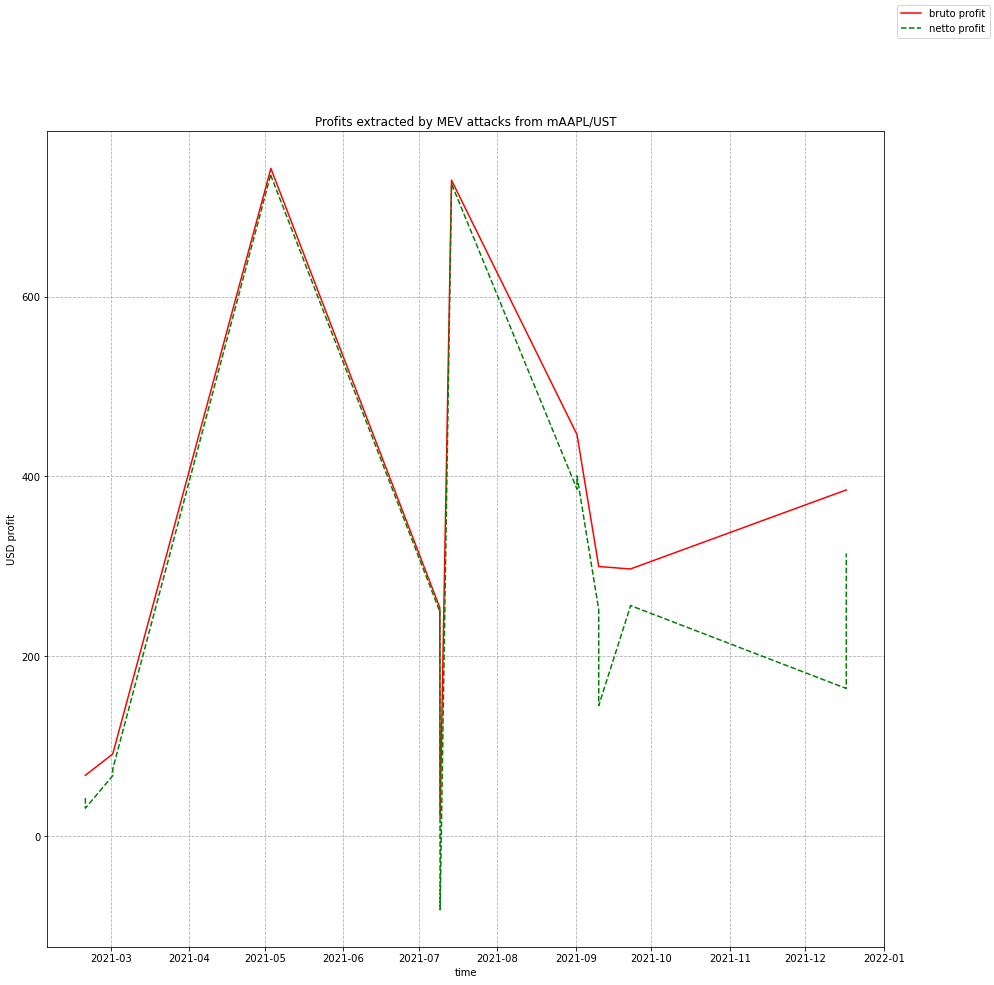

In [218]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(maapl_ust_possible_mevs_df.timestamp, maapl_ust_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(maapl_ust_possible_mevs_df.timestamp, maapl_ust_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from mAAPL/UST')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [219]:
print("max bruto profit in USD = " +
      str(maapl_ust_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 742.2975715855646


In [220]:
print("min bruto profit in USD = " +
      str(maapl_ust_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 21.236594691584358


In [221]:
print("max netto profit in USD = " +
      str(maapl_ust_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 736.1419182338908


In [222]:
print("min netto profit in USD = " +
      str(maapl_ust_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = -81.48085076180905


In [223]:
print("amount of losses attacks = " +
      str(len(maapl_ust_possible_mevs_df[maapl_ust_possible_mevs_df['netto_profit'] < 0])))

amount of losses attacks = 2


In [224]:
maapl_ust_possible_mevs_df[maapl_ust_possible_mevs_df['netto_profit'] < 0]

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,mAAPL_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_maapl_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
8,mAAPL,UST,24.599683,3519.377300,1761.872510,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,144.225824,12791721,163,2385754,2145.67,2.000000e-08,13.298294,21.236595,102.717445,-81.480851
16,UST,mAAPL,3527.315601,24.507479,1765.846586,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x50b9b72bfd352327f76ae59f8878653545376e59,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,144.225824,12791721,163,2385754,2145.67,2.000000e-08,13.298294,21.236595,102.717445,-81.480851


## mBABA/UST

In [225]:
mbaba_ust_possible_mevs_df = uma_fei_sim.calculate_attack_profit_by_token(mbaba_ust_possible_mevs_df)
mbaba_ust_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,UST_profit,mBABA_profit
0,UST,mBABA,28047.180471,173.356194,14154.417162,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x393d93916c86d743a90b6500526dddec2d898836b5e0...,34761304890,2000000,28047.180471,173.356194,405.842005,0.0
1,mBABA,UST,173.356194,28453.022476,14359.231227,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,34761304890,2000000,28453.022476,173.356194,405.842005,0.0
2,mBABA,UST,172.461373,29687.488516,14887.187169,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,47930125437,400000,29687.488516,172.461373,291.141225,0.0
3,UST,mBABA,29396.347291,172.461373,14741.190518,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,47930125437,400000,29396.347291,172.461373,291.141225,0.0
4,UST,mBABA,26173.926024,161.265070,13079.090073,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,41603463010,270297,26173.926024,161.265070,176.817001,0.0
5,mBABA,UST,161.265070,26350.743025,13167.445388,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5914bc565212d746a8a9b92bd0b313f00739ef9873cf...,155596321770,260985,26350.743025,161.265070,176.817001,0.0


In [226]:
mbaba_price_df = mbaba_ust_sim.get_daily_token_price(first_to_second=False, token_name='mBABA')
mbaba_price_df

,date,mBABA_price
0,2020-12-03,265.930790
1,2020-12-04,268.928156
2,2020-12-05,279.389109
3,2020-12-06,284.440574
4,2020-12-07,265.203701
...,...,...
378,2022-01-31,128.378525
379,2022-02-01,132.217792
380,2022-02-02,128.533221
381,2022-02-03,128.540856


In [227]:
mbaba_ust_possible_mevs_df['date'] = mbaba_ust_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
mbaba_price_df['date'] = mbaba_price_df['date'].dt.strftime("%Y-%m-%d")

mbaba_ust_possible_mevs_df = pd.merge(mbaba_ust_possible_mevs_df, weth_price_df, on='date', how='left')
mbaba_ust_possible_mevs_df = pd.merge(mbaba_ust_possible_mevs_df, mbaba_price_df, on='date', how='left')
mbaba_ust_possible_mevs_df = pd.merge(mbaba_ust_possible_mevs_df, sto_possible_mevs_df, on='txd', how='left')

mbaba_ust_possible_mevs_df['bruto_mbaba_to_ust_profit'] = mbaba_ust_possible_mevs_df['mBABA_profit'] * mbaba_ust_possible_mevs_df['mBABA_price']
mbaba_ust_possible_mevs_df['bruto_total_profit'] = mbaba_ust_possible_mevs_df['bruto_mbaba_to_ust_profit'] + mbaba_ust_possible_mevs_df['UST_profit']
mbaba_ust_possible_mevs_df.loc[mbaba_ust_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = mbaba_ust_possible_mevs_df['tx_fee'].median()
mbaba_ust_possible_mevs_df.loc[mbaba_ust_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = mbaba_ust_possible_mevs_df['tx_fee'].median()
mbaba_ust_possible_mevs_df['gas_costs_usd'] = (mbaba_ust_possible_mevs_df['tx_fee'] * mbaba_ust_possible_mevs_df['WETH_price'] *
                                      mbaba_ust_possible_mevs_df['gas_usage_by_tx'])
mbaba_ust_possible_mevs_df['netto_profit'] = mbaba_ust_possible_mevs_df['bruto_total_profit'] - mbaba_ust_possible_mevs_df['gas_costs_usd']
mbaba_ust_possible_mevs_df.dropna(inplace=True)
mbaba_ust_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,mBABA_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mbaba_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,UST,mBABA,28047.180471,173.356194,14154.417162,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x393d93916c86d743a90b6500526dddec2d898836b5e0...,34761304890,...,165.398465,13067645,2,156517,3226.59,3.476130e-08,0.0,405.842005,17.596777,388.245228
1,mBABA,UST,173.356194,28453.022476,14359.231227,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,34761304890,...,165.398465,13067645,4,123126,3226.59,3.476130e-08,0.0,405.842005,13.842718,391.999287
2,mBABA,UST,172.461373,29687.488516,14887.187169,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,47930125437,...,174.423672,13086996,2,133773,3172.57,4.793013e-08,0.0,291.141225,20.348441,270.792783
3,UST,mBABA,29396.347291,172.461373,14741.190518,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,47930125437,...,174.423672,13086996,0,159961,3172.57,4.793013e-08,0.0,291.141225,24.331943,266.809282
4,UST,mBABA,26173.926024,161.265070,13079.090073,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,41603463010,...,163.534055,13250059,3,180198,3435.76,4.160346e-08,0.0,176.817001,25.710529,151.106471
5,mBABA,UST,161.265070,26350.743025,13167.445388,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5914bc565212d746a8a9b92bd0b313f00739ef9873cf...,155596321770,...,163.534055,13250059,5,173990,3435.76,1.555963e-07,0.0,176.817001,92.844287,83.972714


In [228]:
print(len(mbaba_ust_possible_mevs_df))
mbaba_ust_possible_mevs_df

6


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,mBABA_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mbaba_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,UST,mBABA,28047.180471,173.356194,14154.417162,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x393d93916c86d743a90b6500526dddec2d898836b5e0...,34761304890,...,165.398465,13067645,2,156517,3226.59,3.476130e-08,0.0,405.842005,17.596777,388.245228
1,mBABA,UST,173.356194,28453.022476,14359.231227,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,34761304890,...,165.398465,13067645,4,123126,3226.59,3.476130e-08,0.0,405.842005,13.842718,391.999287
2,mBABA,UST,172.461373,29687.488516,14887.187169,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,47930125437,...,174.423672,13086996,2,133773,3172.57,4.793013e-08,0.0,291.141225,20.348441,270.792783
3,UST,mBABA,29396.347291,172.461373,14741.190518,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,47930125437,...,174.423672,13086996,0,159961,3172.57,4.793013e-08,0.0,291.141225,24.331943,266.809282
4,UST,mBABA,26173.926024,161.265070,13079.090073,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,41603463010,...,163.534055,13250059,3,180198,3435.76,4.160346e-08,0.0,176.817001,25.710529,151.106471
5,mBABA,UST,161.265070,26350.743025,13167.445388,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5914bc565212d746a8a9b92bd0b313f00739ef9873cf...,155596321770,...,163.534055,13250059,5,173990,3435.76,1.555963e-07,0.0,176.817001,92.844287,83.972714


In [229]:
mbaba_ust_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [230]:
print(len(mbaba_ust_possible_mevs_df))
mbaba_ust_possible_mevs_df

6


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,mBABA_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mbaba_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,UST,mBABA,28047.180471,173.356194,14154.417162,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x000000000035b5e5ad9019092c665357240f594e,0x393d93916c86d743a90b6500526dddec2d898836b5e0...,34761304890,...,165.398465,13067645,2,156517,3226.59,3.476130e-08,0.0,405.842005,17.596777,388.245228
1,mBABA,UST,173.356194,28453.022476,14359.231227,2021-08-21 08:48:44,0x000000000035b5e5ad9019092c665357240f594e,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0xd47fbdbbfaf30ea607c7ef83c3da8ce39457909e4dac...,34761304890,...,165.398465,13067645,4,123126,3226.59,3.476130e-08,0.0,405.842005,13.842718,391.999287
2,mBABA,UST,172.461373,29687.488516,14887.187169,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x3fd5d614c6fa5176bcc30f734eafd486ce042143cbea...,47930125437,...,174.423672,13086996,2,133773,3172.57,4.793013e-08,0.0,291.141225,20.348441,270.792783
3,UST,mBABA,29396.347291,172.461373,14741.190518,2021-08-24 08:38:34,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0xd29a3f30fc769bf642e0e89b903bb10c36642f8c7fa5...,47930125437,...,174.423672,13086996,0,159961,3172.57,4.793013e-08,0.0,291.141225,24.331943,266.809282
4,UST,mBABA,26173.926024,161.265070,13079.090073,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x114bfeeb481692518959ccd62933b3d890a38f97506e...,41603463010,...,163.534055,13250059,3,180198,3435.76,4.160346e-08,0.0,176.817001,25.710529,151.106471
5,mBABA,UST,161.265070,26350.743025,13167.445388,2021-09-18 13:59:02,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5ede0fedbfe6e1b1fe8b1f9228478bb8f23c6e0e,0x5914bc565212d746a8a9b92bd0b313f00739ef9873cf...,155596321770,...,163.534055,13250059,5,173990,3435.76,1.555963e-07,0.0,176.817001,92.844287,83.972714


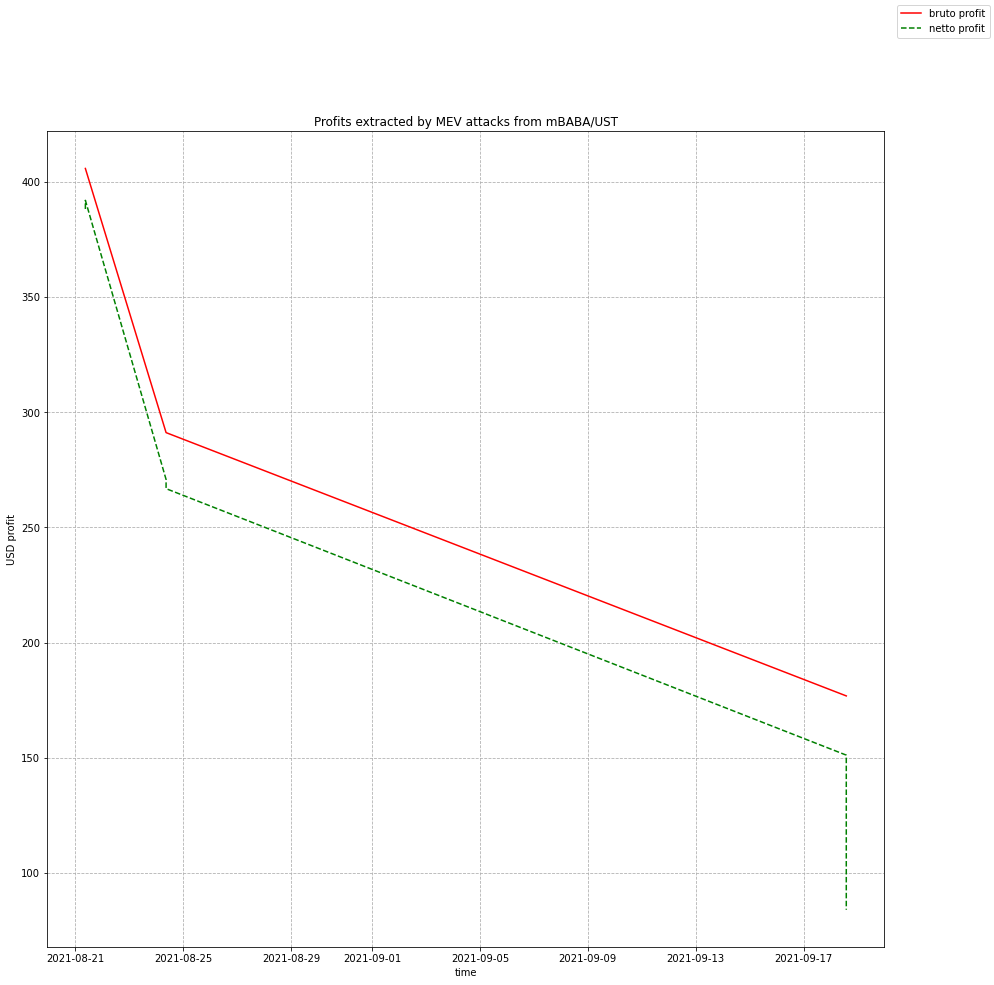

In [231]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(mbaba_ust_possible_mevs_df.timestamp, mbaba_ust_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(mbaba_ust_possible_mevs_df.timestamp, mbaba_ust_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from mBABA/UST')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [232]:
print("max bruto profit in USD = " +
      str(mbaba_ust_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 405.84200532795876


In [233]:
print("min bruto profit in USD = " +
      str(mbaba_ust_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 176.8170007156623


In [234]:
print("max netto profit in USD = " +
      str(mbaba_ust_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 391.9992868524991


In [235]:
print("min netto profit in USD = " +
      str(mbaba_ust_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = 83.97271387164844


## mAMZN/UST

In [236]:
mamzn_ust_possible_mevs_df = uma_fei_sim.calculate_attack_profit_by_token(mamzn_ust_possible_mevs_df)
mamzn_ust_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,gas_used,first_token_value,second_token_value,UST_profit,mAMZN_profit
0,UST,mAMZN,8438.012387,2.192789,4264.608021,2021-02-14 04:46:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xc2b1936da8a32feed7df74512f522f2cdb81cf24f106...,149000000001,500000,8438.012387,2.192789,50.425412,0.000000
1,mAMZN,UST,2.192789,8387.586976,4239.122799,2021-02-14 04:46:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xe785187cea4627a99c14848570815a69e83a476f0118...,148999999999,500000,8387.586976,2.192789,50.425412,0.000000
2,UST,mAMZN,8438.012387,2.192756,4265.397460,2021-02-14 04:46:46,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x88396c651c35d4222df0c89c86b35a6e6ceb928f8b8f...,180000000001,500000,8438.012387,2.192756,50.425413,0.000000
3,mAMZN,UST,2.192756,8387.586974,4239.955474,2021-02-14 04:46:46,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xc92aefc41b22cd185a9480b83d14d77de35ecd8e8b4c...,179999999999,500000,8387.586974,2.192756,50.425413,0.000000
4,mAMZN,UST,16.172002,57873.119209,29298.373629,2021-02-22 05:41:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x1ef3af5c18435fd4f7a9dcd9f52b065a852066aa7e62...,133000001458,500000,57873.119209,16.172002,8632.119209,2.520062
5,UST,mAMZN,49241.000000,13.651940,24928.347316,2021-02-22 05:41:54,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xe7dad7c46bb8d37db2e966b4400c72c6e1e3e697,0xe9b82981c972de8da175b4bae15b230fa5b3d78acf2f...,133000001459,144788,49241.000000,13.651940,8632.119209,2.520062
6,UST,mAMZN,54784.591759,17.365897,27532.753360,2021-03-02 15:53:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x37874accb124afeb2d3263cd38a74a594b6c20abdd61...,222010000000,500000,54784.591759,17.365897,325.710485,0.000000
7,mAMZN,UST,17.365897,54458.881274,27369.063057,2021-03-02 15:53:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x734c67721bf5b6d0df8282ed8a44b81ccc74d9912390...,221999990000,500000,54458.881274,17.365897,325.710485,0.000000
8,mAMZN,UST,0.798954,2982.299213,1493.000196,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,3875081,2982.299213,0.798954,42.869546,0.016200
9,UST,mAMZN,2939.429667,0.782754,1471.538822,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x50b9b72bfd352327f76ae59f8878653545376e59,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,3875081,2939.429667,0.782754,42.869546,0.016200


In [237]:
mamzn_price_df = mamzn_ust_sim.get_daily_token_price(first_to_second=False, token_name='mAMZN')
mamzn_price_df

,date,mAMZN_price
0,2020-12-03,3549.377513
1,2020-12-04,3130.586675
2,2020-12-05,3284.050467
3,2020-12-06,3463.577851
4,2020-12-07,3196.654937
...,...,...
367,2022-01-31,3015.344916
368,2022-02-01,3085.680850
369,2022-02-02,3101.415353
370,2022-02-03,3168.028902


In [238]:
mamzn_ust_possible_mevs_df['date'] = mamzn_ust_possible_mevs_df['timestamp'].dt.strftime("%Y-%m-%d")
mamzn_price_df['date'] = mamzn_price_df['date'].dt.strftime("%Y-%m-%d")

mamzn_ust_possible_mevs_df = pd.merge(mamzn_ust_possible_mevs_df, weth_price_df, on='date', how='left')
mamzn_ust_possible_mevs_df = pd.merge(mamzn_ust_possible_mevs_df, mamzn_price_df, on='date', how='left')
mamzn_ust_possible_mevs_df = pd.merge(mamzn_ust_possible_mevs_df, sto_possible_mevs_df, on='txd', how='left')

mamzn_ust_possible_mevs_df['bruto_mamzn_to_ust_profit'] = mamzn_ust_possible_mevs_df['mAMZN_profit'] * mamzn_ust_possible_mevs_df['mAMZN_price']
mamzn_ust_possible_mevs_df['bruto_total_profit'] = mamzn_ust_possible_mevs_df['bruto_mamzn_to_ust_profit'] + mamzn_ust_possible_mevs_df['UST_profit']
mamzn_ust_possible_mevs_df.loc[mamzn_ust_possible_mevs_df['tx_fee'] >= 1, 'tx_fee'] = mamzn_ust_possible_mevs_df['tx_fee'].median()
mamzn_ust_possible_mevs_df.loc[mamzn_ust_possible_mevs_df['tx_fee'] == 0, 'tx_fee'] = mamzn_ust_possible_mevs_df['tx_fee'].median()
mamzn_ust_possible_mevs_df['gas_costs_usd'] = (mamzn_ust_possible_mevs_df['tx_fee'] * mamzn_ust_possible_mevs_df['WETH_price'] *
                                      mamzn_ust_possible_mevs_df['gas_usage_by_tx'])
mamzn_ust_possible_mevs_df['netto_profit'] = mamzn_ust_possible_mevs_df['bruto_total_profit'] - mamzn_ust_possible_mevs_df['gas_costs_usd']
mamzn_ust_possible_mevs_df.dropna(inplace=True)
mamzn_ust_possible_mevs_df

,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,mAMZN_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mamzn_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,UST,mAMZN,8438.012387,2.192789,4264.608021,2021-02-14 04:46:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xc2b1936da8a32feed7df74512f522f2cdb81cf24f106...,149000000001,...,3790.663561,11852718.0,86.0,122308.0,1802.96,1.490000e-07,0.000000,50.425412,32.973757,17.451654
1,mAMZN,UST,2.192789,8387.586976,4239.122799,2021-02-14 04:46:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xe785187cea4627a99c14848570815a69e83a476f0118...,148999999999,...,3790.663561,11852718.0,102.0,110222.0,1802.96,1.490000e-07,0.000000,50.425412,29.715419,20.709993
2,UST,mAMZN,8438.012387,2.192756,4265.397460,2021-02-14 04:46:46,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x88396c651c35d4222df0c89c86b35a6e6ceb928f8b8f...,180000000001,...,3790.663561,11852722.0,40.0,122308.0,1802.96,1.800000e-07,0.000000,50.425413,39.834069,10.591344
3,mAMZN,UST,2.192756,8387.586974,4239.955474,2021-02-14 04:46:46,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xc92aefc41b22cd185a9480b83d14d77de35ecd8e8b4c...,179999999999,...,3790.663561,11852722.0,55.0,110222.0,1802.96,1.800000e-07,0.000000,50.425413,35.897821,14.527592
6,UST,mAMZN,54784.591759,17.365897,27532.753360,2021-03-02 15:53:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x37874accb124afeb2d3263cd38a74a594b6c20abdd61...,222010000000,...,3138.958391,11959751.0,39.0,122296.0,1488.67,2.220100e-07,0.000000,325.710485,40.508049,285.202436
7,mAMZN,UST,17.365897,54458.881274,27369.063057,2021-03-02 15:53:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x734c67721bf5b6d0df8282ed8a44b81ccc74d9912390...,221999990000,...,3138.958391,11959751.0,41.0,110210.0,1488.67,2.220000e-07,0.000000,325.710485,36.503163,289.207322
8,mAMZN,UST,0.798954,2982.299213,1493.000196,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,3743.364056,12791721.0,163.0,2385754.0,2145.67,2.000000e-08,60.641664,103.511210,102.717445,0.793764
9,mAMZN,UST,0.798954,2982.299213,1493.000196,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,3743.364056,12791721.0,163.0,2385754.0,2145.67,2.000000e-08,60.641664,103.511210,102.717445,0.793764
10,mAMZN,UST,0.798954,2982.299213,1493.000196,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,3743.364056,12791721.0,163.0,2385754.0,2145.67,2.000000e-08,60.641664,103.511210,102.717445,0.793764
11,mAMZN,UST,0.798954,2982.299213,1493.000196,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,3743.364056,12791721.0,163.0,2385754.0,2145.67,2.000000e-08,60.641664,103.511210,102.717445,0.793764


In [239]:
print(len(mamzn_ust_possible_mevs_df))
mamzn_ust_possible_mevs_df

28


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,mAMZN_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mamzn_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,UST,mAMZN,8438.012387,2.192789,4264.608021,2021-02-14 04:46:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xc2b1936da8a32feed7df74512f522f2cdb81cf24f106...,149000000001,...,3790.663561,11852718.0,86.0,122308.0,1802.96,1.490000e-07,0.000000,50.425412,32.973757,17.451654
1,mAMZN,UST,2.192789,8387.586976,4239.122799,2021-02-14 04:46:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xe785187cea4627a99c14848570815a69e83a476f0118...,148999999999,...,3790.663561,11852718.0,102.0,110222.0,1802.96,1.490000e-07,0.000000,50.425412,29.715419,20.709993
2,UST,mAMZN,8438.012387,2.192756,4265.397460,2021-02-14 04:46:46,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x88396c651c35d4222df0c89c86b35a6e6ceb928f8b8f...,180000000001,...,3790.663561,11852722.0,40.0,122308.0,1802.96,1.800000e-07,0.000000,50.425413,39.834069,10.591344
3,mAMZN,UST,2.192756,8387.586974,4239.955474,2021-02-14 04:46:46,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xc92aefc41b22cd185a9480b83d14d77de35ecd8e8b4c...,179999999999,...,3790.663561,11852722.0,55.0,110222.0,1802.96,1.800000e-07,0.000000,50.425413,35.897821,14.527592
6,UST,mAMZN,54784.591759,17.365897,27532.753360,2021-03-02 15:53:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x37874accb124afeb2d3263cd38a74a594b6c20abdd61...,222010000000,...,3138.958391,11959751.0,39.0,122296.0,1488.67,2.220100e-07,0.000000,325.710485,40.508049,285.202436
7,mAMZN,UST,17.365897,54458.881274,27369.063057,2021-03-02 15:53:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x734c67721bf5b6d0df8282ed8a44b81ccc74d9912390...,221999990000,...,3138.958391,11959751.0,41.0,110210.0,1488.67,2.220000e-07,0.000000,325.710485,36.503163,289.207322
8,mAMZN,UST,0.798954,2982.299213,1493.000196,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,3743.364056,12791721.0,163.0,2385754.0,2145.67,2.000000e-08,60.641664,103.511210,102.717445,0.793764
9,mAMZN,UST,0.798954,2982.299213,1493.000196,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,3743.364056,12791721.0,163.0,2385754.0,2145.67,2.000000e-08,60.641664,103.511210,102.717445,0.793764
10,mAMZN,UST,0.798954,2982.299213,1493.000196,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,3743.364056,12791721.0,163.0,2385754.0,2145.67,2.000000e-08,60.641664,103.511210,102.717445,0.793764
11,mAMZN,UST,0.798954,2982.299213,1493.000196,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,3743.364056,12791721.0,163.0,2385754.0,2145.67,2.000000e-08,60.641664,103.511210,102.717445,0.793764


In [240]:
mamzn_ust_possible_mevs_df.drop_duplicates(subset=["timestamp", "amount_in", "txd", "block", "block_position"], inplace=True)

In [241]:
print(len(mamzn_ust_possible_mevs_df))
mamzn_ust_possible_mevs_df

14


,token_in,token_out,amount_in,amount_out,amount_usd,timestamp,sender,to,txd,gas_price,...,mAMZN_price,block,block_position,gas_usage_by_tx,ether_price,tx_fee,bruto_mamzn_to_ust_profit,bruto_total_profit,gas_costs_usd,netto_profit
0,UST,mAMZN,8438.012387,2.192789,4264.608021,2021-02-14 04:46:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xc2b1936da8a32feed7df74512f522f2cdb81cf24f106...,149000000001,...,3790.663561,11852718.0,86.0,122308.0,1802.96,1.490000e-07,0.000000,50.425412,32.973757,17.451654
1,mAMZN,UST,2.192789,8387.586976,4239.122799,2021-02-14 04:46:01,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xe785187cea4627a99c14848570815a69e83a476f0118...,148999999999,...,3790.663561,11852718.0,102.0,110222.0,1802.96,1.490000e-07,0.000000,50.425412,29.715419,20.709993
2,UST,mAMZN,8438.012387,2.192756,4265.397460,2021-02-14 04:46:46,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x88396c651c35d4222df0c89c86b35a6e6ceb928f8b8f...,180000000001,...,3790.663561,11852722.0,40.0,122308.0,1802.96,1.800000e-07,0.000000,50.425413,39.834069,10.591344
3,mAMZN,UST,2.192756,8387.586974,4239.955474,2021-02-14 04:46:46,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0xc92aefc41b22cd185a9480b83d14d77de35ecd8e8b4c...,179999999999,...,3790.663561,11852722.0,55.0,110222.0,1802.96,1.800000e-07,0.000000,50.425413,35.897821,14.527592
6,UST,mAMZN,54784.591759,17.365897,27532.753360,2021-03-02 15:53:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x37874accb124afeb2d3263cd38a74a594b6c20abdd61...,222010000000,...,3138.958391,11959751.0,39.0,122296.0,1488.67,2.220100e-07,0.000000,325.710485,40.508049,285.202436
7,mAMZN,UST,17.365897,54458.881274,27369.063057,2021-03-02 15:53:10,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x95d25eba3e1fa1dfc95ac6723d14de3b9212b6ef,0x734c67721bf5b6d0df8282ed8a44b81ccc74d9912390...,221999990000,...,3138.958391,11959751.0,41.0,110210.0,1488.67,2.220000e-07,0.000000,325.710485,36.503163,289.207322
8,mAMZN,UST,0.798954,2982.299213,1493.000196,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x7f1cffb0e0a7351a72ef53cb51796221e2bac3a5,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,3743.364056,12791721.0,163.0,2385754.0,2145.67,2.000000e-08,60.641664,103.511210,102.717445,0.793764
16,UST,mAMZN,2939.429667,0.782754,1471.538822,2021-07-09 07:04:18,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x50b9b72bfd352327f76ae59f8878653545376e59,0xabed9b90b81fe4981e4b000197ba74342c219c5a4f09...,20000000000,...,3743.364056,12791721.0,163.0,2385754.0,2145.67,2.000000e-08,60.641664,103.511210,102.717445,0.793764
24,UST,mAMZN,34414.830548,9.888804,17187.018210,2021-09-01 12:16:16,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x1831b8c70628bee9e468ec3b18445c33e98662560808...,87854105141,...,3526.699011,13139750.0,3.0,159937.0,3829.18,8.785411e-08,0.000000,443.297806,53.726017,389.571789
25,mAMZN,UST,9.888804,34858.128353,17408.404378,2021-09-01 12:16:16,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x97c4b5e06a05048b1d76c74ce56ca5e783ff3c0a495d...,87854105141,...,3526.699011,13139750.0,5.0,126560.0,3829.18,8.785411e-08,0.000000,443.297806,42.514019,400.783786


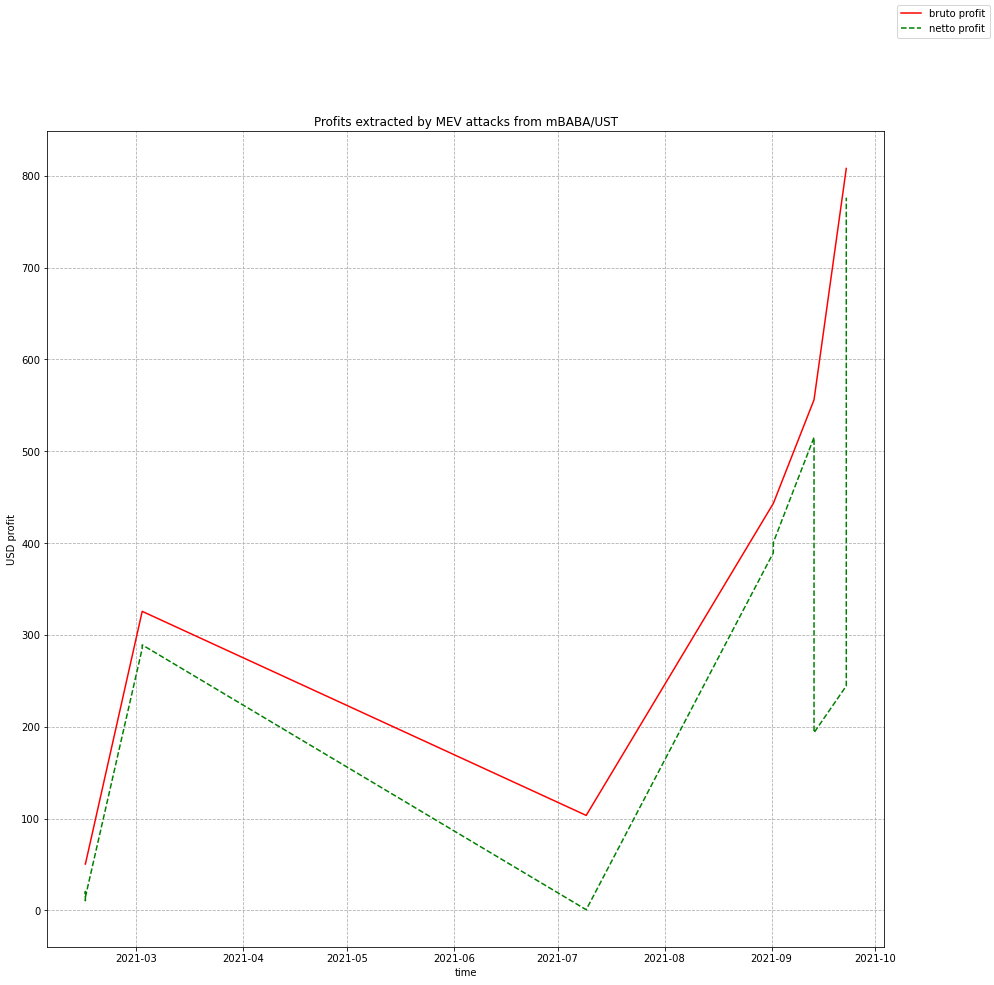

In [242]:
fig, ax = plt.subplots(figsize = (15, 15))
ax.plot(mamzn_ust_possible_mevs_df.timestamp, mamzn_ust_possible_mevs_df.bruto_total_profit, label='bruto profit', color='r')
ax.plot(mamzn_ust_possible_mevs_df.timestamp, mamzn_ust_possible_mevs_df.netto_profit, label='netto profit', color='g', linestyle='--')
ax.set_xlabel('time')
ax.set_ylabel('USD profit')
ax.set_title('Profits extracted by MEV attacks from mBABA/UST')
ax.grid(True, linestyle = '--')
fig.legend()
plt.show()

In [243]:
print("max bruto profit in USD = " +
      str(mamzn_ust_possible_mevs_df['bruto_total_profit'].max()))

max bruto profit in USD = 807.9870296859299


In [244]:
print("min bruto profit in USD = " +
      str(mamzn_ust_possible_mevs_df['bruto_total_profit'].min()))

min bruto profit in USD = 50.4254115697222


In [245]:
print("max netto profit in USD = " +
      str(mamzn_ust_possible_mevs_df['netto_profit'].max()))

max netto profit in USD = 776.1530309935216


In [246]:
print("min netto profit in USD = " +
      str(mamzn_ust_possible_mevs_df['netto_profit'].min()))

min netto profit in USD = 0.7937644121429912


# Collecting all possible MEVs into one big history and saving it locally

In [247]:
chosen_columns = ['timestamp', 'sender', 'to', 'txd', 'block', 'block_position', 'bruto_total_profit',
                  'tx_fee', 'gas_usage_by_tx', 'gas_costs_usd','netto_profit']

wbtc_usdc_profits_df = wbtc_usdc_possible_mevs_df[chosen_columns]
weth_usdc_profits_df = weth_usdc_possible_mevs_df[chosen_columns]
wbtc_dai_profits_df = wbtc_dai_possible_mevs_df[chosen_columns]
fei_weth_profits_df = fei_weth_possible_mevs_df[chosen_columns]
hkmt_usdt_profits_df = hkmt_usdt_possible_mevs_df[chosen_columns]
ixs_weth_profits_df = ixs_weth_possible_mevs_df[chosen_columns]
uma_fei_profits_df = uma_fei_possible_mevs_df[chosen_columns]
perl_weth_profits_df = perl_weth_possible_mevs_df[chosen_columns]
bpt_weth_profits_df = bpt_weth_possible_mevs_df[chosen_columns]
ustonks_usdc_profits_df = ustonks_usdc_possible_mevs_df[chosen_columns]
maapl_ust_profits_df = maapl_ust_possible_mevs_df[chosen_columns]
mbaba_ust_profits_df = mbaba_ust_possible_mevs_df[chosen_columns]
mamzn_ust_profits_df = mamzn_ust_possible_mevs_df[chosen_columns]

wbtc_usdc_profits_df['pool_name'] = 'WBTC/USDC'
weth_usdc_profits_df['pool_name'] = 'WETH/USDC'
wbtc_dai_profits_df['pool_name'] = 'WBTC/DAI'
fei_weth_profits_df['pool_name'] = 'FEI/WETH'
hkmt_usdt_profits_df['pool_name'] = 'HKMT/USDT'
ixs_weth_profits_df['pool_name'] = 'IXS/WETH'
uma_fei_profits_df['pool_name'] = 'UMA/FEI'
perl_weth_profits_df['pool_name'] = 'PERL/WETH'
bpt_weth_profits_df['pool_name'] = 'BPT/WETH'
ustonks_usdc_profits_df['pool_name'] = 'uSTONKS/USDC'
maapl_ust_profits_df['pool_name'] = 'mAAPL/UST'
mbaba_ust_profits_df['pool_name'] = 'mBABA/UST'
mamzn_ust_profits_df['pool_name'] = 'mAMZN/UST'

classic_sto_profits_list = [wbtc_usdc_profits_df, weth_usdc_profits_df, wbtc_dai_profits_df,
                            fei_weth_profits_df, hkmt_usdt_profits_df, ixs_weth_profits_df,
                            uma_fei_profits_df, perl_weth_profits_df, bpt_weth_profits_df,
                            ustonks_usdc_profits_df, maapl_ust_profits_df, mbaba_ust_profits_df,
                            mamzn_ust_profits_df]
classic_sto_profits_df = pd.concat(classic_sto_profits_list)
classic_sto_profits_df

<ipython-input-247-368a4ff21c06>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wbtc_usdc_profits_df['pool_name'] = 'WBTC/USDC'
<ipython-input-247-368a4ff21c06>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weth_usdc_profits_df['pool_name'] = 'WETH/USDC'
<ipython-input-247-368a4ff21c06>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,tx_fee,gas_usage_by_tx,gas_costs_usd,netto_profit,pool_name
0,2020-11-18 02:55:12,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x8668f06dde23a8ccc0f2c2a594c3882e51bad15a1b7f...,11279366.0,54.0,24.758508,1.220000e-07,107326.0,6.295455,18.463053,WBTC/USDC
1,2020-11-18 02:55:12,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0x341c8dc3a41be16ce427c15a625983bdef2d2f27,0xbffa11c58ec26affd6c477388d70114b287c5dc13381...,11279366.0,62.0,24.758508,1.155000e-07,101057.0,5.611911,19.146597,WBTC/USDC
2,2020-11-18 04:01:15,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x071341196d71b14f04b84463f9b9b56f3b5ed333,0x3ca91e8477aaf3d8137388b5ae6808e3a258dac8c25d...,11279654.0,110.0,656.099264,7.000000e-08,121015.0,4.072861,652.026403,WBTC/USDC
3,2020-11-18 04:01:15,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0xa0493a8fdb5b0a4a844e3bb2279fffa0dfb565d5,0x7a23d0f652543428dbc52a1c57ae46061ad99b171ed7...,11279654.0,128.0,656.099264,6.380000e-08,107855.0,3.308440,652.790823,WBTC/USDC
4,2020-11-19 10:46:31,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,0x00000058baccda12cf345edc9d99613cf1312b91,0xa35996506bc46efa6d87cca53bc29cc13dfeb45820ef...,11287956.0,15.0,229.209950,7.800000e-08,120999.0,4.441612,224.768338,WBTC/USDC
...,...,...,...,...,...,...,...,...,...,...,...,...
25,2021-09-01 12:16:16,0x1315c6c26123383a2eb369a53fb72c4b9f227eec,0x8b00ee8606cc70c2dce68dea0cefe632cca0fb7b,0x97c4b5e06a05048b1d76c74ce56ca5e783ff3c0a495d...,13139750.0,5.0,443.297806,8.785411e-08,126560.0,42.514019,400.783786,mAMZN/UST
26,2021-09-13 07:08:13,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xd5f519cd98f07c467b46fd3cb6ee97ebe63bf5a4fac1...,13215929.0,0.0,556.098800,6.594475e-08,188407.0,40.870377,515.228423,mAMZN/UST
27,2021-09-13 07:08:13,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0xeb0908c5ef7fa999ba063b1ad476b8fa822101edcf4b...,13215929.0,2.0,556.098800,7.016813e-07,157037.0,362.471008,193.627792,mAMZN/UST
28,2021-09-22 15:19:38,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x480c1c7fc02828ebab672e47d32c33d88bfe6bc02de4...,13276318.0,2.0,807.987030,1.175795e-06,156206.0,563.493932,244.493097,mAMZN/UST


In [248]:
classic_sto_profits_df.sort_values(by=['timestamp'], inplace=True)
classic_sto_profits_df = classic_sto_profits_df.reset_index()
classic_sto_profits_df.drop(columns=['index'])

,timestamp,sender,to,txd,block,block_position,bruto_total_profit,tx_fee,gas_usage_by_tx,gas_costs_usd,netto_profit,pool_name
0,2020-05-23 15:16:23,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x121b382b5f003c41fb49e7b88d079c8f513feaac,0x948bc08eeebb3abf97ca8753aa982f21ebc667f3ef61...,10122876.0,67.0,17.693420,2.500000e-08,180658.0,0.938297,16.755123,WETH/USDC
1,2020-05-23 15:16:23,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xa64c7925e25c728d8105896c74d823b8bbb0f127,0xf56ba76b68f6471bbf618ad5bf4393a3db097f27f6f0...,10122876.0,140.0,17.693420,1.500000e-08,107226.0,0.334145,17.359275,WETH/USDC
2,2020-05-31 04:27:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x6a72aa8d845a241e612b6a99584c69512626d8fbe31f...,10171401.0,105.0,381.874223,2.900000e-08,125063.0,0.840079,381.034145,WETH/USDC
3,2020-05-31 04:27:16,0xf164fc0ec4e93095b804a4795bbe1e041497b92a,0x3def62395e446e7d96500ee09369184e020b13b4,0x0b1b520eb71e00c9513998723209aaa17a0a682e9be0...,10171401.0,104.0,381.874223,2.900000e-08,180743.0,1.214095,380.660128,WETH/USDC
4,2020-06-05 17:59:58,0xc3037b2a1a9e9268025ff6d45fe7095436446d52,0xc3037b2a1a9e9268025ff6d45fe7095436446d52,0x59f2f54593a333bf1e684a38aa0fdbc7d825c2a3806a...,10207198.0,100.0,0.723212,3.190000e-08,372788.0,2.871606,-2.148394,WETH/USDC
...,...,...,...,...,...,...,...,...,...,...,...,...
14234,2022-01-24 17:42:13,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x9928e4046d7c6513326ccea028cd3e7a91c7590a,0x7eace08ecf81de308513b8694c3400963e58f4e8eed7...,14069755.0,0.0,39775.906860,1.546933e-07,150015.0,56.623832,39719.283028,FEI/WETH
14235,2022-01-24 18:09:21,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x9928e4046d7c6513326ccea028cd3e7a91c7590a,0x946bbb97e3e46221a21de9e86a9772c12b92817b6eca...,14069868.0,1.0,91789.981199,1.623135e-07,152849.0,60.535519,91729.445680,FEI/WETH
14236,2022-01-24 18:09:21,0x00000000003b3cc22af3ae1eac0440bcee416b40,0x00000000003b3cc22af3ae1eac0440bcee416b40,0xbb06880d0edbdf2c4cd92d4ad3e438c99b8699b22bb2...,14069868.0,3.0,91789.981199,1.420243e-07,141759.0,49.125430,91740.855769,FEI/WETH
14237,2022-01-26 07:12:08,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x00000000008c4fb1c916e0c88fd4cc402d935e7d,0x6eb7c947848fa63ebfe5ffa539a166afdb4d8043600a...,14079833.0,0.0,257.910784,8.656122e-08,102974.0,21.975480,235.935304,HKMT/USDT


In [249]:
grouped_classic_sto_profits_df = classic_sto_profits_df.value_counts(subset=['timestamp'])
grouped_classic_sto_profits_df[grouped_classic_sto_profits_df.values > 2]

timestamp          
2021-07-09 07:04:18    4
2021-04-25 23:33:01    4
2021-03-13 18:13:39    4
2021-02-17 09:41:36    4
2021-02-17 09:40:22    4
2021-09-08 13:07:38    4
2021-03-23 22:29:19    4
2021-04-04 02:21:56    4
2021-05-19 02:08:28    3
dtype: int64

In [250]:
classic_sto_profits_df.drop(columns=['index'], inplace=True)

In [251]:
print(classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2020-12-12 19:16:47")]['txd'][3964])
print(classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2020-12-12 19:16:47")]['txd'][3965])
print(classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2020-12-12 19:16:47")]['txd'][3966])
classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2020-12-12 19:16:47")]

KeyError: 3964

In [ ]:
print(classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2020-12-21 20:41:36")]['txd'][4287])
print(classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2020-12-21 20:41:36")]['txd'][4288])
print(classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2020-12-21 20:41:36")]['txd'][4289])
classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2020-12-21 20:41:36")]

In [ ]:
print(classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2021-05-19 02:08:28")]['txd'][11178])
print(classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2021-05-19 02:08:28")]['txd'][11179])
print(classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2021-05-19 02:08:28")]['txd'][11180])
classic_sto_profits_df[classic_sto_profits_df['timestamp'] == datetime.fromisoformat("2021-05-19 02:08:28")]

There are some strange records and it is required to set a drop of those records due to their strange behavior and low possibility of correct profit estimations

In [ ]:
classic_sto_profits_df.drop(classic_sto_profits_df.index[[3964, 3965, 3966,
                                                          4287, 4288, 4289,
                                                          11178, 11179, 11180]])

In [ ]:
grouped_by_timestamps_classic_sto_profits_df = classic_sto_profits_df.groupby(by=['timestamp']).sum()
grouped_by_timestamps_classic_sto_profits_df.drop(columns=['block_position', 'tx_fee'], inplace=True)
grouped_by_timestamps_classic_sto_profits_df['block'] = grouped_by_timestamps_classic_sto_profits_df['block'] / 2
grouped_by_timestamps_classic_sto_profits_df['bruto_total_profit'] = grouped_by_timestamps_classic_sto_profits_df['bruto_total_profit'] / 2
grouped_by_timestamps_classic_sto_profits_df['netto_profit'] = grouped_by_timestamps_classic_sto_profits_df['bruto_total_profit'] - grouped_by_timestamps_classic_sto_profits_df['gas_costs_usd']
grouped_by_timestamps_classic_sto_profits_df.reset_index(inplace=True)
grouped_by_timestamps_classic_sto_profits_df

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.plot(grouped_by_timestamps_classic_sto_profits_df.timestamp, grouped_by_timestamps_classic_sto_profits_df.netto_profit, label='netto_profit', color='g')
ax.plot(grouped_by_timestamps_classic_sto_profits_df.timestamp, grouped_by_timestamps_classic_sto_profits_df.bruto_total_profit, color='b', linestyle='--', label='bruto profit')
ax.set_xlabel('time')
ax.set_ylabel('profit (USD)')
ax.grid(True, linestyle='--')
ax.set_title('Netto and bruto profits from classic and sto tokens pools')
fig.legend()
plt.show()

In [ ]:
classic_sto_profits_df.to_csv('classic_and_sto_pools_mev_profits_df.csv')

In [ ]:
grouped_by_timestamps_classic_sto_profits_df.to_csv('grouped_by_timestamps_classic_sto_profits_df.csv')

In [ ]:
print(sum(grouped_by_timestamps_classic_sto_profits_df.netto_profit))

In [ ]:
print(sum(grouped_by_timestamps_classic_sto_profits_df.bruto_total_profit))

In [ ]:
print(sum(grouped_by_timestamps_classic_sto_profits_df.gas_costs_usd))

# Analysis of the attacks from different perspectives

## Connection between attack and gas spendings

In [ ]:
classic_sto_profits_df

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.plot(classic_sto_profits_df.timestamp, classic_sto_profits_df.netto_profit, label='netto_profit', color='g')
ax1.plot(classic_sto_profits_df.timestamp, classic_sto_profits_df.bruto_total_profit, color='b', linestyle='--', label='bruto profit')
ax1.set_xlabel('time')
ax1.set_ylabel('profit (USD)')
ax1.set_title('Netto/brutto profits distributions')
ax1.grid(True, linestyle='--')

ax2.plot(classic_sto_profits_df.timestamp, classic_sto_profits_df.gas_costs_usd, color='r', linestyle=':', label='gas costs')
ax2.set_xlabel('time')
ax2.set_ylabel('gas costs (USD)')
ax2.set_title('Gas costs distributions')
ax2.grid(True, linestyle='--')

fig.legend()
plt.tight_layout()
plt.show()

In [ ]:
count_classic_sto_profits_df = classic_sto_profits_df.value_counts(subset=['timestamp'])
count_classic_sto_profits_df

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax2 = ax.twinx()

ax.hist(classic_sto_profits_df.timestamp, bins=len(classic_sto_profits_df.timestamp), label='count of mev transactions')
ax.set_xlabel('time')
ax.set_ylabel('count')
ax.set_title('MEV transactions count and gas costs distributions for classic and STO pools')

ax2.plot(classic_sto_profits_df.timestamp, classic_sto_profits_df.gas_costs_usd, color='r', linestyle='--', label='gas costs')
ax2.set_ylabel('gas costs in USD')

fig.legend()
plt.show()

It is required to set a gas price distribution for analysis and therefore it is required to extract gas price conform amount of paid in USD fee for gas and amount of gas used by each transaction

In [ ]:
classic_sto_profits_df['gas_price'] = classic_sto_profits_df['gas_costs_usd'] / classic_sto_profits_df['gas_usage_by_tx']

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax2 = ax.twinx()

ax.hist(classic_sto_profits_df.timestamp, bins=len(classic_sto_profits_df.timestamp), label='count of mev transactions')
ax.set_xlabel('time')
ax.set_ylabel('count')
ax.set_title('Count MEV transactions and gas price distributions for classic and STO pools')

ax2.plot(classic_sto_profits_df.timestamp, classic_sto_profits_df.gas_price, color='r', linestyle='--', label='gas price')
ax2.set_ylabel('gas price in USD')

fig.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
ax2 = ax.twinx()

ax.plot(classic_sto_profits_df.timestamp, classic_sto_profits_df.bruto_total_profit, color='g', label='bruto profit')
ax2.plot(classic_sto_profits_df.timestamp, classic_sto_profits_df.gas_price, color='r', linestyle='--', label='gas costs')
ax.set_xlabel('time')
ax.set_ylabel('profit in USD')
ax2.set_ylabel('gas price in USD')
ax.set_title('Brutto profit and gas price distributions for classic and STO pools')

fig.legend()
plt.show()

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(classic_sto_profits_df.corr(), annot=True)
plt.show()

## Analysis of attackers

### Count of attacks performed by possible attackers

There are 123 possible attackers catched by the mechanism.

In [ ]:
print("value of unique possible attackers catched by the mechanism = " + str(len(classic_sto_profits_df['sender'].unique())))

In [ ]:
possible_attackers_classic_sto_counts_df = classic_sto_profits_df['sender'].value_counts()
possible_attackers_classic_sto_counts_df = pd.DataFrame({'sender': possible_attackers_classic_sto_counts_df.index,
                                                         'value': possible_attackers_classic_sto_counts_df / 2})
possible_attackers_classic_sto_counts_df.reset_index(inplace=True)
possible_attackers_classic_sto_counts_df.drop(columns=['index'], inplace=True)
possible_attackers_classic_sto_counts_df

In [ ]:
plt.figure(figsize=(10, 50))
sns.barplot(data=possible_attackers_classic_sto_counts_df, y='sender', x='value',
            order=possible_attackers_classic_sto_counts_df.sort_values(by='value').sender)
plt.grid(True)
plt.show()

### Count of addresses where MEV transactions were directed

In [ ]:
print("value of unique possible receivers catched by the mechanism = " + str(len(classic_sto_profits_df['to'].unique())))

In [ ]:
receivers_classic_sto_counts_df = classic_sto_profits_df['to'].value_counts()
receivers_classic_sto_counts_df = pd.DataFrame({'to': receivers_classic_sto_counts_df.index,
                                                         'value': receivers_classic_sto_counts_df / 2})
receivers_classic_sto_counts_df.reset_index(inplace=True)
receivers_classic_sto_counts_df.drop(columns=['index'], inplace=True)
receivers_classic_sto_counts_df

In [ ]:
classic_sto_profits_df

In [ ]:
classic_sto_profits_df

In [ ]:
print(classic_sto_profits_df[classic_sto_profits_df['sender'] == '0x7a250d5630b4cf539739df2c5dacb4c659f2488d']['txd'][53])

In [ ]:
print(classic_sto_profits_df.loc[53])

### Sum of brutto/netto profits, gas spendings by possible attackers